In [1]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from keras.models import Sequential, Model 
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

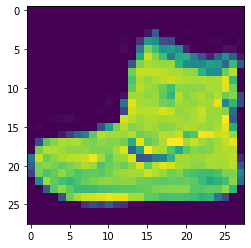

In [3]:
plt.imshow(x_train[0])

In [4]:
x_train = np.expand_dims(x_train, axis=3)

In [5]:
def create_generator():
  model = Sequential()

  model.add(Dense(256, input_dim=100))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(1024))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(np.prod((28, 28, 1)), activation='tanh'))
  model.add(Reshape((28, 28, 1)))
    
  model.summary()

  noise = Input(shape=(100,))
  img = model(noise)

  return Model(noise, img)

generator = create_generator()
z = Input(shape=(100,))
img = generator(z)





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_3 (Dense)              (None, 1024)         

In [6]:
def create_discriminator():
    
  model = Sequential()

  model.add(Flatten(input_shape=(28, 28, 1)))
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(Dense(256))
  model.add(LeakyReLU(0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.summary()

  img = Input(shape=(28, 28, 1))
  validity = model(img)

  return Model(img, validity)

discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
discriminator.trainable = False

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
________________________________________________

In [7]:
validity = discriminator(img)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [8]:
def sample_images(epoch):
  r, c = 5, 5
  noise = np.random.normal(0, 1, (r*c, 100))
  gen_imgs = generator.predict(noise)

  # Rescale images 0 - 1
  gen_imgs = 0.5*gen_imgs+0.5

  fig, axs = plt.subplots(r, c)
  cnt = 0
  for i in range(r):
    for j in range(c):
      axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
      axs[i, j].axis('off')
      cnt += 1
  #fig.savefig("images/%d.png" % epoch)
  plt.show()
  plt.close()

C:\Users\Yan family\Anaconda3\lib\site-packages\keras\engine\training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 2.640975, acc.: 45.31%] [G loss: 0.595331]


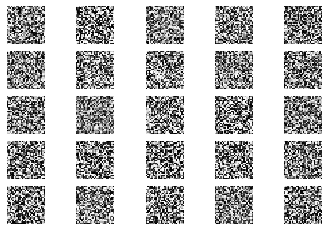

C:\Users\Yan family\Anaconda3\lib\site-packages\keras\engine\training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: 0.417494, acc.: 64.06%] [G loss: 0.606088]
2 [D loss: 0.433703, acc.: 60.94%] [G loss: 0.631557]
3 [D loss: 0.375340, acc.: 71.88%] [G loss: 0.683678]
4 [D loss: 0.386897, acc.: 75.00%] [G loss: 0.701598]
5 [D loss: 0.345230, acc.: 75.00%] [G loss: 0.752998]
6 [D loss: 0.352669, acc.: 76.56%] [G loss: 0.875270]
7 [D loss: 0.283179, acc.: 89.06%] [G loss: 0.881211]
8 [D loss: 0.269425, acc.: 90.62%] [G loss: 0.926064]
9 [D loss: 0.268179, acc.: 89.06%] [G loss: 0.923021]
10 [D loss: 0.249374, acc.: 95.31%] [G loss: 0.989028]
11 [D loss: 0.237311, acc.: 93.75%] [G loss: 1.096654]
12 [D loss: 0.239351, acc.: 95.31%] [G loss: 1.169658]
13 [D loss: 0.224134, acc.: 93.75%] [G loss: 1.163179]
14 [D loss: 0.186531, acc.: 98.44%] [G loss: 1.191120]
15 [D loss: 0.410564, acc.: 98.44%] [G loss: 1.291543]
16 [D loss: 0.172459, acc.: 98.44%] [G loss: 1.329645]
17 [D loss: 0.414628, acc.: 98.44%] [G loss: 1.404439]
18 [D loss: 0.415355, acc.: 98.44%] [G loss: 1.437758]
19 [D loss: 0.11959

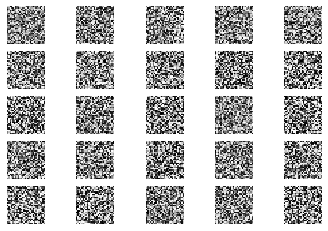

51 [D loss: 0.106697, acc.: 100.00%] [G loss: 1.901149]
52 [D loss: 0.106823, acc.: 100.00%] [G loss: 1.948085]
53 [D loss: 0.083745, acc.: 100.00%] [G loss: 2.046160]
54 [D loss: 0.099646, acc.: 100.00%] [G loss: 1.906719]
55 [D loss: 0.155635, acc.: 98.44%] [G loss: 1.753563]
56 [D loss: 0.093413, acc.: 100.00%] [G loss: 1.780478]
57 [D loss: 0.128200, acc.: 100.00%] [G loss: 1.821132]
58 [D loss: 0.137841, acc.: 100.00%] [G loss: 1.815583]
59 [D loss: 0.151385, acc.: 95.31%] [G loss: 1.866366]
60 [D loss: 0.113627, acc.: 98.44%] [G loss: 1.988388]
61 [D loss: 0.089014, acc.: 100.00%] [G loss: 1.938667]
62 [D loss: 0.107729, acc.: 100.00%] [G loss: 1.977380]
63 [D loss: 0.080933, acc.: 100.00%] [G loss: 2.061707]
64 [D loss: 0.082055, acc.: 100.00%] [G loss: 2.022569]
65 [D loss: 0.114231, acc.: 98.44%] [G loss: 2.119455]
66 [D loss: 0.082041, acc.: 100.00%] [G loss: 2.237189]
67 [D loss: 0.097395, acc.: 100.00%] [G loss: 2.134769]
68 [D loss: 0.084400, acc.: 98.44%] [G loss: 2.15921

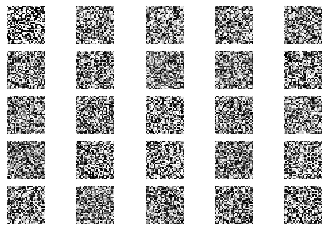

101 [D loss: 0.039929, acc.: 100.00%] [G loss: 2.725797]
102 [D loss: 0.047913, acc.: 100.00%] [G loss: 2.791666]
103 [D loss: 0.052282, acc.: 100.00%] [G loss: 2.746478]
104 [D loss: 0.074703, acc.: 100.00%] [G loss: 2.731706]
105 [D loss: 0.042216, acc.: 100.00%] [G loss: 2.894910]
106 [D loss: 0.044484, acc.: 100.00%] [G loss: 2.958369]
107 [D loss: 0.042982, acc.: 100.00%] [G loss: 2.960818]
108 [D loss: 0.038862, acc.: 100.00%] [G loss: 2.965217]
109 [D loss: 0.043181, acc.: 100.00%] [G loss: 2.914180]
110 [D loss: 0.557478, acc.: 96.88%] [G loss: 3.046647]
111 [D loss: 0.042183, acc.: 100.00%] [G loss: 2.845913]
112 [D loss: 0.283703, acc.: 98.44%] [G loss: 3.021989]
113 [D loss: 0.296353, acc.: 98.44%] [G loss: 2.857326]
114 [D loss: 0.051731, acc.: 100.00%] [G loss: 2.886941]
115 [D loss: 0.304340, acc.: 98.44%] [G loss: 2.992193]
116 [D loss: 0.030362, acc.: 100.00%] [G loss: 3.042088]
117 [D loss: 0.041711, acc.: 100.00%] [G loss: 3.103983]
118 [D loss: 0.115823, acc.: 98.44%

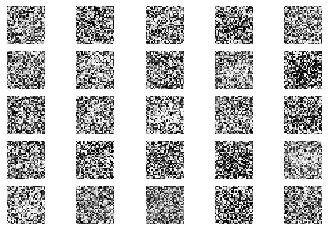

151 [D loss: 0.059998, acc.: 100.00%] [G loss: 2.810029]
152 [D loss: 0.301726, acc.: 98.44%] [G loss: 3.005756]
153 [D loss: 1.384595, acc.: 87.50%] [G loss: 2.605338]
154 [D loss: 0.134132, acc.: 96.88%] [G loss: 2.500230]
155 [D loss: 0.114787, acc.: 96.88%] [G loss: 2.387394]
156 [D loss: 0.126584, acc.: 96.88%] [G loss: 2.569296]
157 [D loss: 0.353723, acc.: 95.31%] [G loss: 2.659027]
158 [D loss: 0.341437, acc.: 98.44%] [G loss: 2.660597]
159 [D loss: 0.078492, acc.: 98.44%] [G loss: 2.845709]
160 [D loss: 0.110606, acc.: 96.88%] [G loss: 2.809376]
161 [D loss: 0.439938, acc.: 90.62%] [G loss: 1.919712]
162 [D loss: 0.310123, acc.: 82.81%] [G loss: 1.923006]
163 [D loss: 0.276317, acc.: 84.38%] [G loss: 1.989929]
164 [D loss: 0.218355, acc.: 89.06%] [G loss: 2.080650]
165 [D loss: 0.115585, acc.: 98.44%] [G loss: 2.155369]
166 [D loss: 0.102326, acc.: 95.31%] [G loss: 2.239384]
167 [D loss: 0.126474, acc.: 93.75%] [G loss: 2.259601]
168 [D loss: 0.179868, acc.: 92.19%] [G loss: 2

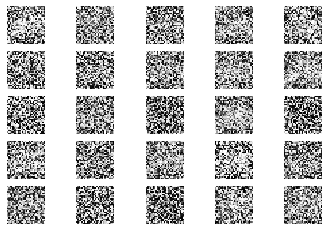

201 [D loss: 0.466754, acc.: 76.56%] [G loss: 1.868684]
202 [D loss: 0.225706, acc.: 89.06%] [G loss: 1.896910]
203 [D loss: 0.241728, acc.: 82.81%] [G loss: 2.195820]
204 [D loss: 0.389206, acc.: 92.19%] [G loss: 2.121758]
205 [D loss: 0.210344, acc.: 90.62%] [G loss: 2.340380]
206 [D loss: 0.412018, acc.: 90.62%] [G loss: 2.385382]
207 [D loss: 0.842898, acc.: 92.19%] [G loss: 2.521018]
208 [D loss: 0.341971, acc.: 95.31%] [G loss: 2.727469]
209 [D loss: 0.614915, acc.: 95.31%] [G loss: 2.597569]
210 [D loss: 0.060567, acc.: 98.44%] [G loss: 2.621674]
211 [D loss: 0.865747, acc.: 92.19%] [G loss: 2.625968]
212 [D loss: 0.677644, acc.: 87.50%] [G loss: 2.835951]
213 [D loss: 0.941697, acc.: 76.56%] [G loss: 1.033664]
214 [D loss: 0.962623, acc.: 67.19%] [G loss: 1.064413]
215 [D loss: 0.723180, acc.: 65.62%] [G loss: 0.790274]
216 [D loss: 0.867794, acc.: 68.75%] [G loss: 1.223610]
217 [D loss: 0.607120, acc.: 73.44%] [G loss: 1.471798]
218 [D loss: 0.431139, acc.: 78.12%] [G loss: 1.

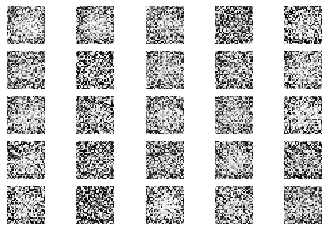

251 [D loss: 2.410848, acc.: 79.69%] [G loss: 2.298364]
252 [D loss: 2.142669, acc.: 54.69%] [G loss: 0.527702]
253 [D loss: 1.938322, acc.: 54.69%] [G loss: 0.228087]
254 [D loss: 1.873742, acc.: 59.38%] [G loss: 0.322969]
255 [D loss: 1.445016, acc.: 56.25%] [G loss: 0.244137]
256 [D loss: 1.355180, acc.: 59.38%] [G loss: 0.402637]
257 [D loss: 1.447636, acc.: 56.25%] [G loss: 0.827307]
258 [D loss: 0.923093, acc.: 57.81%] [G loss: 0.940003]
259 [D loss: 0.865190, acc.: 62.50%] [G loss: 1.062970]
260 [D loss: 0.465276, acc.: 73.44%] [G loss: 0.996346]
261 [D loss: 0.482406, acc.: 73.44%] [G loss: 1.146198]
262 [D loss: 0.375819, acc.: 75.00%] [G loss: 1.307382]
263 [D loss: 0.265785, acc.: 84.38%] [G loss: 1.388545]
264 [D loss: 0.235377, acc.: 89.06%] [G loss: 1.675986]
265 [D loss: 0.245845, acc.: 89.06%] [G loss: 1.739302]
266 [D loss: 1.208398, acc.: 85.94%] [G loss: 1.867675]
267 [D loss: 0.425416, acc.: 90.62%] [G loss: 1.835971]
268 [D loss: 0.459047, acc.: 89.06%] [G loss: 1.

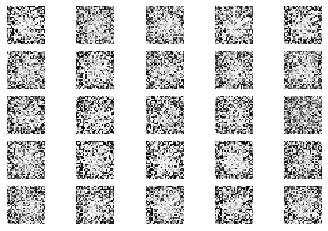

301 [D loss: 0.470803, acc.: 75.00%] [G loss: 1.196131]
302 [D loss: 0.282390, acc.: 85.94%] [G loss: 1.436771]
303 [D loss: 0.497940, acc.: 87.50%] [G loss: 1.653015]
304 [D loss: 0.146262, acc.: 96.88%] [G loss: 1.825133]
305 [D loss: 0.768355, acc.: 82.81%] [G loss: 1.886662]
306 [D loss: 0.456373, acc.: 84.38%] [G loss: 2.018785]
307 [D loss: 0.424055, acc.: 92.19%] [G loss: 2.184358]
308 [D loss: 0.703838, acc.: 90.62%] [G loss: 1.549167]
309 [D loss: 0.365771, acc.: 76.56%] [G loss: 1.463030]
310 [D loss: 0.252868, acc.: 92.19%] [G loss: 1.547806]
311 [D loss: 0.725921, acc.: 89.06%] [G loss: 1.677364]
312 [D loss: 0.657153, acc.: 95.31%] [G loss: 2.005723]
313 [D loss: 0.870564, acc.: 92.19%] [G loss: 2.195113]
314 [D loss: 0.378576, acc.: 95.31%] [G loss: 2.236597]
315 [D loss: 0.908478, acc.: 92.19%] [G loss: 2.351455]
316 [D loss: 1.347657, acc.: 90.62%] [G loss: 2.105031]
317 [D loss: 1.620443, acc.: 90.62%] [G loss: 1.847071]
318 [D loss: 4.342617, acc.: 34.38%] [G loss: 0.

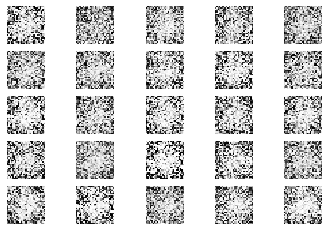

351 [D loss: 0.369578, acc.: 75.00%] [G loss: 1.439537]
352 [D loss: 0.217210, acc.: 93.75%] [G loss: 1.640360]
353 [D loss: 0.417113, acc.: 93.75%] [G loss: 1.689393]
354 [D loss: 2.501876, acc.: 43.75%] [G loss: 0.026237]
355 [D loss: 2.756150, acc.: 50.00%] [G loss: 0.014365]
356 [D loss: 2.687742, acc.: 50.00%] [G loss: 0.020504]
357 [D loss: 2.697143, acc.: 50.00%] [G loss: 0.058504]
358 [D loss: 2.033955, acc.: 50.00%] [G loss: 0.105293]
359 [D loss: 1.644906, acc.: 50.00%] [G loss: 0.130342]
360 [D loss: 0.909273, acc.: 56.25%] [G loss: 0.296646]
361 [D loss: 0.862745, acc.: 53.12%] [G loss: 0.536618]
362 [D loss: 0.674761, acc.: 57.81%] [G loss: 0.924880]
363 [D loss: 0.619911, acc.: 78.12%] [G loss: 1.182694]
364 [D loss: 0.239148, acc.: 89.06%] [G loss: 1.460766]
365 [D loss: 0.516626, acc.: 85.94%] [G loss: 1.643638]
366 [D loss: 0.138143, acc.: 96.88%] [G loss: 1.764256]
367 [D loss: 0.152531, acc.: 96.88%] [G loss: 1.581369]
368 [D loss: 0.170001, acc.: 96.88%] [G loss: 1.

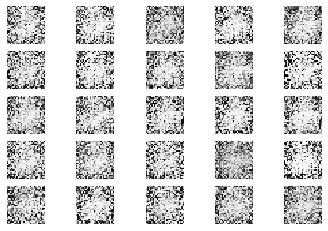

401 [D loss: 1.126203, acc.: 50.00%] [G loss: 0.365888]
402 [D loss: 1.422197, acc.: 50.00%] [G loss: 0.618923]
403 [D loss: 0.459024, acc.: 73.44%] [G loss: 1.057155]
404 [D loss: 1.341876, acc.: 71.88%] [G loss: 1.364237]
405 [D loss: 2.157469, acc.: 40.62%] [G loss: 0.225344]
406 [D loss: 1.031934, acc.: 50.00%] [G loss: 0.251448]
407 [D loss: 0.979710, acc.: 50.00%] [G loss: 0.354182]
408 [D loss: 0.634141, acc.: 56.25%] [G loss: 0.643815]
409 [D loss: 0.668284, acc.: 67.19%] [G loss: 0.945913]
410 [D loss: 0.528796, acc.: 84.38%] [G loss: 1.182721]
411 [D loss: 0.224985, acc.: 93.75%] [G loss: 1.322731]
412 [D loss: 0.696347, acc.: 92.19%] [G loss: 1.460098]
413 [D loss: 0.692483, acc.: 92.19%] [G loss: 1.511245]
414 [D loss: 2.433103, acc.: 56.25%] [G loss: 0.629340]
415 [D loss: 0.551866, acc.: 62.50%] [G loss: 0.658944]
416 [D loss: 0.784078, acc.: 57.81%] [G loss: 0.892270]
417 [D loss: 0.568537, acc.: 81.25%] [G loss: 1.158274]
418 [D loss: 1.310479, acc.: 76.56%] [G loss: 1.

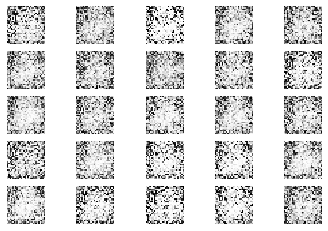

451 [D loss: 0.332888, acc.: 87.50%] [G loss: 1.015311]
452 [D loss: 0.542408, acc.: 81.25%] [G loss: 1.138587]
453 [D loss: 0.726930, acc.: 92.19%] [G loss: 1.403923]
454 [D loss: 0.948464, acc.: 93.75%] [G loss: 1.639878]
455 [D loss: 0.403628, acc.: 96.88%] [G loss: 1.745023]
456 [D loss: 1.390930, acc.: 90.62%] [G loss: 1.880436]
457 [D loss: 4.169644, acc.: 29.69%] [G loss: 0.087675]
458 [D loss: 1.628231, acc.: 50.00%] [G loss: 0.064057]
459 [D loss: 1.431882, acc.: 50.00%] [G loss: 0.109564]
460 [D loss: 1.216402, acc.: 50.00%] [G loss: 0.145700]
461 [D loss: 0.957206, acc.: 50.00%] [G loss: 0.270518]
462 [D loss: 0.668122, acc.: 53.12%] [G loss: 0.473673]
463 [D loss: 1.036860, acc.: 51.56%] [G loss: 0.701294]
464 [D loss: 0.750373, acc.: 50.00%] [G loss: 0.348016]
465 [D loss: 0.703179, acc.: 50.00%] [G loss: 0.431029]
466 [D loss: 0.544958, acc.: 57.81%] [G loss: 0.592011]
467 [D loss: 0.431381, acc.: 64.06%] [G loss: 0.779009]
468 [D loss: 0.295525, acc.: 90.62%] [G loss: 1.

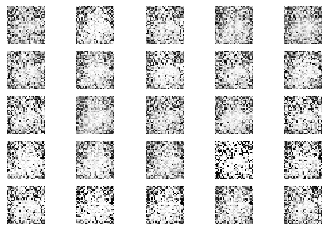

501 [D loss: 0.163028, acc.: 100.00%] [G loss: 1.482048]
502 [D loss: 0.436761, acc.: 98.44%] [G loss: 1.342992]
503 [D loss: 0.168585, acc.: 100.00%] [G loss: 1.386890]
504 [D loss: 0.151745, acc.: 100.00%] [G loss: 1.448065]
505 [D loss: 1.128982, acc.: 84.38%] [G loss: 0.960876]
506 [D loss: 0.295045, acc.: 85.94%] [G loss: 0.956238]
507 [D loss: 0.518393, acc.: 93.75%] [G loss: 1.055355]
508 [D loss: 0.221025, acc.: 96.88%] [G loss: 1.280764]
509 [D loss: 0.474662, acc.: 87.50%] [G loss: 0.857822]
510 [D loss: 0.288428, acc.: 89.06%] [G loss: 0.978498]
511 [D loss: 0.236753, acc.: 98.44%] [G loss: 1.209134]
512 [D loss: 0.684426, acc.: 50.00%] [G loss: 0.392759]
513 [D loss: 0.689647, acc.: 50.00%] [G loss: 0.419336]
514 [D loss: 0.530293, acc.: 53.12%] [G loss: 0.624506]
515 [D loss: 0.423382, acc.: 59.38%] [G loss: 0.811980]
516 [D loss: 0.770786, acc.: 92.19%] [G loss: 1.035144]
517 [D loss: 0.229179, acc.: 100.00%] [G loss: 1.242934]
518 [D loss: 0.512892, acc.: 82.81%] [G loss

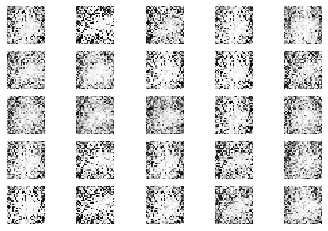

551 [D loss: 0.382107, acc.: 70.31%] [G loss: 0.839024]
552 [D loss: 0.280614, acc.: 90.62%] [G loss: 1.039963]
553 [D loss: 0.479732, acc.: 96.88%] [G loss: 1.185640]
554 [D loss: 0.433131, acc.: 98.44%] [G loss: 1.359526]
555 [D loss: 0.413663, acc.: 98.44%] [G loss: 1.584494]
556 [D loss: 1.123573, acc.: 90.62%] [G loss: 0.823683]
557 [D loss: 0.357672, acc.: 75.00%] [G loss: 0.872870]
558 [D loss: 0.535002, acc.: 90.62%] [G loss: 1.106944]
559 [D loss: 0.237038, acc.: 98.44%] [G loss: 1.247384]
560 [D loss: 0.202110, acc.: 98.44%] [G loss: 1.429290]
561 [D loss: 0.141204, acc.: 100.00%] [G loss: 1.587571]
562 [D loss: 0.412726, acc.: 98.44%] [G loss: 1.076799]
563 [D loss: 0.265695, acc.: 96.88%] [G loss: 1.056613]
564 [D loss: 0.219194, acc.: 98.44%] [G loss: 1.197529]
565 [D loss: 0.426265, acc.: 98.44%] [G loss: 1.374344]
566 [D loss: 0.400288, acc.: 98.44%] [G loss: 1.448686]
567 [D loss: 0.342228, acc.: 87.50%] [G loss: 0.833120]
568 [D loss: 0.354850, acc.: 73.44%] [G loss: 0

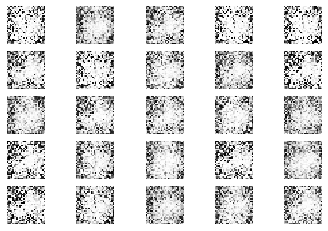

601 [D loss: 0.106458, acc.: 100.00%] [G loss: 1.747098]
602 [D loss: 0.356897, acc.: 98.44%] [G loss: 1.810522]
603 [D loss: 0.097624, acc.: 100.00%] [G loss: 1.933945]
604 [D loss: 0.329996, acc.: 98.44%] [G loss: 1.955012]
605 [D loss: 0.337331, acc.: 98.44%] [G loss: 1.981691]
606 [D loss: 0.104883, acc.: 100.00%] [G loss: 1.966604]
607 [D loss: 0.250414, acc.: 98.44%] [G loss: 0.905239]
608 [D loss: 0.335416, acc.: 79.69%] [G loss: 0.843085]
609 [D loss: 0.285019, acc.: 87.50%] [G loss: 0.963573]
610 [D loss: 0.479648, acc.: 53.12%] [G loss: 0.503253]
611 [D loss: 0.522112, acc.: 51.56%] [G loss: 0.546925]
612 [D loss: 0.423986, acc.: 56.25%] [G loss: 0.749498]
613 [D loss: 0.322684, acc.: 81.25%] [G loss: 0.940598]
614 [D loss: 0.241102, acc.: 98.44%] [G loss: 1.156881]
615 [D loss: 0.189206, acc.: 100.00%] [G loss: 1.377193]
616 [D loss: 0.190282, acc.: 100.00%] [G loss: 1.221964]
617 [D loss: 0.191339, acc.: 100.00%] [G loss: 1.345473]
618 [D loss: 0.414348, acc.: 98.44%] [G lo

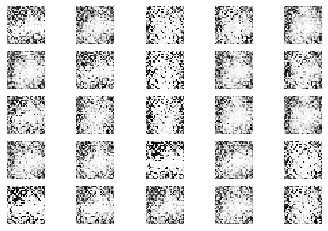

651 [D loss: 0.161202, acc.: 100.00%] [G loss: 1.476402]
652 [D loss: 0.123198, acc.: 100.00%] [G loss: 1.650906]
653 [D loss: 0.113380, acc.: 100.00%] [G loss: 1.757410]
654 [D loss: 0.102339, acc.: 100.00%] [G loss: 1.850992]
655 [D loss: 0.510211, acc.: 92.19%] [G loss: 0.769151]
656 [D loss: 0.428016, acc.: 60.94%] [G loss: 0.777193]
657 [D loss: 0.335636, acc.: 81.25%] [G loss: 0.893338]
658 [D loss: 0.252126, acc.: 95.31%] [G loss: 1.153059]
659 [D loss: 0.196356, acc.: 100.00%] [G loss: 1.344605]
660 [D loss: 0.144407, acc.: 100.00%] [G loss: 1.542702]
661 [D loss: 0.133131, acc.: 100.00%] [G loss: 1.660620]
662 [D loss: 0.109281, acc.: 100.00%] [G loss: 1.833605]
663 [D loss: 0.090601, acc.: 100.00%] [G loss: 1.916217]
664 [D loss: 0.083181, acc.: 100.00%] [G loss: 2.064318]
665 [D loss: 0.329889, acc.: 98.44%] [G loss: 2.049787]
666 [D loss: 0.072887, acc.: 100.00%] [G loss: 2.158357]
667 [D loss: 0.577338, acc.: 96.88%] [G loss: 2.140733]
668 [D loss: 0.066710, acc.: 100.00%]

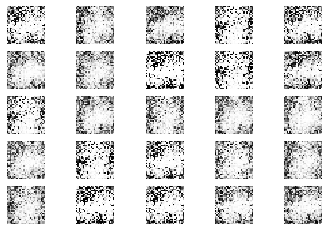

701 [D loss: 0.128938, acc.: 100.00%] [G loss: 1.611960]
702 [D loss: 0.113479, acc.: 100.00%] [G loss: 1.729581]
703 [D loss: 0.111537, acc.: 100.00%] [G loss: 1.887250]
704 [D loss: 0.089565, acc.: 100.00%] [G loss: 1.988267]
705 [D loss: 0.085583, acc.: 100.00%] [G loss: 2.095778]
706 [D loss: 0.073762, acc.: 100.00%] [G loss: 2.165352]
707 [D loss: 0.743007, acc.: 87.50%] [G loss: 0.629837]
708 [D loss: 0.529065, acc.: 56.25%] [G loss: 0.586351]
709 [D loss: 0.437390, acc.: 57.81%] [G loss: 0.752584]
710 [D loss: 0.289743, acc.: 90.62%] [G loss: 1.056156]
711 [D loss: 0.209362, acc.: 100.00%] [G loss: 1.323509]
712 [D loss: 0.162304, acc.: 100.00%] [G loss: 1.568908]
713 [D loss: 0.131069, acc.: 100.00%] [G loss: 1.749701]
714 [D loss: 0.493687, acc.: 89.06%] [G loss: 0.737010]
715 [D loss: 0.446289, acc.: 54.69%] [G loss: 0.652493]
716 [D loss: 0.353918, acc.: 70.31%] [G loss: 0.890482]
717 [D loss: 0.264022, acc.: 93.75%] [G loss: 1.151980]
718 [D loss: 0.189006, acc.: 100.00%] [

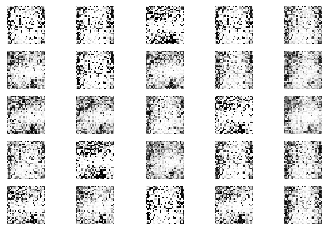

751 [D loss: 0.419557, acc.: 56.25%] [G loss: 0.666503]
752 [D loss: 0.374383, acc.: 65.62%] [G loss: 0.879406]
753 [D loss: 0.247711, acc.: 98.44%] [G loss: 1.165776]
754 [D loss: 0.165422, acc.: 100.00%] [G loss: 1.458098]
755 [D loss: 0.143741, acc.: 100.00%] [G loss: 1.715971]
756 [D loss: 0.099664, acc.: 100.00%] [G loss: 1.833905]
757 [D loss: 0.339141, acc.: 98.44%] [G loss: 2.030894]
758 [D loss: 0.075529, acc.: 100.00%] [G loss: 2.084689]
759 [D loss: 0.077739, acc.: 100.00%] [G loss: 2.144433]
760 [D loss: 0.577368, acc.: 96.88%] [G loss: 1.324736]
761 [D loss: 0.194237, acc.: 100.00%] [G loss: 1.288396]
762 [D loss: 0.159988, acc.: 100.00%] [G loss: 1.482941]
763 [D loss: 0.126665, acc.: 100.00%] [G loss: 1.701968]
764 [D loss: 0.106002, acc.: 100.00%] [G loss: 1.807377]
765 [D loss: 0.090606, acc.: 100.00%] [G loss: 1.883471]
766 [D loss: 0.081320, acc.: 100.00%] [G loss: 2.024506]
767 [D loss: 0.069687, acc.: 100.00%] [G loss: 2.205360]
768 [D loss: 0.067351, acc.: 100.00%

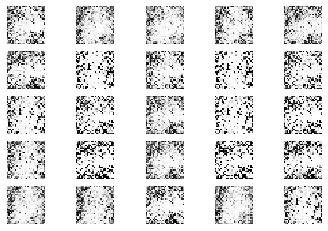

801 [D loss: 0.106472, acc.: 100.00%] [G loss: 1.801209]
802 [D loss: 0.105933, acc.: 100.00%] [G loss: 1.886251]
803 [D loss: 0.334469, acc.: 98.44%] [G loss: 2.005795]
804 [D loss: 0.071820, acc.: 100.00%] [G loss: 2.081397]
805 [D loss: 0.069324, acc.: 100.00%] [G loss: 2.232218]
806 [D loss: 0.065035, acc.: 100.00%] [G loss: 2.213400]
807 [D loss: 0.056952, acc.: 100.00%] [G loss: 2.307897]
808 [D loss: 0.326324, acc.: 98.44%] [G loss: 1.976903]
809 [D loss: 0.583713, acc.: 96.88%] [G loss: 1.976601]
810 [D loss: 0.080325, acc.: 100.00%] [G loss: 2.030946]
811 [D loss: 0.208266, acc.: 98.44%] [G loss: 1.292899]
812 [D loss: 0.174686, acc.: 100.00%] [G loss: 1.335997]
813 [D loss: 0.172397, acc.: 100.00%] [G loss: 1.453296]
814 [D loss: 0.133846, acc.: 100.00%] [G loss: 1.642986]
815 [D loss: 0.111118, acc.: 100.00%] [G loss: 1.764863]
816 [D loss: 0.341397, acc.: 98.44%] [G loss: 2.002642]
817 [D loss: 0.326428, acc.: 98.44%] [G loss: 2.055911]
818 [D loss: 0.070323, acc.: 100.00%]

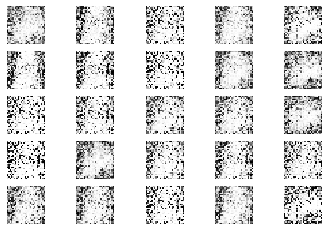

851 [D loss: 0.063319, acc.: 100.00%] [G loss: 2.140037]
852 [D loss: 0.064181, acc.: 100.00%] [G loss: 2.163978]
853 [D loss: 0.107907, acc.: 100.00%] [G loss: 1.591126]
854 [D loss: 0.134168, acc.: 100.00%] [G loss: 1.523616]
855 [D loss: 0.131750, acc.: 100.00%] [G loss: 1.608767]
856 [D loss: 0.373327, acc.: 98.44%] [G loss: 1.801979]
857 [D loss: 0.100172, acc.: 100.00%] [G loss: 1.982374]
858 [D loss: 0.087921, acc.: 100.00%] [G loss: 2.064321]
859 [D loss: 0.325972, acc.: 98.44%] [G loss: 2.117884]
860 [D loss: 0.068098, acc.: 100.00%] [G loss: 2.264809]
861 [D loss: 0.233832, acc.: 98.44%] [G loss: 1.623240]
862 [D loss: 0.127131, acc.: 100.00%] [G loss: 1.498070]
863 [D loss: 0.126787, acc.: 100.00%] [G loss: 1.682648]
864 [D loss: 0.105617, acc.: 100.00%] [G loss: 1.794913]
865 [D loss: 0.093922, acc.: 100.00%] [G loss: 1.988540]
866 [D loss: 0.079055, acc.: 100.00%] [G loss: 2.076993]
867 [D loss: 0.066781, acc.: 100.00%] [G loss: 2.156474]
868 [D loss: 0.165576, acc.: 98.44

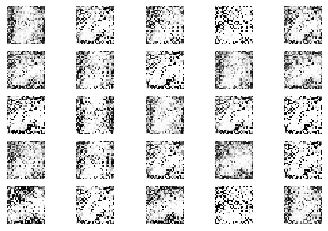

901 [D loss: 0.101987, acc.: 100.00%] [G loss: 1.917942]
902 [D loss: 0.081360, acc.: 100.00%] [G loss: 1.969502]
903 [D loss: 0.081497, acc.: 100.00%] [G loss: 2.098855]
904 [D loss: 0.072928, acc.: 100.00%] [G loss: 2.173148]
905 [D loss: 0.071446, acc.: 100.00%] [G loss: 2.204941]
906 [D loss: 0.067556, acc.: 100.00%] [G loss: 2.361483]
907 [D loss: 0.052506, acc.: 100.00%] [G loss: 2.474032]
908 [D loss: 0.307176, acc.: 98.44%] [G loss: 2.481763]
909 [D loss: 0.055163, acc.: 100.00%] [G loss: 2.512239]
910 [D loss: 0.045979, acc.: 100.00%] [G loss: 2.505100]
911 [D loss: 0.773617, acc.: 48.44%] [G loss: 0.139533]
912 [D loss: 1.410527, acc.: 50.00%] [G loss: 0.121410]
913 [D loss: 1.206974, acc.: 50.00%] [G loss: 0.180892]
914 [D loss: 0.817241, acc.: 50.00%] [G loss: 0.439772]
915 [D loss: 0.541069, acc.: 68.75%] [G loss: 0.782984]
916 [D loss: 0.320117, acc.: 78.12%] [G loss: 1.134724]
917 [D loss: 0.232832, acc.: 98.44%] [G loss: 1.345546]
918 [D loss: 0.162132, acc.: 100.00%] [

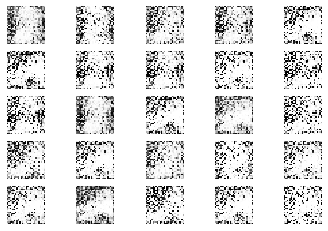

951 [D loss: 0.102646, acc.: 100.00%] [G loss: 1.888131]
952 [D loss: 0.086492, acc.: 100.00%] [G loss: 2.055255]
953 [D loss: 0.072776, acc.: 100.00%] [G loss: 2.199057]
954 [D loss: 0.067021, acc.: 100.00%] [G loss: 2.191286]
955 [D loss: 0.071725, acc.: 100.00%] [G loss: 2.328449]
956 [D loss: 0.058456, acc.: 100.00%] [G loss: 2.406265]
957 [D loss: 0.054394, acc.: 100.00%] [G loss: 2.436426]
958 [D loss: 0.300042, acc.: 98.44%] [G loss: 2.449175]
959 [D loss: 0.046483, acc.: 100.00%] [G loss: 2.531142]
960 [D loss: 0.053061, acc.: 100.00%] [G loss: 2.562873]
961 [D loss: 0.485521, acc.: 57.81%] [G loss: 0.372659]
962 [D loss: 0.810365, acc.: 50.00%] [G loss: 0.321588]
963 [D loss: 0.609562, acc.: 50.00%] [G loss: 0.507358]
964 [D loss: 0.414033, acc.: 56.25%] [G loss: 0.885669]
965 [D loss: 0.267421, acc.: 92.19%] [G loss: 1.215394]
966 [D loss: 0.174480, acc.: 100.00%] [G loss: 1.546544]
967 [D loss: 0.117331, acc.: 100.00%] [G loss: 1.814461]
968 [D loss: 0.095283, acc.: 100.00%]

In [9]:
epochs = 1000

batch_size = 32
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
  #discriminator
  idx = np.random.randint(0, x_train.shape[0], batch_size)
  imgs = x_train[idx]

  noise = np.random.normal(0, 1, (batch_size, 100))

  gen_imgs = generator.predict(noise)

  d_loss_real = discriminator.train_on_batch(imgs, valid)
  d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
  d_loss = 0.5*np.add(d_loss_real, d_loss_fake)

  #generator
  noise = np.random.normal(0, 1, (batch_size, 100))

  g_loss = combined.train_on_batch(noise, valid)

  print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

  if epoch % 50 == 0:
    sample_images(epoch)

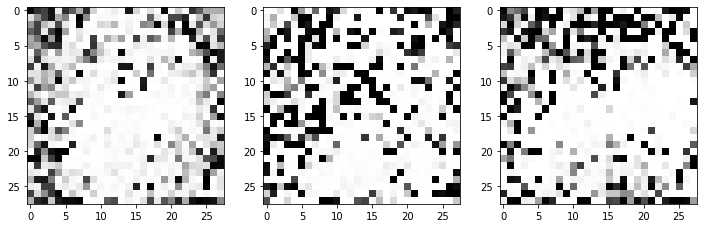

In [10]:
r, c = 5, 5
noise = np.random.normal(0, 1, (r*c, 100))
gen_imgs = generator.predict(noise)

gen_imgs = 0.5*gen_imgs+0.5

plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(gen_imgs[0, :, :, 0], cmap='gray')
plt.subplot(132)
plt.imshow(gen_imgs[1, :, :, 0], cmap='gray')
plt.subplot(133)
plt.imshow(gen_imgs[2, :, :, 0], cmap='gray')
plt.show()
plt.close()

0 [D loss: 0.081171, acc.: 100.00%] [G loss: 2.069314]


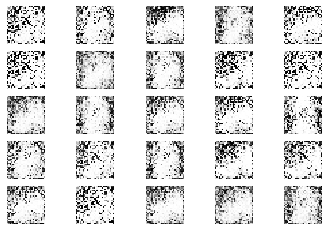

1 [D loss: 0.077336, acc.: 100.00%] [G loss: 2.313774]
2 [D loss: 0.055704, acc.: 100.00%] [G loss: 2.456040]
3 [D loss: 0.048440, acc.: 100.00%] [G loss: 2.515405]
4 [D loss: 0.044744, acc.: 100.00%] [G loss: 2.570683]
5 [D loss: 0.038211, acc.: 100.00%] [G loss: 2.640794]
6 [D loss: 0.039947, acc.: 100.00%] [G loss: 2.790114]
7 [D loss: 0.035352, acc.: 100.00%] [G loss: 2.878871]
8 [D loss: 0.286966, acc.: 98.44%] [G loss: 2.782835]
9 [D loss: 0.285192, acc.: 98.44%] [G loss: 2.941637]
10 [D loss: 0.281537, acc.: 98.44%] [G loss: 2.928063]
11 [D loss: 0.281885, acc.: 98.44%] [G loss: 2.963078]
12 [D loss: 0.580994, acc.: 95.31%] [G loss: 0.981470]
13 [D loss: 0.325465, acc.: 82.81%] [G loss: 0.908432]
14 [D loss: 0.266907, acc.: 100.00%] [G loss: 1.136739]
15 [D loss: 0.183265, acc.: 100.00%] [G loss: 1.428949]
16 [D loss: 0.126185, acc.: 100.00%] [G loss: 1.721114]
17 [D loss: 0.094335, acc.: 100.00%] [G loss: 1.978938]
18 [D loss: 0.080842, acc.: 100.00%] [G loss: 2.124252]
19 [D l

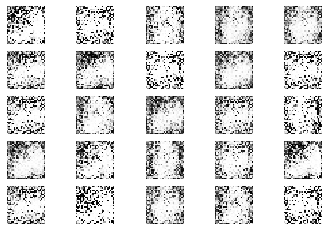

51 [D loss: 0.085254, acc.: 100.00%] [G loss: 2.080056]
52 [D loss: 0.323373, acc.: 98.44%] [G loss: 2.191306]
53 [D loss: 0.059074, acc.: 100.00%] [G loss: 2.309057]
54 [D loss: 0.054953, acc.: 100.00%] [G loss: 2.423151]
55 [D loss: 0.045028, acc.: 100.00%] [G loss: 2.442885]
56 [D loss: 0.047721, acc.: 100.00%] [G loss: 2.499617]
57 [D loss: 0.042426, acc.: 100.00%] [G loss: 2.624033]
58 [D loss: 0.041965, acc.: 100.00%] [G loss: 2.643410]
59 [D loss: 0.041071, acc.: 100.00%] [G loss: 2.671254]
60 [D loss: 0.039352, acc.: 100.00%] [G loss: 2.692272]
61 [D loss: 0.283358, acc.: 98.44%] [G loss: 2.370956]
62 [D loss: 0.054594, acc.: 100.00%] [G loss: 2.342728]
63 [D loss: 0.058085, acc.: 100.00%] [G loss: 2.342107]
64 [D loss: 0.304774, acc.: 98.44%] [G loss: 2.535218]
65 [D loss: 0.049956, acc.: 100.00%] [G loss: 2.514678]
66 [D loss: 0.043775, acc.: 100.00%] [G loss: 2.575251]
67 [D loss: 0.384491, acc.: 81.25%] [G loss: 0.526594]
68 [D loss: 0.634907, acc.: 50.00%] [G loss: 0.52297

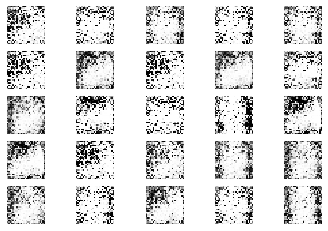

101 [D loss: 0.040121, acc.: 100.00%] [G loss: 2.582911]
102 [D loss: 0.546525, acc.: 96.88%] [G loss: 2.686540]
103 [D loss: 0.313509, acc.: 98.44%] [G loss: 2.127429]
104 [D loss: 0.067711, acc.: 100.00%] [G loss: 2.065525]
105 [D loss: 0.068552, acc.: 100.00%] [G loss: 2.170700]
106 [D loss: 0.067430, acc.: 100.00%] [G loss: 2.326697]
107 [D loss: 0.056305, acc.: 100.00%] [G loss: 2.481738]
108 [D loss: 0.048617, acc.: 100.00%] [G loss: 2.616098]
109 [D loss: 0.045552, acc.: 100.00%] [G loss: 2.582809]
110 [D loss: 0.041236, acc.: 100.00%] [G loss: 2.642943]
111 [D loss: 0.035745, acc.: 100.00%] [G loss: 2.779389]
112 [D loss: 0.540638, acc.: 96.88%] [G loss: 2.935268]
113 [D loss: 0.032260, acc.: 100.00%] [G loss: 2.877963]
114 [D loss: 0.029464, acc.: 100.00%] [G loss: 2.978876]
115 [D loss: 0.027957, acc.: 100.00%] [G loss: 3.052823]
116 [D loss: 0.025487, acc.: 100.00%] [G loss: 3.098562]
117 [D loss: 0.530125, acc.: 96.88%] [G loss: 3.129888]
118 [D loss: 0.407720, acc.: 96.88%

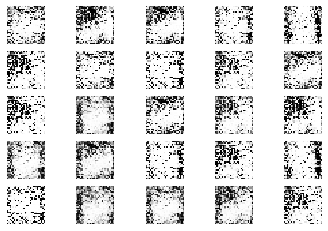

151 [D loss: 0.039400, acc.: 100.00%] [G loss: 2.756922]
152 [D loss: 0.040948, acc.: 100.00%] [G loss: 2.754696]
153 [D loss: 0.035610, acc.: 100.00%] [G loss: 2.801874]
154 [D loss: 0.037195, acc.: 100.00%] [G loss: 2.816920]
155 [D loss: 0.031363, acc.: 100.00%] [G loss: 2.827198]
156 [D loss: 0.283114, acc.: 98.44%] [G loss: 2.887891]
157 [D loss: 0.029722, acc.: 100.00%] [G loss: 2.853897]
158 [D loss: 0.027791, acc.: 100.00%] [G loss: 2.922569]
159 [D loss: 0.028911, acc.: 100.00%] [G loss: 2.952188]
160 [D loss: 0.025907, acc.: 100.00%] [G loss: 2.965574]
161 [D loss: 0.027779, acc.: 100.00%] [G loss: 2.862326]
162 [D loss: 0.029159, acc.: 100.00%] [G loss: 2.984796]
163 [D loss: 0.028134, acc.: 100.00%] [G loss: 3.059833]
164 [D loss: 0.179489, acc.: 98.44%] [G loss: 1.516051]
165 [D loss: 0.149742, acc.: 100.00%] [G loss: 1.533491]
166 [D loss: 0.139670, acc.: 100.00%] [G loss: 1.711059]
167 [D loss: 0.109779, acc.: 100.00%] [G loss: 1.875125]
168 [D loss: 0.068191, acc.: 100.

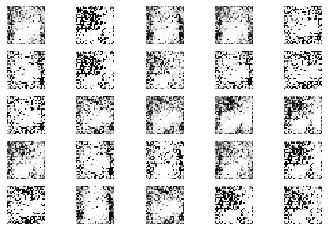

201 [D loss: 0.480080, acc.: 96.88%] [G loss: 2.150613]
202 [D loss: 0.074455, acc.: 100.00%] [G loss: 2.060421]
203 [D loss: 0.081758, acc.: 100.00%] [G loss: 2.098775]
204 [D loss: 0.068589, acc.: 100.00%] [G loss: 2.288929]
205 [D loss: 0.059153, acc.: 100.00%] [G loss: 2.367458]
206 [D loss: 0.052086, acc.: 100.00%] [G loss: 2.467637]
207 [D loss: 0.049603, acc.: 100.00%] [G loss: 2.625635]
208 [D loss: 0.040138, acc.: 100.00%] [G loss: 2.723025]
209 [D loss: 0.037188, acc.: 100.00%] [G loss: 2.774801]
210 [D loss: 0.031118, acc.: 100.00%] [G loss: 2.794374]
211 [D loss: 0.031618, acc.: 100.00%] [G loss: 2.823435]
212 [D loss: 0.535850, acc.: 96.88%] [G loss: 2.998477]
213 [D loss: 0.535079, acc.: 96.88%] [G loss: 2.971214]
214 [D loss: 0.532445, acc.: 96.88%] [G loss: 2.950439]
215 [D loss: 0.669544, acc.: 95.31%] [G loss: 1.090085]
216 [D loss: 0.273800, acc.: 87.50%] [G loss: 0.953693]
217 [D loss: 0.331113, acc.: 81.25%] [G loss: 1.324887]
218 [D loss: 0.174513, acc.: 93.75%] [

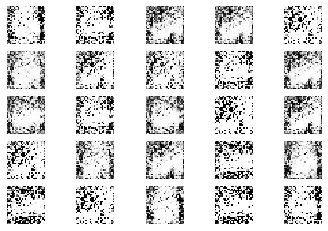

251 [D loss: 0.055282, acc.: 100.00%] [G loss: 2.455472]
252 [D loss: 0.055437, acc.: 100.00%] [G loss: 2.649927]
253 [D loss: 0.046543, acc.: 100.00%] [G loss: 2.679595]
254 [D loss: 0.038851, acc.: 100.00%] [G loss: 2.760328]
255 [D loss: 0.033882, acc.: 100.00%] [G loss: 2.836001]
256 [D loss: 0.035540, acc.: 100.00%] [G loss: 2.879600]
257 [D loss: 0.031897, acc.: 100.00%] [G loss: 2.906493]
258 [D loss: 0.282872, acc.: 98.44%] [G loss: 2.948298]
259 [D loss: 0.031626, acc.: 100.00%] [G loss: 3.009248]
260 [D loss: 0.029199, acc.: 100.00%] [G loss: 3.013911]
261 [D loss: 0.029411, acc.: 100.00%] [G loss: 3.093781]
262 [D loss: 0.079711, acc.: 98.44%] [G loss: 1.986311]
263 [D loss: 0.097710, acc.: 100.00%] [G loss: 1.823370]
264 [D loss: 0.095945, acc.: 100.00%] [G loss: 1.984288]
265 [D loss: 0.073241, acc.: 100.00%] [G loss: 2.156134]
266 [D loss: 0.060226, acc.: 100.00%] [G loss: 2.296736]
267 [D loss: 0.050005, acc.: 100.00%] [G loss: 2.545469]
268 [D loss: 0.045149, acc.: 100.

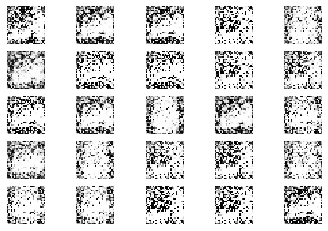

301 [D loss: 0.183358, acc.: 98.44%] [G loss: 2.137646]
302 [D loss: 0.083014, acc.: 100.00%] [G loss: 2.055117]
303 [D loss: 0.078640, acc.: 100.00%] [G loss: 2.279446]
304 [D loss: 0.058586, acc.: 100.00%] [G loss: 2.328007]
305 [D loss: 0.050420, acc.: 100.00%] [G loss: 2.527406]
306 [D loss: 0.041839, acc.: 100.00%] [G loss: 2.706928]
307 [D loss: 0.036667, acc.: 100.00%] [G loss: 2.767437]
308 [D loss: 0.037574, acc.: 100.00%] [G loss: 2.910240]
309 [D loss: 0.029879, acc.: 100.00%] [G loss: 2.961132]
310 [D loss: 0.027610, acc.: 100.00%] [G loss: 3.054456]
311 [D loss: 0.026099, acc.: 100.00%] [G loss: 3.081937]
312 [D loss: 0.023890, acc.: 100.00%] [G loss: 3.117014]
313 [D loss: 0.022774, acc.: 100.00%] [G loss: 3.199262]
314 [D loss: 0.022870, acc.: 100.00%] [G loss: 3.324171]
315 [D loss: 0.022359, acc.: 100.00%] [G loss: 3.244684]
316 [D loss: 0.022364, acc.: 100.00%] [G loss: 3.373471]
317 [D loss: 0.018988, acc.: 100.00%] [G loss: 3.344426]
318 [D loss: 0.019434, acc.: 100

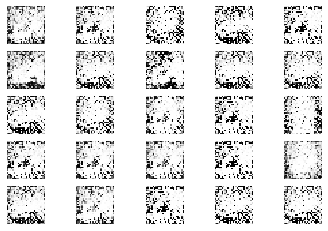

351 [D loss: 0.290548, acc.: 98.44%] [G loss: 2.841108]
352 [D loss: 0.294369, acc.: 98.44%] [G loss: 2.624039]
353 [D loss: 0.040924, acc.: 100.00%] [G loss: 2.643516]
354 [D loss: 0.288442, acc.: 98.44%] [G loss: 2.717947]
355 [D loss: 0.038109, acc.: 100.00%] [G loss: 2.735873]
356 [D loss: 0.288088, acc.: 98.44%] [G loss: 2.886760]
357 [D loss: 0.370120, acc.: 96.88%] [G loss: 1.035188]
358 [D loss: 0.319669, acc.: 81.25%] [G loss: 1.304035]
359 [D loss: 0.164265, acc.: 98.44%] [G loss: 1.921919]
360 [D loss: 0.076260, acc.: 100.00%] [G loss: 2.288426]
361 [D loss: 0.052005, acc.: 100.00%] [G loss: 2.646248]
362 [D loss: 0.040026, acc.: 100.00%] [G loss: 2.814472]
363 [D loss: 0.033937, acc.: 100.00%] [G loss: 2.971579]
364 [D loss: 0.034770, acc.: 100.00%] [G loss: 2.826031]
365 [D loss: 0.035748, acc.: 100.00%] [G loss: 2.877129]
366 [D loss: 0.036902, acc.: 100.00%] [G loss: 3.080667]
367 [D loss: 0.804593, acc.: 57.81%] [G loss: 0.295711]
368 [D loss: 1.189519, acc.: 50.00%] [G

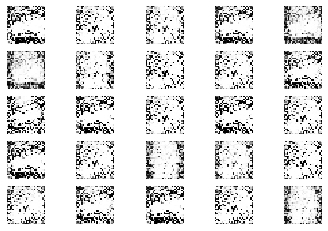

401 [D loss: 0.288113, acc.: 98.44%] [G loss: 2.818841]
402 [D loss: 0.038004, acc.: 100.00%] [G loss: 2.874310]
403 [D loss: 0.036115, acc.: 100.00%] [G loss: 2.945612]
404 [D loss: 0.032591, acc.: 100.00%] [G loss: 2.966360]
405 [D loss: 0.234749, acc.: 98.44%] [G loss: 1.926592]
406 [D loss: 0.106011, acc.: 100.00%] [G loss: 1.845243]
407 [D loss: 0.095775, acc.: 100.00%] [G loss: 2.039043]
408 [D loss: 0.071007, acc.: 100.00%] [G loss: 2.245087]
409 [D loss: 0.059938, acc.: 100.00%] [G loss: 2.452635]
410 [D loss: 0.048604, acc.: 100.00%] [G loss: 2.597771]
411 [D loss: 0.043031, acc.: 100.00%] [G loss: 2.659767]
412 [D loss: 0.038649, acc.: 100.00%] [G loss: 2.765822]
413 [D loss: 0.039227, acc.: 100.00%] [G loss: 2.849401]
414 [D loss: 0.035682, acc.: 100.00%] [G loss: 2.921284]
415 [D loss: 0.673293, acc.: 70.31%] [G loss: 0.450232]
416 [D loss: 0.848716, acc.: 54.69%] [G loss: 0.540415]
417 [D loss: 0.584658, acc.: 62.50%] [G loss: 0.948062]
418 [D loss: 0.263394, acc.: 89.06%]

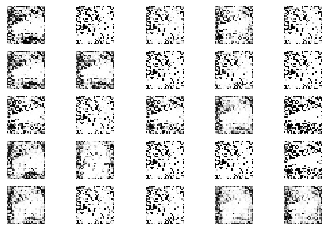

451 [D loss: 0.035587, acc.: 100.00%] [G loss: 2.713800]
452 [D loss: 0.034436, acc.: 100.00%] [G loss: 2.838395]
453 [D loss: 0.035053, acc.: 100.00%] [G loss: 2.873502]
454 [D loss: 0.034429, acc.: 100.00%] [G loss: 2.891008]
455 [D loss: 0.034769, acc.: 100.00%] [G loss: 2.935917]
456 [D loss: 0.029890, acc.: 100.00%] [G loss: 2.975204]
457 [D loss: 0.028828, acc.: 100.00%] [G loss: 2.959242]
458 [D loss: 0.026404, acc.: 100.00%] [G loss: 3.060793]
459 [D loss: 0.023949, acc.: 100.00%] [G loss: 3.095071]
460 [D loss: 0.024119, acc.: 100.00%] [G loss: 3.098034]
461 [D loss: 0.476179, acc.: 70.31%] [G loss: 0.394668]
462 [D loss: 0.940309, acc.: 51.56%] [G loss: 0.400980]
463 [D loss: 0.583428, acc.: 60.94%] [G loss: 0.765171]
464 [D loss: 0.304755, acc.: 82.81%] [G loss: 1.292156]
465 [D loss: 0.158580, acc.: 96.88%] [G loss: 1.908174]
466 [D loss: 0.117957, acc.: 100.00%] [G loss: 2.001996]
467 [D loss: 0.070430, acc.: 100.00%] [G loss: 2.164943]
468 [D loss: 0.056819, acc.: 100.00%

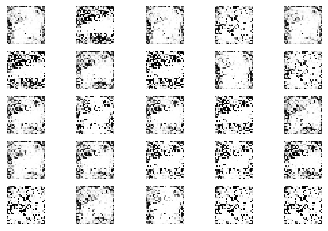

501 [D loss: 0.031969, acc.: 100.00%] [G loss: 2.929423]
502 [D loss: 0.281618, acc.: 98.44%] [G loss: 2.960082]
503 [D loss: 0.032029, acc.: 100.00%] [G loss: 2.935969]
504 [D loss: 0.029829, acc.: 100.00%] [G loss: 3.008457]
505 [D loss: 0.036431, acc.: 100.00%] [G loss: 2.975593]
506 [D loss: 0.026798, acc.: 100.00%] [G loss: 2.953244]
507 [D loss: 0.281239, acc.: 98.44%] [G loss: 3.018549]
508 [D loss: 0.034727, acc.: 100.00%] [G loss: 3.142588]
509 [D loss: 0.027741, acc.: 100.00%] [G loss: 3.037193]
510 [D loss: 0.030693, acc.: 100.00%] [G loss: 3.090979]
511 [D loss: 0.032595, acc.: 100.00%] [G loss: 3.101791]
512 [D loss: 0.289094, acc.: 98.44%] [G loss: 3.231244]
513 [D loss: 0.032772, acc.: 100.00%] [G loss: 3.072314]
514 [D loss: 0.529428, acc.: 96.88%] [G loss: 3.037653]
515 [D loss: 0.283208, acc.: 98.44%] [G loss: 3.147596]
516 [D loss: 0.279154, acc.: 98.44%] [G loss: 3.110387]
517 [D loss: 0.024097, acc.: 100.00%] [G loss: 3.106235]
518 [D loss: 0.035983, acc.: 100.00%]

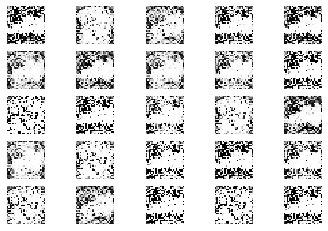

551 [D loss: 0.072368, acc.: 100.00%] [G loss: 2.266879]
552 [D loss: 0.069300, acc.: 100.00%] [G loss: 2.354496]
553 [D loss: 0.065210, acc.: 100.00%] [G loss: 2.478633]
554 [D loss: 0.047399, acc.: 100.00%] [G loss: 2.611099]
555 [D loss: 0.039045, acc.: 100.00%] [G loss: 2.793141]
556 [D loss: 0.033611, acc.: 100.00%] [G loss: 2.860745]
557 [D loss: 0.027860, acc.: 100.00%] [G loss: 2.934539]
558 [D loss: 0.030474, acc.: 100.00%] [G loss: 3.150852]
559 [D loss: 0.024583, acc.: 100.00%] [G loss: 3.083928]
560 [D loss: 0.024383, acc.: 100.00%] [G loss: 3.212102]
561 [D loss: 0.273671, acc.: 98.44%] [G loss: 3.241515]
562 [D loss: 0.274622, acc.: 98.44%] [G loss: 3.247004]
563 [D loss: 0.021139, acc.: 100.00%] [G loss: 3.263680]
564 [D loss: 0.019292, acc.: 100.00%] [G loss: 3.404166]
565 [D loss: 0.019911, acc.: 100.00%] [G loss: 3.370234]
566 [D loss: 0.018102, acc.: 100.00%] [G loss: 3.444352]
567 [D loss: 0.122011, acc.: 98.44%] [G loss: 1.522206]
568 [D loss: 0.155987, acc.: 98.44

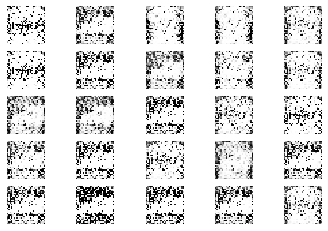

601 [D loss: 0.026975, acc.: 100.00%] [G loss: 3.095385]
602 [D loss: 0.023331, acc.: 100.00%] [G loss: 3.105753]
603 [D loss: 0.022654, acc.: 100.00%] [G loss: 3.264158]
604 [D loss: 0.021909, acc.: 100.00%] [G loss: 3.287368]
605 [D loss: 0.018340, acc.: 100.00%] [G loss: 3.259902]
606 [D loss: 0.019073, acc.: 100.00%] [G loss: 3.313918]
607 [D loss: 0.022027, acc.: 100.00%] [G loss: 3.268655]
608 [D loss: 0.019732, acc.: 100.00%] [G loss: 3.346800]
609 [D loss: 0.017637, acc.: 100.00%] [G loss: 3.377292]
610 [D loss: 0.018358, acc.: 100.00%] [G loss: 3.588879]
611 [D loss: 0.015977, acc.: 100.00%] [G loss: 3.511336]
612 [D loss: 0.017962, acc.: 100.00%] [G loss: 3.500724]
613 [D loss: 0.016157, acc.: 100.00%] [G loss: 3.571388]
614 [D loss: 0.016409, acc.: 100.00%] [G loss: 3.698405]
615 [D loss: 0.014938, acc.: 100.00%] [G loss: 3.637767]
616 [D loss: 0.013621, acc.: 100.00%] [G loss: 3.717659]
617 [D loss: 0.013845, acc.: 100.00%] [G loss: 3.764557]
618 [D loss: 0.308471, acc.: 98

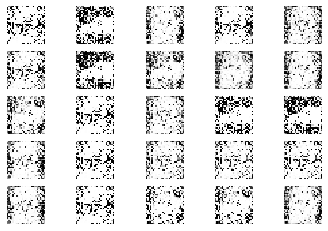

651 [D loss: 0.016269, acc.: 100.00%] [G loss: 3.495573]
652 [D loss: 0.014471, acc.: 100.00%] [G loss: 3.651404]
653 [D loss: 0.015617, acc.: 100.00%] [G loss: 3.528709]
654 [D loss: 0.015389, acc.: 100.00%] [G loss: 3.675917]
655 [D loss: 0.152832, acc.: 98.44%] [G loss: 1.772865]
656 [D loss: 0.114869, acc.: 100.00%] [G loss: 1.733918]
657 [D loss: 0.115396, acc.: 100.00%] [G loss: 2.095924]
658 [D loss: 0.068180, acc.: 100.00%] [G loss: 2.266259]
659 [D loss: 0.051978, acc.: 100.00%] [G loss: 2.516466]
660 [D loss: 0.043080, acc.: 100.00%] [G loss: 2.683463]
661 [D loss: 0.036755, acc.: 100.00%] [G loss: 2.757108]
662 [D loss: 0.034591, acc.: 100.00%] [G loss: 2.887769]
663 [D loss: 0.032600, acc.: 100.00%] [G loss: 2.910870]
664 [D loss: 0.029879, acc.: 100.00%] [G loss: 3.023853]
665 [D loss: 0.026336, acc.: 100.00%] [G loss: 3.077038]
666 [D loss: 0.029097, acc.: 100.00%] [G loss: 3.079081]
667 [D loss: 0.025178, acc.: 100.00%] [G loss: 3.139549]
668 [D loss: 0.026025, acc.: 100

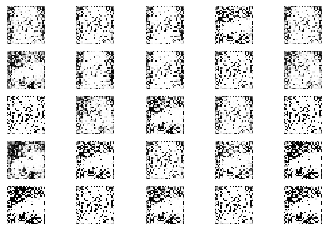

701 [D loss: 0.020304, acc.: 100.00%] [G loss: 3.524096]
702 [D loss: 0.266745, acc.: 98.44%] [G loss: 3.528591]
703 [D loss: 0.018669, acc.: 100.00%] [G loss: 3.529273]
704 [D loss: 0.017701, acc.: 100.00%] [G loss: 3.577087]
705 [D loss: 0.016540, acc.: 100.00%] [G loss: 3.617832]
706 [D loss: 0.015984, acc.: 100.00%] [G loss: 3.704279]
707 [D loss: 0.015309, acc.: 100.00%] [G loss: 3.600775]
708 [D loss: 0.019351, acc.: 100.00%] [G loss: 3.563888]
709 [D loss: 0.014216, acc.: 100.00%] [G loss: 3.546425]
710 [D loss: 0.015963, acc.: 100.00%] [G loss: 3.667838]
711 [D loss: 0.267058, acc.: 98.44%] [G loss: 3.731348]
712 [D loss: 0.015516, acc.: 100.00%] [G loss: 3.652909]
713 [D loss: 0.017527, acc.: 100.00%] [G loss: 3.625244]
714 [D loss: 0.015352, acc.: 100.00%] [G loss: 3.706043]
715 [D loss: 0.013529, acc.: 100.00%] [G loss: 3.746307]
716 [D loss: 0.014844, acc.: 100.00%] [G loss: 3.822064]
717 [D loss: 0.013544, acc.: 100.00%] [G loss: 3.962877]
718 [D loss: 0.265960, acc.: 98.4

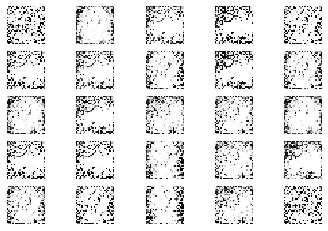

751 [D loss: 0.030296, acc.: 100.00%] [G loss: 3.082816]
752 [D loss: 0.279974, acc.: 98.44%] [G loss: 3.208105]
753 [D loss: 0.280547, acc.: 98.44%] [G loss: 3.139895]
754 [D loss: 1.914126, acc.: 46.88%] [G loss: 0.207636]
755 [D loss: 1.215380, acc.: 51.56%] [G loss: 0.425382]
756 [D loss: 0.442511, acc.: 76.56%] [G loss: 1.424870]
757 [D loss: 0.163280, acc.: 95.31%] [G loss: 2.645896]
758 [D loss: 0.057941, acc.: 100.00%] [G loss: 2.921885]
759 [D loss: 0.035288, acc.: 100.00%] [G loss: 3.028950]
760 [D loss: 0.032246, acc.: 100.00%] [G loss: 3.129739]
761 [D loss: 0.034137, acc.: 100.00%] [G loss: 3.091379]
762 [D loss: 0.036387, acc.: 100.00%] [G loss: 3.005927]
763 [D loss: 0.032761, acc.: 100.00%] [G loss: 3.047530]
764 [D loss: 0.290661, acc.: 98.44%] [G loss: 2.914603]
765 [D loss: 0.034392, acc.: 100.00%] [G loss: 2.909427]
766 [D loss: 0.039318, acc.: 100.00%] [G loss: 2.959198]
767 [D loss: 0.034058, acc.: 100.00%] [G loss: 3.015423]
768 [D loss: 0.034529, acc.: 100.00%] 

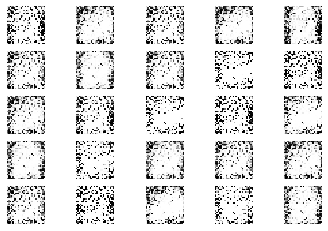

801 [D loss: 0.019034, acc.: 100.00%] [G loss: 3.433428]
802 [D loss: 0.018845, acc.: 100.00%] [G loss: 3.441185]
803 [D loss: 0.017032, acc.: 100.00%] [G loss: 3.438529]
804 [D loss: 0.082259, acc.: 98.44%] [G loss: 2.009679]
805 [D loss: 0.119636, acc.: 100.00%] [G loss: 1.985553]
806 [D loss: 0.079274, acc.: 100.00%] [G loss: 2.274999]
807 [D loss: 0.053197, acc.: 100.00%] [G loss: 2.619973]
808 [D loss: 0.041750, acc.: 100.00%] [G loss: 2.802461]
809 [D loss: 0.038695, acc.: 100.00%] [G loss: 2.995916]
810 [D loss: 0.032626, acc.: 100.00%] [G loss: 3.205940]
811 [D loss: 0.021228, acc.: 100.00%] [G loss: 3.268066]
812 [D loss: 0.018950, acc.: 100.00%] [G loss: 3.479965]
813 [D loss: 0.571486, acc.: 78.12%] [G loss: 0.451671]
814 [D loss: 0.708035, acc.: 50.00%] [G loss: 0.759916]
815 [D loss: 0.340142, acc.: 89.06%] [G loss: 1.526586]
816 [D loss: 0.087909, acc.: 100.00%] [G loss: 2.247779]
817 [D loss: 0.057195, acc.: 100.00%] [G loss: 2.571970]
818 [D loss: 0.055916, acc.: 100.00

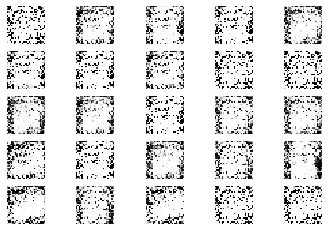

851 [D loss: 0.273303, acc.: 98.44%] [G loss: 3.649126]
852 [D loss: 0.518283, acc.: 96.88%] [G loss: 3.731361]
853 [D loss: 0.014618, acc.: 100.00%] [G loss: 3.727421]
854 [D loss: 0.404198, acc.: 96.88%] [G loss: 2.006953]
855 [D loss: 0.116516, acc.: 96.88%] [G loss: 1.988236]
856 [D loss: 0.140148, acc.: 92.19%] [G loss: 2.203259]
857 [D loss: 0.076664, acc.: 98.44%] [G loss: 2.515972]
858 [D loss: 0.038964, acc.: 100.00%] [G loss: 2.904835]
859 [D loss: 0.038427, acc.: 100.00%] [G loss: 2.888350]
860 [D loss: 0.267574, acc.: 90.62%] [G loss: 1.167022]
861 [D loss: 0.312956, acc.: 81.25%] [G loss: 1.365746]
862 [D loss: 0.159169, acc.: 100.00%] [G loss: 1.850956]
863 [D loss: 0.081442, acc.: 100.00%] [G loss: 2.235691]
864 [D loss: 0.068188, acc.: 100.00%] [G loss: 2.470656]
865 [D loss: 0.041307, acc.: 100.00%] [G loss: 2.656152]
866 [D loss: 0.055102, acc.: 100.00%] [G loss: 2.949210]
867 [D loss: 0.036165, acc.: 100.00%] [G loss: 2.962050]
868 [D loss: 0.027315, acc.: 100.00%] [

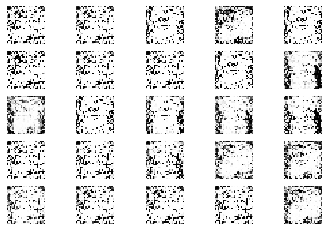

901 [D loss: 0.025801, acc.: 100.00%] [G loss: 3.062824]
902 [D loss: 0.024921, acc.: 100.00%] [G loss: 3.165791]
903 [D loss: 0.026802, acc.: 100.00%] [G loss: 3.126754]
904 [D loss: 0.022217, acc.: 100.00%] [G loss: 3.142121]
905 [D loss: 0.023986, acc.: 100.00%] [G loss: 3.282900]
906 [D loss: 0.022457, acc.: 100.00%] [G loss: 3.263013]
907 [D loss: 0.023543, acc.: 100.00%] [G loss: 3.283215]
908 [D loss: 0.023027, acc.: 100.00%] [G loss: 3.297603]
909 [D loss: 0.021631, acc.: 100.00%] [G loss: 3.238875]
910 [D loss: 0.021054, acc.: 100.00%] [G loss: 3.309396]
911 [D loss: 0.019436, acc.: 100.00%] [G loss: 3.326493]
912 [D loss: 0.022537, acc.: 100.00%] [G loss: 3.268127]
913 [D loss: 0.019590, acc.: 100.00%] [G loss: 3.363639]
914 [D loss: 0.020579, acc.: 100.00%] [G loss: 3.390339]
915 [D loss: 0.018771, acc.: 100.00%] [G loss: 3.417289]
916 [D loss: 0.019149, acc.: 100.00%] [G loss: 3.478228]
917 [D loss: 0.019079, acc.: 100.00%] [G loss: 3.496824]
918 [D loss: 0.018513, acc.: 10

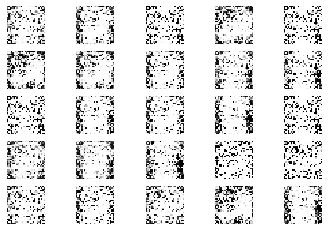

951 [D loss: 0.011595, acc.: 100.00%] [G loss: 3.849994]
952 [D loss: 0.012187, acc.: 100.00%] [G loss: 3.847939]
953 [D loss: 0.011104, acc.: 100.00%] [G loss: 3.840214]
954 [D loss: 0.011284, acc.: 100.00%] [G loss: 3.870413]
955 [D loss: 0.011218, acc.: 100.00%] [G loss: 3.916204]
956 [D loss: 0.010576, acc.: 100.00%] [G loss: 3.939036]
957 [D loss: 0.016771, acc.: 100.00%] [G loss: 3.496494]
958 [D loss: 0.015968, acc.: 100.00%] [G loss: 3.562505]
959 [D loss: 0.016739, acc.: 100.00%] [G loss: 3.456004]
960 [D loss: 0.016405, acc.: 100.00%] [G loss: 3.605780]
961 [D loss: 0.015042, acc.: 100.00%] [G loss: 3.679579]
962 [D loss: 0.013084, acc.: 100.00%] [G loss: 3.717586]
963 [D loss: 0.014274, acc.: 100.00%] [G loss: 3.763290]
964 [D loss: 0.014285, acc.: 100.00%] [G loss: 3.785892]
965 [D loss: 0.264849, acc.: 98.44%] [G loss: 3.787702]
966 [D loss: 0.012798, acc.: 100.00%] [G loss: 3.845675]
967 [D loss: 0.012401, acc.: 100.00%] [G loss: 3.835288]
968 [D loss: 0.010794, acc.: 100

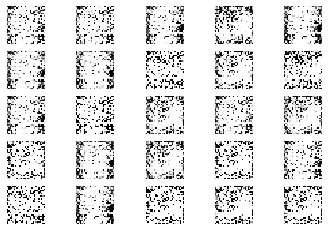

1001 [D loss: 0.016139, acc.: 100.00%] [G loss: 3.540507]
1002 [D loss: 0.014746, acc.: 100.00%] [G loss: 3.653660]
1003 [D loss: 0.015392, acc.: 100.00%] [G loss: 3.632558]
1004 [D loss: 0.014432, acc.: 100.00%] [G loss: 3.640909]
1005 [D loss: 0.013936, acc.: 100.00%] [G loss: 3.633199]
1006 [D loss: 0.013601, acc.: 100.00%] [G loss: 3.656048]
1007 [D loss: 0.013165, acc.: 100.00%] [G loss: 3.705816]
1008 [D loss: 0.014212, acc.: 100.00%] [G loss: 3.827549]
1009 [D loss: 0.013108, acc.: 100.00%] [G loss: 3.814531]
1010 [D loss: 0.011664, acc.: 100.00%] [G loss: 3.871462]
1011 [D loss: 0.012143, acc.: 100.00%] [G loss: 3.888563]
1012 [D loss: 0.012288, acc.: 100.00%] [G loss: 3.877695]
1013 [D loss: 0.012052, acc.: 100.00%] [G loss: 3.800460]
1014 [D loss: 0.011221, acc.: 100.00%] [G loss: 3.896452]
1015 [D loss: 0.012136, acc.: 100.00%] [G loss: 3.885595]
1016 [D loss: 0.009940, acc.: 100.00%] [G loss: 3.961706]
1017 [D loss: 0.010650, acc.: 100.00%] [G loss: 3.927057]
1018 [D loss: 

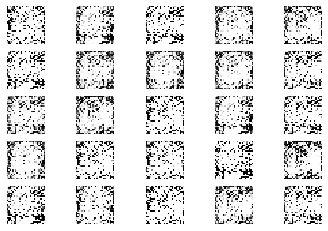

1051 [D loss: 0.016720, acc.: 100.00%] [G loss: 3.515126]
1052 [D loss: 0.016310, acc.: 100.00%] [G loss: 3.609704]
1053 [D loss: 0.015720, acc.: 100.00%] [G loss: 3.589056]
1054 [D loss: 0.016538, acc.: 100.00%] [G loss: 3.679534]
1055 [D loss: 0.014101, acc.: 100.00%] [G loss: 3.583994]
1056 [D loss: 0.014436, acc.: 100.00%] [G loss: 3.636431]
1057 [D loss: 0.015120, acc.: 100.00%] [G loss: 3.775292]
1058 [D loss: 0.013320, acc.: 100.00%] [G loss: 3.594869]
1059 [D loss: 0.014911, acc.: 100.00%] [G loss: 3.710760]
1060 [D loss: 0.013466, acc.: 100.00%] [G loss: 3.772584]
1061 [D loss: 0.013726, acc.: 100.00%] [G loss: 3.709199]
1062 [D loss: 0.014198, acc.: 100.00%] [G loss: 3.725967]
1063 [D loss: 0.013856, acc.: 100.00%] [G loss: 3.838369]
1064 [D loss: 0.014153, acc.: 100.00%] [G loss: 3.868225]
1065 [D loss: 0.015542, acc.: 100.00%] [G loss: 3.784918]
1066 [D loss: 0.013654, acc.: 100.00%] [G loss: 3.858162]
1067 [D loss: 0.011006, acc.: 100.00%] [G loss: 3.775423]
1068 [D loss: 

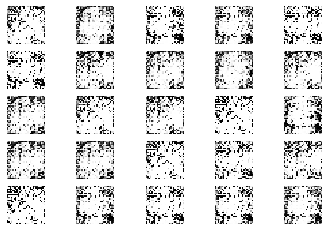

1101 [D loss: 0.011785, acc.: 100.00%] [G loss: 3.821010]
1102 [D loss: 0.263763, acc.: 98.44%] [G loss: 3.768956]
1103 [D loss: 0.012207, acc.: 100.00%] [G loss: 3.813592]
1104 [D loss: 0.011965, acc.: 100.00%] [G loss: 3.857863]
1105 [D loss: 0.011601, acc.: 100.00%] [G loss: 3.802688]
1106 [D loss: 0.011150, acc.: 100.00%] [G loss: 3.961106]
1107 [D loss: 0.010572, acc.: 100.00%] [G loss: 3.848915]
1108 [D loss: 0.010819, acc.: 100.00%] [G loss: 3.900085]
1109 [D loss: 0.010146, acc.: 100.00%] [G loss: 3.993938]
1110 [D loss: 0.010378, acc.: 100.00%] [G loss: 3.995387]
1111 [D loss: 0.009687, acc.: 100.00%] [G loss: 3.962951]
1112 [D loss: 0.010177, acc.: 100.00%] [G loss: 4.025020]
1113 [D loss: 0.010037, acc.: 100.00%] [G loss: 3.991501]
1114 [D loss: 0.010177, acc.: 100.00%] [G loss: 4.050017]
1115 [D loss: 0.010959, acc.: 100.00%] [G loss: 4.084826]
1116 [D loss: 0.034595, acc.: 98.44%] [G loss: 2.765221]
1117 [D loss: 0.039875, acc.: 100.00%] [G loss: 2.594158]
1118 [D loss: 0.

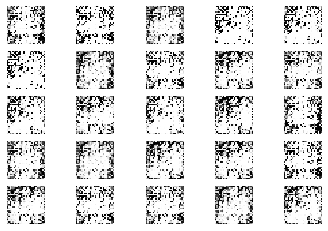

1151 [D loss: 0.016491, acc.: 100.00%] [G loss: 3.676911]
1152 [D loss: 0.014117, acc.: 100.00%] [G loss: 3.711188]
1153 [D loss: 0.013749, acc.: 100.00%] [G loss: 3.738676]
1154 [D loss: 0.013014, acc.: 100.00%] [G loss: 3.828411]
1155 [D loss: 0.012508, acc.: 100.00%] [G loss: 3.991179]
1156 [D loss: 0.013393, acc.: 100.00%] [G loss: 3.976126]
1157 [D loss: 0.009920, acc.: 100.00%] [G loss: 3.956323]
1158 [D loss: 0.009578, acc.: 100.00%] [G loss: 4.095337]
1159 [D loss: 0.007826, acc.: 100.00%] [G loss: 4.070342]
1160 [D loss: 0.010045, acc.: 100.00%] [G loss: 4.191525]
1161 [D loss: 0.133437, acc.: 98.44%] [G loss: 2.626813]
1162 [D loss: 0.067361, acc.: 100.00%] [G loss: 2.507542]
1163 [D loss: 0.046026, acc.: 100.00%] [G loss: 2.624685]
1164 [D loss: 0.039730, acc.: 100.00%] [G loss: 2.747990]
1165 [D loss: 0.027105, acc.: 100.00%] [G loss: 3.053775]
1166 [D loss: 0.032072, acc.: 100.00%] [G loss: 3.119945]
1167 [D loss: 0.024769, acc.: 100.00%] [G loss: 3.258981]
1168 [D loss: 0

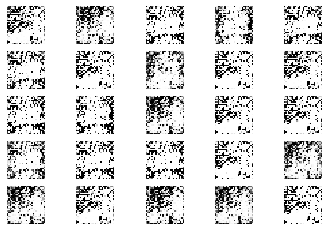

1201 [D loss: 0.011509, acc.: 100.00%] [G loss: 3.836662]
1202 [D loss: 0.011232, acc.: 100.00%] [G loss: 4.065852]
1203 [D loss: 0.010398, acc.: 100.00%] [G loss: 4.002048]
1204 [D loss: 0.008731, acc.: 100.00%] [G loss: 4.186742]
1205 [D loss: 0.008653, acc.: 100.00%] [G loss: 4.097692]
1206 [D loss: 0.009844, acc.: 100.00%] [G loss: 4.069200]
1207 [D loss: 0.009055, acc.: 100.00%] [G loss: 4.221673]
1208 [D loss: 0.007791, acc.: 100.00%] [G loss: 4.450686]
1209 [D loss: 0.008386, acc.: 100.00%] [G loss: 4.292317]
1210 [D loss: 0.007595, acc.: 100.00%] [G loss: 4.234237]
1211 [D loss: 0.007997, acc.: 100.00%] [G loss: 4.231149]
1212 [D loss: 0.007246, acc.: 100.00%] [G loss: 4.330783]
1213 [D loss: 0.008536, acc.: 100.00%] [G loss: 4.342299]
1214 [D loss: 0.007197, acc.: 100.00%] [G loss: 4.459047]
1215 [D loss: 0.007185, acc.: 100.00%] [G loss: 4.444664]
1216 [D loss: 0.006924, acc.: 100.00%] [G loss: 4.479735]
1217 [D loss: 0.006658, acc.: 100.00%] [G loss: 4.347588]
1218 [D loss: 

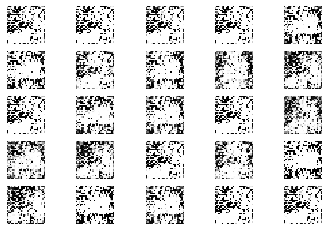

1251 [D loss: 0.007581, acc.: 100.00%] [G loss: 4.301717]
1252 [D loss: 0.007527, acc.: 100.00%] [G loss: 4.334409]
1253 [D loss: 0.006704, acc.: 100.00%] [G loss: 4.435904]
1254 [D loss: 0.007203, acc.: 100.00%] [G loss: 4.366119]
1255 [D loss: 0.006410, acc.: 100.00%] [G loss: 4.403764]
1256 [D loss: 0.007567, acc.: 100.00%] [G loss: 4.430083]
1257 [D loss: 0.006621, acc.: 100.00%] [G loss: 4.455213]
1258 [D loss: 0.007046, acc.: 100.00%] [G loss: 4.422764]
1259 [D loss: 0.006359, acc.: 100.00%] [G loss: 4.407385]
1260 [D loss: 0.006216, acc.: 100.00%] [G loss: 4.530895]
1261 [D loss: 0.005939, acc.: 100.00%] [G loss: 4.644491]
1262 [D loss: 0.006351, acc.: 100.00%] [G loss: 4.732058]
1263 [D loss: 0.005554, acc.: 100.00%] [G loss: 4.655354]
1264 [D loss: 0.005804, acc.: 100.00%] [G loss: 4.698216]
1265 [D loss: 0.005244, acc.: 100.00%] [G loss: 4.700981]
1266 [D loss: 0.005767, acc.: 100.00%] [G loss: 4.732059]
1267 [D loss: 0.005156, acc.: 100.00%] [G loss: 4.693060]
1268 [D loss: 

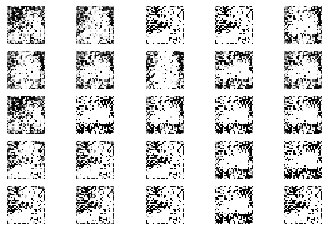

1301 [D loss: 0.010677, acc.: 100.00%] [G loss: 4.156270]
1302 [D loss: 0.010321, acc.: 100.00%] [G loss: 4.227027]
1303 [D loss: 0.261755, acc.: 98.44%] [G loss: 4.192248]
1304 [D loss: 0.094415, acc.: 98.44%] [G loss: 1.659995]
1305 [D loss: 0.208745, acc.: 93.75%] [G loss: 1.962676]
1306 [D loss: 0.100345, acc.: 100.00%] [G loss: 2.528163]
1307 [D loss: 0.063226, acc.: 100.00%] [G loss: 2.671839]
1308 [D loss: 0.044078, acc.: 100.00%] [G loss: 3.068513]
1309 [D loss: 0.040803, acc.: 100.00%] [G loss: 3.293619]
1310 [D loss: 0.023685, acc.: 100.00%] [G loss: 3.257299]
1311 [D loss: 0.026406, acc.: 100.00%] [G loss: 3.235698]
1312 [D loss: 0.024403, acc.: 100.00%] [G loss: 3.268748]
1313 [D loss: 0.025429, acc.: 100.00%] [G loss: 3.425336]
1314 [D loss: 0.022120, acc.: 100.00%] [G loss: 3.485452]
1315 [D loss: 0.023134, acc.: 100.00%] [G loss: 3.377600]
1316 [D loss: 0.023219, acc.: 100.00%] [G loss: 3.546456]
1317 [D loss: 0.018173, acc.: 100.00%] [G loss: 3.587424]
1318 [D loss: 0.0

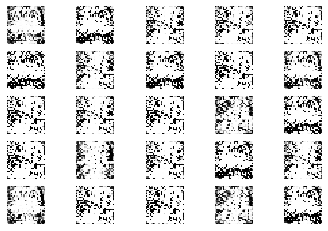

1351 [D loss: 0.009362, acc.: 100.00%] [G loss: 4.174042]
1352 [D loss: 0.009563, acc.: 100.00%] [G loss: 4.144783]
1353 [D loss: 0.261870, acc.: 98.44%] [G loss: 4.176270]
1354 [D loss: 0.009824, acc.: 100.00%] [G loss: 4.242370]
1355 [D loss: 0.008920, acc.: 100.00%] [G loss: 4.189517]
1356 [D loss: 0.259783, acc.: 98.44%] [G loss: 4.213607]
1357 [D loss: 0.259513, acc.: 98.44%] [G loss: 4.342857]
1358 [D loss: 0.275132, acc.: 98.44%] [G loss: 3.068919]
1359 [D loss: 0.032725, acc.: 100.00%] [G loss: 2.984345]
1360 [D loss: 0.026745, acc.: 100.00%] [G loss: 3.158235]
1361 [D loss: 0.027594, acc.: 100.00%] [G loss: 3.365510]
1362 [D loss: 0.019957, acc.: 100.00%] [G loss: 3.579606]
1363 [D loss: 0.014984, acc.: 100.00%] [G loss: 3.735131]
1364 [D loss: 0.015288, acc.: 100.00%] [G loss: 3.804145]
1365 [D loss: 0.012024, acc.: 100.00%] [G loss: 3.871725]
1366 [D loss: 0.012634, acc.: 100.00%] [G loss: 3.899221]
1367 [D loss: 0.011484, acc.: 100.00%] [G loss: 4.011928]
1368 [D loss: 0.00

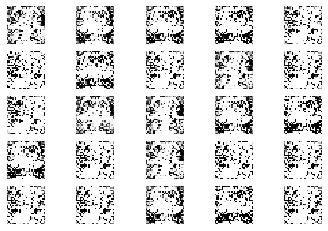

1401 [D loss: 0.029349, acc.: 100.00%] [G loss: 3.253620]
1402 [D loss: 0.025503, acc.: 100.00%] [G loss: 2.989126]
1403 [D loss: 0.045601, acc.: 100.00%] [G loss: 3.298348]
1404 [D loss: 0.036918, acc.: 100.00%] [G loss: 3.638865]
1405 [D loss: 0.028515, acc.: 100.00%] [G loss: 3.310024]
1406 [D loss: 0.042505, acc.: 100.00%] [G loss: 3.381212]
1407 [D loss: 0.025892, acc.: 100.00%] [G loss: 3.088389]
1408 [D loss: 0.028957, acc.: 100.00%] [G loss: 3.251215]
1409 [D loss: 0.029266, acc.: 100.00%] [G loss: 3.320226]
1410 [D loss: 0.023050, acc.: 100.00%] [G loss: 3.234700]
1411 [D loss: 0.026375, acc.: 100.00%] [G loss: 3.070913]
1412 [D loss: 0.030910, acc.: 100.00%] [G loss: 3.170486]
1413 [D loss: 0.028778, acc.: 100.00%] [G loss: 3.291818]
1414 [D loss: 0.024793, acc.: 100.00%] [G loss: 3.618627]
1415 [D loss: 0.022270, acc.: 100.00%] [G loss: 3.468601]
1416 [D loss: 0.019442, acc.: 100.00%] [G loss: 3.399300]
1417 [D loss: 0.019852, acc.: 100.00%] [G loss: 3.481273]
1418 [D loss: 

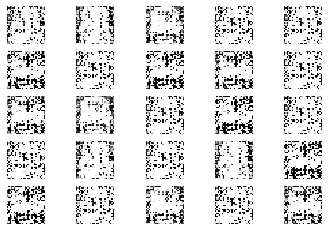

1451 [D loss: 0.008433, acc.: 100.00%] [G loss: 4.295221]
1452 [D loss: 0.007937, acc.: 100.00%] [G loss: 4.315989]
1453 [D loss: 0.007582, acc.: 100.00%] [G loss: 4.207075]
1454 [D loss: 0.007790, acc.: 100.00%] [G loss: 4.438865]
1455 [D loss: 0.007841, acc.: 100.00%] [G loss: 4.328868]
1456 [D loss: 0.007081, acc.: 100.00%] [G loss: 4.480662]
1457 [D loss: 0.006757, acc.: 100.00%] [G loss: 4.417732]
1458 [D loss: 0.297782, acc.: 95.31%] [G loss: 1.027903]
1459 [D loss: 0.441255, acc.: 71.88%] [G loss: 1.607446]
1460 [D loss: 0.082354, acc.: 100.00%] [G loss: 2.666256]
1461 [D loss: 0.042942, acc.: 100.00%] [G loss: 3.194613]
1462 [D loss: 0.024338, acc.: 100.00%] [G loss: 3.539175]
1463 [D loss: 0.024112, acc.: 100.00%] [G loss: 3.575807]
1464 [D loss: 0.024978, acc.: 100.00%] [G loss: 3.479475]
1465 [D loss: 0.028127, acc.: 100.00%] [G loss: 3.483504]
1466 [D loss: 0.024479, acc.: 100.00%] [G loss: 3.427037]
1467 [D loss: 0.021309, acc.: 100.00%] [G loss: 3.373630]
1468 [D loss: 0.

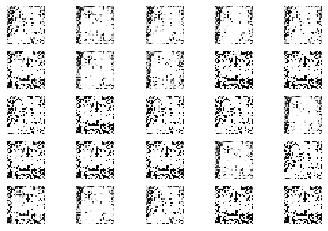

1501 [D loss: 0.024091, acc.: 100.00%] [G loss: 3.360064]
1502 [D loss: 0.021337, acc.: 100.00%] [G loss: 3.465248]
1503 [D loss: 0.020652, acc.: 100.00%] [G loss: 3.480675]
1504 [D loss: 0.021695, acc.: 100.00%] [G loss: 3.458688]
1505 [D loss: 0.018419, acc.: 100.00%] [G loss: 3.505133]
1506 [D loss: 0.018344, acc.: 100.00%] [G loss: 3.462573]
1507 [D loss: 0.022008, acc.: 100.00%] [G loss: 3.516861]
1508 [D loss: 0.021281, acc.: 100.00%] [G loss: 3.486198]
1509 [D loss: 0.020346, acc.: 100.00%] [G loss: 3.600184]
1510 [D loss: 0.015201, acc.: 100.00%] [G loss: 3.662285]
1511 [D loss: 0.015887, acc.: 100.00%] [G loss: 3.701736]
1512 [D loss: 0.015216, acc.: 100.00%] [G loss: 3.748207]
1513 [D loss: 0.017166, acc.: 100.00%] [G loss: 3.773841]
1514 [D loss: 0.012979, acc.: 100.00%] [G loss: 3.820174]
1515 [D loss: 0.013225, acc.: 100.00%] [G loss: 3.840135]
1516 [D loss: 0.013143, acc.: 100.00%] [G loss: 3.935623]
1517 [D loss: 0.014150, acc.: 100.00%] [G loss: 4.087208]
1518 [D loss: 

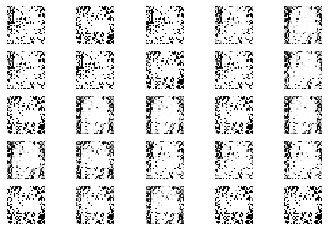

1551 [D loss: 0.011413, acc.: 100.00%] [G loss: 3.874300]
1552 [D loss: 0.011095, acc.: 100.00%] [G loss: 3.971428]
1553 [D loss: 0.265212, acc.: 98.44%] [G loss: 3.862816]
1554 [D loss: 0.014256, acc.: 100.00%] [G loss: 3.945272]
1555 [D loss: 0.013666, acc.: 100.00%] [G loss: 4.128357]
1556 [D loss: 0.008295, acc.: 100.00%] [G loss: 4.031005]
1557 [D loss: 0.009722, acc.: 100.00%] [G loss: 4.190181]
1558 [D loss: 0.010606, acc.: 100.00%] [G loss: 3.993963]
1559 [D loss: 0.018496, acc.: 100.00%] [G loss: 3.441924]
1560 [D loss: 0.020530, acc.: 100.00%] [G loss: 3.410614]
1561 [D loss: 0.020174, acc.: 100.00%] [G loss: 3.361769]
1562 [D loss: 0.020493, acc.: 100.00%] [G loss: 3.568569]
1563 [D loss: 0.021302, acc.: 100.00%] [G loss: 3.788914]
1564 [D loss: 0.016871, acc.: 100.00%] [G loss: 3.887051]
1565 [D loss: 0.263949, acc.: 98.44%] [G loss: 3.882133]
1566 [D loss: 0.009891, acc.: 100.00%] [G loss: 4.271818]
1567 [D loss: 0.009369, acc.: 100.00%] [G loss: 4.230411]
1568 [D loss: 0.

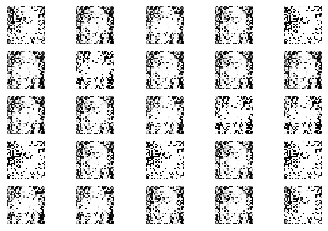

1601 [D loss: 0.010660, acc.: 100.00%] [G loss: 4.104346]
1602 [D loss: 0.009350, acc.: 100.00%] [G loss: 4.199695]
1603 [D loss: 0.008402, acc.: 100.00%] [G loss: 4.306341]
1604 [D loss: 0.009100, acc.: 100.00%] [G loss: 4.062741]
1605 [D loss: 0.009295, acc.: 100.00%] [G loss: 4.031986]
1606 [D loss: 0.010189, acc.: 100.00%] [G loss: 4.247018]
1607 [D loss: 0.010786, acc.: 100.00%] [G loss: 4.182764]
1608 [D loss: 0.008536, acc.: 100.00%] [G loss: 4.131711]
1609 [D loss: 0.261321, acc.: 98.44%] [G loss: 4.095095]
1610 [D loss: 0.009476, acc.: 100.00%] [G loss: 4.243169]
1611 [D loss: 0.009218, acc.: 100.00%] [G loss: 4.487967]
1612 [D loss: 0.010201, acc.: 100.00%] [G loss: 4.262988]
1613 [D loss: 0.010111, acc.: 100.00%] [G loss: 4.505198]
1614 [D loss: 0.008489, acc.: 100.00%] [G loss: 4.558275]
1615 [D loss: 1.091809, acc.: 46.88%] [G loss: 0.243512]
1616 [D loss: 1.074349, acc.: 50.00%] [G loss: 1.124316]
1617 [D loss: 0.253463, acc.: 85.94%] [G loss: 2.777544]
1618 [D loss: 0.05

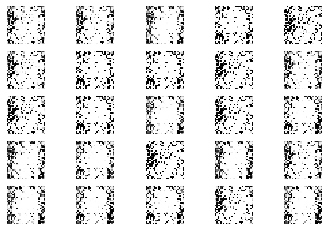

1651 [D loss: 0.014286, acc.: 100.00%] [G loss: 4.177696]
1652 [D loss: 0.015640, acc.: 100.00%] [G loss: 4.157463]
1653 [D loss: 0.011360, acc.: 100.00%] [G loss: 4.294269]
1654 [D loss: 0.008994, acc.: 100.00%] [G loss: 4.131633]
1655 [D loss: 0.012888, acc.: 100.00%] [G loss: 4.239953]
1656 [D loss: 0.011626, acc.: 100.00%] [G loss: 4.063558]
1657 [D loss: 0.013545, acc.: 100.00%] [G loss: 4.175961]
1658 [D loss: 0.013249, acc.: 100.00%] [G loss: 4.207054]
1659 [D loss: 0.010972, acc.: 100.00%] [G loss: 4.338746]
1660 [D loss: 0.007940, acc.: 100.00%] [G loss: 4.366752]
1661 [D loss: 0.009060, acc.: 100.00%] [G loss: 4.476954]
1662 [D loss: 0.008696, acc.: 100.00%] [G loss: 4.335943]
1663 [D loss: 0.008539, acc.: 100.00%] [G loss: 4.461339]
1664 [D loss: 0.261370, acc.: 98.44%] [G loss: 4.171784]
1665 [D loss: 0.012450, acc.: 100.00%] [G loss: 4.267111]
1666 [D loss: 0.950402, acc.: 54.69%] [G loss: 0.597186]
1667 [D loss: 0.359943, acc.: 71.88%] [G loss: 2.375286]
1668 [D loss: 0.0

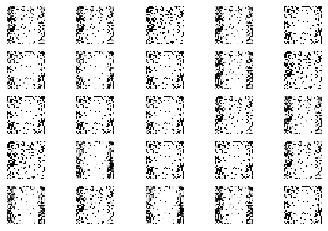

1701 [D loss: 0.007880, acc.: 100.00%] [G loss: 4.304937]
1702 [D loss: 0.009246, acc.: 100.00%] [G loss: 4.433455]
1703 [D loss: 0.010156, acc.: 100.00%] [G loss: 4.416827]
1704 [D loss: 0.007131, acc.: 100.00%] [G loss: 4.463465]
1705 [D loss: 0.007128, acc.: 100.00%] [G loss: 4.448602]
1706 [D loss: 0.007522, acc.: 100.00%] [G loss: 4.583316]
1707 [D loss: 0.007741, acc.: 100.00%] [G loss: 4.413886]
1708 [D loss: 0.008911, acc.: 100.00%] [G loss: 4.506794]
1709 [D loss: 0.009485, acc.: 100.00%] [G loss: 4.463167]
1710 [D loss: 0.009306, acc.: 100.00%] [G loss: 4.432029]
1711 [D loss: 0.007072, acc.: 100.00%] [G loss: 4.409294]
1712 [D loss: 0.006695, acc.: 100.00%] [G loss: 4.579353]
1713 [D loss: 0.005171, acc.: 100.00%] [G loss: 4.518153]
1714 [D loss: 0.006937, acc.: 100.00%] [G loss: 4.476070]
1715 [D loss: 0.005402, acc.: 100.00%] [G loss: 4.687113]
1716 [D loss: 0.005610, acc.: 100.00%] [G loss: 4.673730]
1717 [D loss: 0.070545, acc.: 98.44%] [G loss: 2.341774]
1718 [D loss: 0

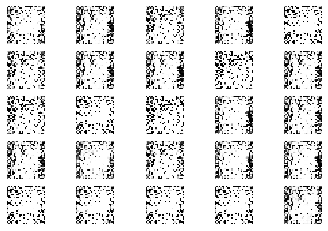

1751 [D loss: 0.006456, acc.: 100.00%] [G loss: 4.705443]
1752 [D loss: 0.007100, acc.: 100.00%] [G loss: 4.891071]
1753 [D loss: 0.005844, acc.: 100.00%] [G loss: 4.718968]
1754 [D loss: 0.005948, acc.: 100.00%] [G loss: 4.585896]
1755 [D loss: 0.006814, acc.: 100.00%] [G loss: 4.671545]
1756 [D loss: 0.006432, acc.: 100.00%] [G loss: 4.759161]
1757 [D loss: 0.003964, acc.: 100.00%] [G loss: 4.835979]
1758 [D loss: 0.007059, acc.: 100.00%] [G loss: 4.598238]
1759 [D loss: 0.005596, acc.: 100.00%] [G loss: 4.679520]
1760 [D loss: 0.005847, acc.: 100.00%] [G loss: 4.692798]
1761 [D loss: 0.006052, acc.: 100.00%] [G loss: 4.905084]
1762 [D loss: 0.005181, acc.: 100.00%] [G loss: 4.853337]
1763 [D loss: 0.559334, acc.: 67.19%] [G loss: 0.368205]
1764 [D loss: 0.751657, acc.: 50.00%] [G loss: 1.038490]
1765 [D loss: 0.085658, acc.: 100.00%] [G loss: 2.823095]
1766 [D loss: 0.029489, acc.: 100.00%] [G loss: 3.481107]
1767 [D loss: 0.021581, acc.: 100.00%] [G loss: 3.518667]
1768 [D loss: 0.

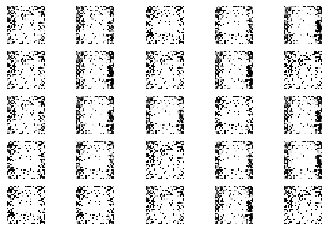

1801 [D loss: 0.008833, acc.: 100.00%] [G loss: 4.251502]
1802 [D loss: 0.007509, acc.: 100.00%] [G loss: 4.388498]
1803 [D loss: 0.008409, acc.: 100.00%] [G loss: 4.248574]
1804 [D loss: 0.008411, acc.: 100.00%] [G loss: 4.338873]
1805 [D loss: 0.006446, acc.: 100.00%] [G loss: 4.312622]
1806 [D loss: 0.008894, acc.: 100.00%] [G loss: 4.238630]
1807 [D loss: 0.008909, acc.: 100.00%] [G loss: 4.398342]
1808 [D loss: 0.008809, acc.: 100.00%] [G loss: 4.407933]
1809 [D loss: 0.009134, acc.: 100.00%] [G loss: 4.503786]
1810 [D loss: 0.008214, acc.: 100.00%] [G loss: 4.463639]
1811 [D loss: 0.006435, acc.: 100.00%] [G loss: 4.374059]
1812 [D loss: 0.007246, acc.: 100.00%] [G loss: 4.460579]
1813 [D loss: 0.009367, acc.: 100.00%] [G loss: 4.489032]
1814 [D loss: 0.007741, acc.: 100.00%] [G loss: 4.569840]
1815 [D loss: 0.007182, acc.: 100.00%] [G loss: 4.509933]
1816 [D loss: 0.006604, acc.: 100.00%] [G loss: 4.727018]
1817 [D loss: 0.006756, acc.: 100.00%] [G loss: 4.657193]
1818 [D loss: 

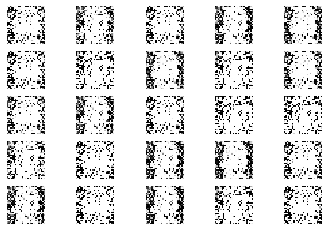

1851 [D loss: 0.003178, acc.: 100.00%] [G loss: 5.188074]
1852 [D loss: 0.256363, acc.: 98.44%] [G loss: 5.250714]
1853 [D loss: 0.467451, acc.: 82.81%] [G loss: 0.752452]
1854 [D loss: 0.647817, acc.: 70.31%] [G loss: 1.472553]
1855 [D loss: 0.108854, acc.: 98.44%] [G loss: 2.814179]
1856 [D loss: 0.033743, acc.: 100.00%] [G loss: 3.343670]
1857 [D loss: 0.026219, acc.: 100.00%] [G loss: 3.317612]
1858 [D loss: 0.026566, acc.: 100.00%] [G loss: 3.257669]
1859 [D loss: 0.027155, acc.: 100.00%] [G loss: 3.224698]
1860 [D loss: 0.027917, acc.: 100.00%] [G loss: 3.279634]
1861 [D loss: 0.030049, acc.: 100.00%] [G loss: 3.250597]
1862 [D loss: 0.031984, acc.: 100.00%] [G loss: 3.115781]
1863 [D loss: 0.035361, acc.: 100.00%] [G loss: 3.182967]
1864 [D loss: 0.028535, acc.: 100.00%] [G loss: 3.429529]
1865 [D loss: 0.025297, acc.: 100.00%] [G loss: 3.415859]
1866 [D loss: 0.025280, acc.: 100.00%] [G loss: 3.364813]
1867 [D loss: 0.023905, acc.: 100.00%] [G loss: 3.369903]
1868 [D loss: 0.02

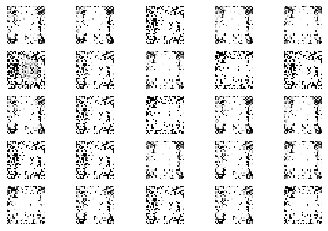

1901 [D loss: 0.018373, acc.: 100.00%] [G loss: 3.510487]
1902 [D loss: 0.020360, acc.: 100.00%] [G loss: 3.565192]
1903 [D loss: 0.017586, acc.: 100.00%] [G loss: 3.532413]
1904 [D loss: 0.017880, acc.: 100.00%] [G loss: 3.587209]
1905 [D loss: 0.017482, acc.: 100.00%] [G loss: 3.652574]
1906 [D loss: 0.016268, acc.: 100.00%] [G loss: 3.654644]
1907 [D loss: 0.015798, acc.: 100.00%] [G loss: 3.715779]
1908 [D loss: 0.014771, acc.: 100.00%] [G loss: 3.672313]
1909 [D loss: 0.015066, acc.: 100.00%] [G loss: 3.770110]
1910 [D loss: 0.014261, acc.: 100.00%] [G loss: 3.742513]
1911 [D loss: 0.014825, acc.: 100.00%] [G loss: 3.710113]
1912 [D loss: 0.015276, acc.: 100.00%] [G loss: 3.725739]
1913 [D loss: 0.014036, acc.: 100.00%] [G loss: 3.750032]
1914 [D loss: 0.013319, acc.: 100.00%] [G loss: 3.967070]
1915 [D loss: 0.013268, acc.: 100.00%] [G loss: 3.924454]
1916 [D loss: 0.012149, acc.: 100.00%] [G loss: 3.986717]
1917 [D loss: 0.012151, acc.: 100.00%] [G loss: 3.810768]
1918 [D loss: 

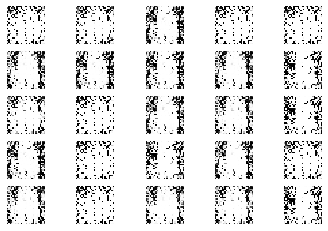

1951 [D loss: 0.014526, acc.: 100.00%] [G loss: 3.816742]
1952 [D loss: 0.014478, acc.: 100.00%] [G loss: 3.794363]
1953 [D loss: 0.024002, acc.: 100.00%] [G loss: 3.780302]
1954 [D loss: 0.029965, acc.: 100.00%] [G loss: 3.985415]
1955 [D loss: 0.014974, acc.: 100.00%] [G loss: 4.099629]
1956 [D loss: 0.017673, acc.: 100.00%] [G loss: 4.271576]
1957 [D loss: 0.021495, acc.: 100.00%] [G loss: 4.304679]
1958 [D loss: 0.012458, acc.: 100.00%] [G loss: 4.132096]
1959 [D loss: 0.020620, acc.: 100.00%] [G loss: 4.317843]
1960 [D loss: 0.018000, acc.: 100.00%] [G loss: 4.688828]
1961 [D loss: 2.561502, acc.: 48.44%] [G loss: 0.071419]
1962 [D loss: 3.480657, acc.: 50.00%] [G loss: 0.400059]
1963 [D loss: 1.208622, acc.: 68.75%] [G loss: 1.930138]
1964 [D loss: 0.451139, acc.: 78.12%] [G loss: 3.008986]
1965 [D loss: 0.039903, acc.: 100.00%] [G loss: 3.710414]
1966 [D loss: 0.034077, acc.: 100.00%] [G loss: 3.620682]
1967 [D loss: 0.043734, acc.: 100.00%] [G loss: 3.508969]
1968 [D loss: 0.04

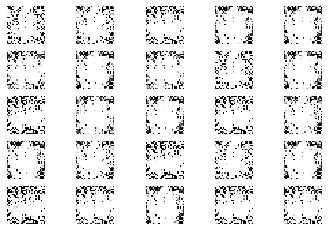

2001 [D loss: 0.012296, acc.: 100.00%] [G loss: 4.105604]
2002 [D loss: 0.013766, acc.: 100.00%] [G loss: 4.036282]
2003 [D loss: 0.014333, acc.: 100.00%] [G loss: 3.726093]
2004 [D loss: 0.017161, acc.: 100.00%] [G loss: 3.524716]
2005 [D loss: 0.021316, acc.: 100.00%] [G loss: 3.512077]
2006 [D loss: 0.024270, acc.: 100.00%] [G loss: 3.402125]
2007 [D loss: 0.026031, acc.: 100.00%] [G loss: 3.445573]
2008 [D loss: 0.025029, acc.: 100.00%] [G loss: 3.571662]
2009 [D loss: 0.025694, acc.: 100.00%] [G loss: 3.402421]
2010 [D loss: 0.022360, acc.: 100.00%] [G loss: 3.429526]
2011 [D loss: 0.025292, acc.: 100.00%] [G loss: 3.407582]
2012 [D loss: 0.022000, acc.: 100.00%] [G loss: 3.553558]
2013 [D loss: 0.021036, acc.: 100.00%] [G loss: 3.402550]
2014 [D loss: 0.020336, acc.: 100.00%] [G loss: 3.622879]
2015 [D loss: 0.020883, acc.: 100.00%] [G loss: 3.765892]
2016 [D loss: 0.018404, acc.: 100.00%] [G loss: 3.570780]
2017 [D loss: 0.019242, acc.: 100.00%] [G loss: 3.453461]
2018 [D loss: 

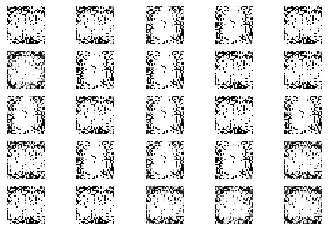

2051 [D loss: 0.015489, acc.: 100.00%] [G loss: 3.719094]
2052 [D loss: 0.016324, acc.: 100.00%] [G loss: 3.702372]
2053 [D loss: 0.015498, acc.: 100.00%] [G loss: 3.724794]
2054 [D loss: 0.016681, acc.: 100.00%] [G loss: 3.757707]
2055 [D loss: 0.016230, acc.: 100.00%] [G loss: 3.603233]
2056 [D loss: 0.015522, acc.: 100.00%] [G loss: 3.780949]
2057 [D loss: 0.014883, acc.: 100.00%] [G loss: 3.680618]
2058 [D loss: 0.013569, acc.: 100.00%] [G loss: 3.680169]
2059 [D loss: 0.016036, acc.: 100.00%] [G loss: 3.817196]
2060 [D loss: 0.013829, acc.: 100.00%] [G loss: 3.650425]
2061 [D loss: 0.016065, acc.: 100.00%] [G loss: 3.881832]
2062 [D loss: 0.014648, acc.: 100.00%] [G loss: 3.893618]
2063 [D loss: 0.013795, acc.: 100.00%] [G loss: 3.915493]
2064 [D loss: 0.012223, acc.: 100.00%] [G loss: 3.972898]
2065 [D loss: 0.015237, acc.: 100.00%] [G loss: 4.011620]
2066 [D loss: 0.015995, acc.: 100.00%] [G loss: 4.084906]
2067 [D loss: 0.022213, acc.: 100.00%] [G loss: 4.256069]
2068 [D loss: 

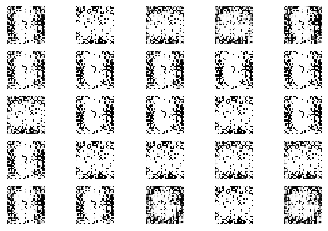

2101 [D loss: 0.053985, acc.: 100.00%] [G loss: 4.265836]
2102 [D loss: 0.021427, acc.: 100.00%] [G loss: 3.830264]
2103 [D loss: 0.014786, acc.: 100.00%] [G loss: 4.299967]
2104 [D loss: 0.017507, acc.: 100.00%] [G loss: 3.595092]
2105 [D loss: 0.022444, acc.: 100.00%] [G loss: 3.672248]
2106 [D loss: 0.025037, acc.: 100.00%] [G loss: 3.455569]
2107 [D loss: 0.030078, acc.: 100.00%] [G loss: 3.371732]
2108 [D loss: 0.028777, acc.: 100.00%] [G loss: 3.103108]
2109 [D loss: 0.030097, acc.: 100.00%] [G loss: 3.441376]
2110 [D loss: 0.027083, acc.: 100.00%] [G loss: 3.364138]
2111 [D loss: 0.026358, acc.: 100.00%] [G loss: 3.082664]
2112 [D loss: 0.026547, acc.: 100.00%] [G loss: 3.432987]
2113 [D loss: 0.024334, acc.: 100.00%] [G loss: 3.408895]
2114 [D loss: 0.020558, acc.: 100.00%] [G loss: 3.281387]
2115 [D loss: 0.020579, acc.: 100.00%] [G loss: 3.533705]
2116 [D loss: 0.022428, acc.: 100.00%] [G loss: 3.538692]
2117 [D loss: 0.020279, acc.: 100.00%] [G loss: 3.591344]
2118 [D loss: 

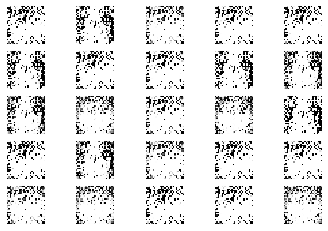

2151 [D loss: 0.009077, acc.: 100.00%] [G loss: 4.322917]
2152 [D loss: 0.007810, acc.: 100.00%] [G loss: 4.293067]
2153 [D loss: 0.007622, acc.: 100.00%] [G loss: 4.321363]
2154 [D loss: 0.008197, acc.: 100.00%] [G loss: 4.615739]
2155 [D loss: 0.008580, acc.: 100.00%] [G loss: 4.507771]
2156 [D loss: 0.007777, acc.: 100.00%] [G loss: 4.317823]
2157 [D loss: 0.008662, acc.: 100.00%] [G loss: 4.310560]
2158 [D loss: 0.009128, acc.: 100.00%] [G loss: 4.343600]
2159 [D loss: 0.008906, acc.: 100.00%] [G loss: 4.441853]
2160 [D loss: 0.008307, acc.: 100.00%] [G loss: 4.512289]
2161 [D loss: 0.007484, acc.: 100.00%] [G loss: 4.430573]
2162 [D loss: 0.008570, acc.: 100.00%] [G loss: 4.391255]
2163 [D loss: 0.007805, acc.: 100.00%] [G loss: 4.555138]
2164 [D loss: 0.007820, acc.: 100.00%] [G loss: 4.440367]
2165 [D loss: 0.007248, acc.: 100.00%] [G loss: 4.481635]
2166 [D loss: 0.008252, acc.: 100.00%] [G loss: 4.505683]
2167 [D loss: 0.008271, acc.: 100.00%] [G loss: 4.558452]
2168 [D loss: 

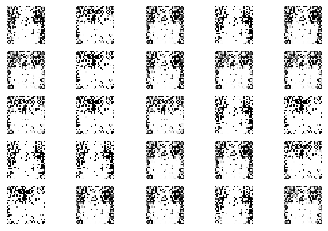

2201 [D loss: 0.011091, acc.: 100.00%] [G loss: 4.087927]
2202 [D loss: 0.011269, acc.: 100.00%] [G loss: 4.189116]
2203 [D loss: 0.011432, acc.: 100.00%] [G loss: 3.964131]
2204 [D loss: 0.011010, acc.: 100.00%] [G loss: 4.165982]
2205 [D loss: 0.010759, acc.: 100.00%] [G loss: 4.009301]
2206 [D loss: 0.012693, acc.: 100.00%] [G loss: 4.126693]
2207 [D loss: 0.011372, acc.: 100.00%] [G loss: 4.234870]
2208 [D loss: 0.010586, acc.: 100.00%] [G loss: 4.141823]
2209 [D loss: 0.010276, acc.: 100.00%] [G loss: 4.229181]
2210 [D loss: 0.011044, acc.: 100.00%] [G loss: 4.192616]
2211 [D loss: 0.009978, acc.: 100.00%] [G loss: 4.215993]
2212 [D loss: 0.010168, acc.: 100.00%] [G loss: 4.486583]
2213 [D loss: 0.008688, acc.: 100.00%] [G loss: 4.381185]
2214 [D loss: 0.009050, acc.: 100.00%] [G loss: 4.339896]
2215 [D loss: 0.007958, acc.: 100.00%] [G loss: 4.431417]
2216 [D loss: 0.008675, acc.: 100.00%] [G loss: 4.343698]
2217 [D loss: 0.007844, acc.: 100.00%] [G loss: 4.576643]
2218 [D loss: 

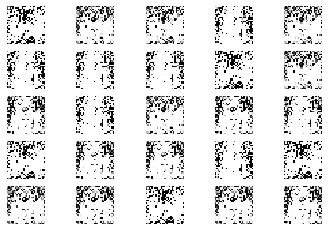

2251 [D loss: 0.005629, acc.: 100.00%] [G loss: 4.893407]
2252 [D loss: 0.003982, acc.: 100.00%] [G loss: 5.025991]
2253 [D loss: 0.003716, acc.: 100.00%] [G loss: 4.965033]
2254 [D loss: 0.003893, acc.: 100.00%] [G loss: 5.182034]
2255 [D loss: 0.004174, acc.: 100.00%] [G loss: 4.944717]
2256 [D loss: 0.003159, acc.: 100.00%] [G loss: 5.116746]
2257 [D loss: 0.003510, acc.: 100.00%] [G loss: 5.156256]
2258 [D loss: 0.003829, acc.: 100.00%] [G loss: 5.070218]
2259 [D loss: 0.003421, acc.: 100.00%] [G loss: 5.087610]
2260 [D loss: 0.003379, acc.: 100.00%] [G loss: 5.134743]
2261 [D loss: 0.003099, acc.: 100.00%] [G loss: 5.213289]
2262 [D loss: 0.003422, acc.: 100.00%] [G loss: 5.248348]
2263 [D loss: 0.003039, acc.: 100.00%] [G loss: 5.176663]
2264 [D loss: 0.003435, acc.: 100.00%] [G loss: 5.390354]
2265 [D loss: 0.003149, acc.: 100.00%] [G loss: 5.242837]
2266 [D loss: 0.003044, acc.: 100.00%] [G loss: 5.231769]
2267 [D loss: 0.002988, acc.: 100.00%] [G loss: 5.358256]
2268 [D loss: 

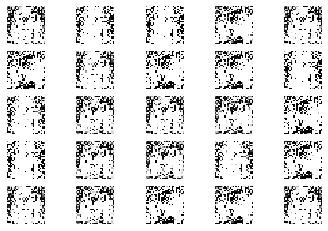

2301 [D loss: 0.019766, acc.: 100.00%] [G loss: 3.739434]
2302 [D loss: 0.024310, acc.: 100.00%] [G loss: 3.698988]
2303 [D loss: 0.024386, acc.: 100.00%] [G loss: 3.666841]
2304 [D loss: 0.022328, acc.: 100.00%] [G loss: 3.608485]
2305 [D loss: 0.021011, acc.: 100.00%] [G loss: 3.703279]
2306 [D loss: 0.017829, acc.: 100.00%] [G loss: 3.684015]
2307 [D loss: 0.018134, acc.: 100.00%] [G loss: 3.588894]
2308 [D loss: 0.019243, acc.: 100.00%] [G loss: 3.521761]
2309 [D loss: 0.020396, acc.: 100.00%] [G loss: 3.735511]
2310 [D loss: 0.014233, acc.: 100.00%] [G loss: 3.629452]
2311 [D loss: 0.018038, acc.: 100.00%] [G loss: 3.661470]
2312 [D loss: 0.023084, acc.: 100.00%] [G loss: 3.866547]
2313 [D loss: 0.013747, acc.: 100.00%] [G loss: 3.685435]
2314 [D loss: 0.014177, acc.: 100.00%] [G loss: 3.814073]
2315 [D loss: 0.015380, acc.: 100.00%] [G loss: 3.819454]
2316 [D loss: 0.264451, acc.: 98.44%] [G loss: 3.921201]
2317 [D loss: 0.018521, acc.: 100.00%] [G loss: 3.953597]
2318 [D loss: 0

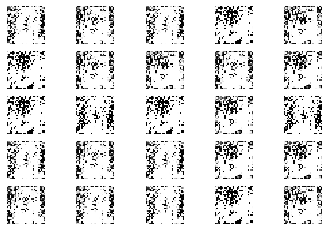

2351 [D loss: 0.066712, acc.: 100.00%] [G loss: 2.719848]
2352 [D loss: 0.035715, acc.: 100.00%] [G loss: 3.245473]
2353 [D loss: 0.022361, acc.: 100.00%] [G loss: 3.752077]
2354 [D loss: 0.014680, acc.: 100.00%] [G loss: 3.871160]
2355 [D loss: 0.012891, acc.: 100.00%] [G loss: 3.840813]
2356 [D loss: 0.011737, acc.: 100.00%] [G loss: 3.994840]
2357 [D loss: 0.012221, acc.: 100.00%] [G loss: 4.067077]
2358 [D loss: 0.010942, acc.: 100.00%] [G loss: 4.180307]
2359 [D loss: 0.011502, acc.: 100.00%] [G loss: 4.026733]
2360 [D loss: 0.011149, acc.: 100.00%] [G loss: 3.893247]
2361 [D loss: 0.010752, acc.: 100.00%] [G loss: 3.935350]
2362 [D loss: 0.011228, acc.: 100.00%] [G loss: 3.932343]
2363 [D loss: 0.014228, acc.: 100.00%] [G loss: 3.989902]
2364 [D loss: 0.011303, acc.: 100.00%] [G loss: 4.023593]
2365 [D loss: 0.011460, acc.: 100.00%] [G loss: 3.964850]
2366 [D loss: 0.011930, acc.: 100.00%] [G loss: 4.195746]
2367 [D loss: 0.010081, acc.: 100.00%] [G loss: 4.310331]
2368 [D loss: 

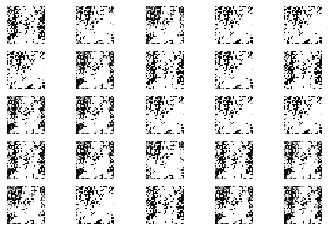

2401 [D loss: 0.012877, acc.: 100.00%] [G loss: 4.138444]
2402 [D loss: 0.013169, acc.: 100.00%] [G loss: 4.127580]
2403 [D loss: 0.011615, acc.: 100.00%] [G loss: 4.149370]
2404 [D loss: 0.012338, acc.: 100.00%] [G loss: 4.126067]
2405 [D loss: 0.011815, acc.: 100.00%] [G loss: 4.315811]
2406 [D loss: 0.009757, acc.: 100.00%] [G loss: 4.175481]
2407 [D loss: 0.011612, acc.: 100.00%] [G loss: 4.459467]
2408 [D loss: 0.010057, acc.: 100.00%] [G loss: 4.105871]
2409 [D loss: 0.010106, acc.: 100.00%] [G loss: 4.135072]
2410 [D loss: 0.015935, acc.: 100.00%] [G loss: 3.941866]
2411 [D loss: 0.010638, acc.: 100.00%] [G loss: 4.170907]
2412 [D loss: 0.010716, acc.: 100.00%] [G loss: 4.172360]
2413 [D loss: 0.011549, acc.: 100.00%] [G loss: 4.165151]
2414 [D loss: 0.009868, acc.: 100.00%] [G loss: 4.107724]
2415 [D loss: 0.009950, acc.: 100.00%] [G loss: 4.207344]
2416 [D loss: 0.009818, acc.: 100.00%] [G loss: 4.286614]
2417 [D loss: 0.011559, acc.: 100.00%] [G loss: 4.282004]
2418 [D loss: 

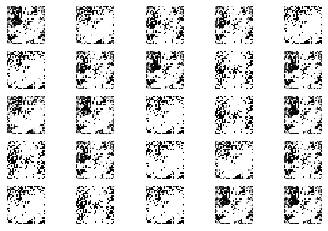

2451 [D loss: 0.015370, acc.: 100.00%] [G loss: 4.112801]
2452 [D loss: 0.015522, acc.: 100.00%] [G loss: 3.719313]
2453 [D loss: 0.020055, acc.: 100.00%] [G loss: 3.840618]
2454 [D loss: 0.017737, acc.: 100.00%] [G loss: 3.627974]
2455 [D loss: 0.017918, acc.: 100.00%] [G loss: 3.809130]
2456 [D loss: 0.016259, acc.: 100.00%] [G loss: 3.799193]
2457 [D loss: 0.017663, acc.: 100.00%] [G loss: 3.675399]
2458 [D loss: 0.015845, acc.: 100.00%] [G loss: 3.835845]
2459 [D loss: 0.018289, acc.: 100.00%] [G loss: 3.768955]
2460 [D loss: 0.018035, acc.: 100.00%] [G loss: 3.670101]
2461 [D loss: 0.018093, acc.: 100.00%] [G loss: 4.145002]
2462 [D loss: 0.018180, acc.: 100.00%] [G loss: 3.986451]
2463 [D loss: 0.012533, acc.: 100.00%] [G loss: 3.964381]
2464 [D loss: 0.013855, acc.: 100.00%] [G loss: 3.851195]
2465 [D loss: 0.013043, acc.: 100.00%] [G loss: 4.017746]
2466 [D loss: 0.016540, acc.: 100.00%] [G loss: 4.348283]
2467 [D loss: 0.012645, acc.: 100.00%] [G loss: 4.137019]
2468 [D loss: 

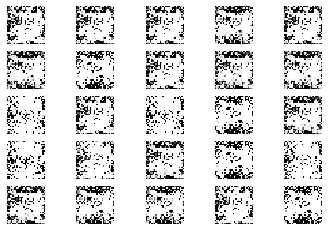

2501 [D loss: 0.126216, acc.: 98.44%] [G loss: 3.133972]
2502 [D loss: 0.035283, acc.: 100.00%] [G loss: 3.271131]
2503 [D loss: 0.023934, acc.: 100.00%] [G loss: 3.705498]
2504 [D loss: 0.015702, acc.: 100.00%] [G loss: 4.010863]
2505 [D loss: 0.012673, acc.: 100.00%] [G loss: 4.125818]
2506 [D loss: 0.009990, acc.: 100.00%] [G loss: 4.235585]
2507 [D loss: 0.008899, acc.: 100.00%] [G loss: 4.431643]
2508 [D loss: 0.010485, acc.: 100.00%] [G loss: 4.452534]
2509 [D loss: 0.009253, acc.: 100.00%] [G loss: 4.608553]
2510 [D loss: 0.007881, acc.: 100.00%] [G loss: 4.520705]
2511 [D loss: 0.009253, acc.: 100.00%] [G loss: 4.518278]
2512 [D loss: 0.005698, acc.: 100.00%] [G loss: 4.424814]
2513 [D loss: 0.008722, acc.: 100.00%] [G loss: 4.270312]
2514 [D loss: 0.009835, acc.: 100.00%] [G loss: 4.449328]
2515 [D loss: 0.008853, acc.: 100.00%] [G loss: 4.450347]
2516 [D loss: 0.009184, acc.: 100.00%] [G loss: 4.685963]
2517 [D loss: 0.258842, acc.: 98.44%] [G loss: 4.455956]
2518 [D loss: 0.

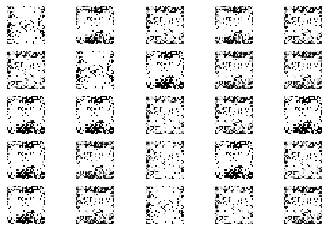

2551 [D loss: 0.022147, acc.: 100.00%] [G loss: 3.800021]
2552 [D loss: 0.016552, acc.: 100.00%] [G loss: 3.971287]
2553 [D loss: 0.017508, acc.: 100.00%] [G loss: 3.830762]
2554 [D loss: 0.016862, acc.: 100.00%] [G loss: 3.954718]
2555 [D loss: 0.014707, acc.: 100.00%] [G loss: 4.218216]
2556 [D loss: 0.017413, acc.: 100.00%] [G loss: 4.166418]
2557 [D loss: 0.016874, acc.: 100.00%] [G loss: 3.813709]
2558 [D loss: 0.017688, acc.: 100.00%] [G loss: 4.340407]
2559 [D loss: 0.014145, acc.: 100.00%] [G loss: 4.086530]
2560 [D loss: 0.015303, acc.: 100.00%] [G loss: 4.231832]
2561 [D loss: 0.012481, acc.: 100.00%] [G loss: 3.893708]
2562 [D loss: 0.013743, acc.: 100.00%] [G loss: 4.165090]
2563 [D loss: 0.012172, acc.: 100.00%] [G loss: 4.254712]
2564 [D loss: 0.011216, acc.: 100.00%] [G loss: 4.215083]
2565 [D loss: 0.009846, acc.: 100.00%] [G loss: 4.344642]
2566 [D loss: 0.010066, acc.: 100.00%] [G loss: 4.457091]
2567 [D loss: 0.009793, acc.: 100.00%] [G loss: 4.411589]
2568 [D loss: 

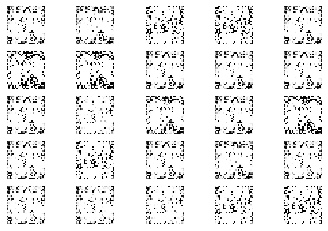

2601 [D loss: 0.006548, acc.: 100.00%] [G loss: 4.673679]
2602 [D loss: 0.005942, acc.: 100.00%] [G loss: 4.733779]
2603 [D loss: 0.005723, acc.: 100.00%] [G loss: 4.646027]
2604 [D loss: 0.005409, acc.: 100.00%] [G loss: 4.611296]
2605 [D loss: 0.005669, acc.: 100.00%] [G loss: 4.632975]
2606 [D loss: 0.005613, acc.: 100.00%] [G loss: 4.771517]
2607 [D loss: 0.004875, acc.: 100.00%] [G loss: 4.653766]
2608 [D loss: 0.005238, acc.: 100.00%] [G loss: 4.731127]
2609 [D loss: 0.005113, acc.: 100.00%] [G loss: 4.885365]
2610 [D loss: 0.004841, acc.: 100.00%] [G loss: 4.702916]
2611 [D loss: 0.004913, acc.: 100.00%] [G loss: 4.808932]
2612 [D loss: 0.004829, acc.: 100.00%] [G loss: 4.862980]
2613 [D loss: 0.004257, acc.: 100.00%] [G loss: 4.795973]
2614 [D loss: 0.004492, acc.: 100.00%] [G loss: 4.732800]
2615 [D loss: 0.005196, acc.: 100.00%] [G loss: 4.829344]
2616 [D loss: 0.004617, acc.: 100.00%] [G loss: 5.037092]
2617 [D loss: 0.004299, acc.: 100.00%] [G loss: 4.986417]
2618 [D loss: 

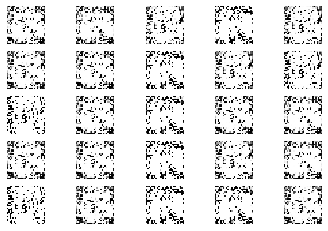

2651 [D loss: 0.005374, acc.: 100.00%] [G loss: 4.784611]
2652 [D loss: 0.004696, acc.: 100.00%] [G loss: 4.799266]
2653 [D loss: 0.005967, acc.: 100.00%] [G loss: 4.813480]
2654 [D loss: 0.005364, acc.: 100.00%] [G loss: 5.023047]
2655 [D loss: 0.005133, acc.: 100.00%] [G loss: 4.825437]
2656 [D loss: 0.003880, acc.: 100.00%] [G loss: 4.762455]
2657 [D loss: 0.005640, acc.: 100.00%] [G loss: 4.889590]
2658 [D loss: 0.007223, acc.: 100.00%] [G loss: 4.919418]
2659 [D loss: 0.005809, acc.: 100.00%] [G loss: 4.975262]
2660 [D loss: 0.005445, acc.: 100.00%] [G loss: 5.012990]
2661 [D loss: 0.005611, acc.: 100.00%] [G loss: 4.865662]
2662 [D loss: 0.004721, acc.: 100.00%] [G loss: 5.034356]
2663 [D loss: 0.006270, acc.: 100.00%] [G loss: 4.963147]
2664 [D loss: 0.005653, acc.: 100.00%] [G loss: 4.915937]
2665 [D loss: 0.006764, acc.: 100.00%] [G loss: 4.983229]
2666 [D loss: 0.006219, acc.: 100.00%] [G loss: 5.168068]
2667 [D loss: 0.005778, acc.: 100.00%] [G loss: 5.226756]
2668 [D loss: 

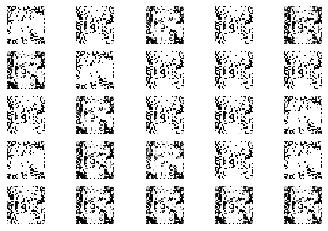

2701 [D loss: 0.005804, acc.: 100.00%] [G loss: 5.250411]
2702 [D loss: 0.008243, acc.: 100.00%] [G loss: 5.475379]
2703 [D loss: 0.003965, acc.: 100.00%] [G loss: 5.389673]
2704 [D loss: 0.007973, acc.: 100.00%] [G loss: 5.270226]
2705 [D loss: 0.004406, acc.: 100.00%] [G loss: 5.545918]
2706 [D loss: 0.005395, acc.: 100.00%] [G loss: 5.880118]
2707 [D loss: 0.008001, acc.: 100.00%] [G loss: 5.592494]
2708 [D loss: 0.007572, acc.: 100.00%] [G loss: 5.603474]
2709 [D loss: 0.003242, acc.: 100.00%] [G loss: 5.991003]
2710 [D loss: 0.004309, acc.: 100.00%] [G loss: 5.439868]
2711 [D loss: 0.003533, acc.: 100.00%] [G loss: 5.698587]
2712 [D loss: 0.005057, acc.: 100.00%] [G loss: 5.675448]
2713 [D loss: 0.003508, acc.: 100.00%] [G loss: 5.757236]
2714 [D loss: 0.003222, acc.: 100.00%] [G loss: 5.588464]
2715 [D loss: 0.005034, acc.: 100.00%] [G loss: 5.482244]
2716 [D loss: 0.003539, acc.: 100.00%] [G loss: 5.858926]
2717 [D loss: 0.007313, acc.: 100.00%] [G loss: 5.776070]
2718 [D loss: 

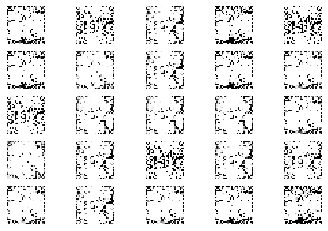

2751 [D loss: 0.013976, acc.: 100.00%] [G loss: 4.045767]
2752 [D loss: 0.011456, acc.: 100.00%] [G loss: 4.418666]
2753 [D loss: 0.016353, acc.: 100.00%] [G loss: 4.417577]
2754 [D loss: 0.014271, acc.: 100.00%] [G loss: 4.348125]
2755 [D loss: 0.014562, acc.: 100.00%] [G loss: 4.621065]
2756 [D loss: 0.008119, acc.: 100.00%] [G loss: 4.569239]
2757 [D loss: 0.011644, acc.: 100.00%] [G loss: 4.491254]
2758 [D loss: 0.011907, acc.: 100.00%] [G loss: 4.664929]
2759 [D loss: 0.010378, acc.: 100.00%] [G loss: 4.539873]
2760 [D loss: 0.010647, acc.: 100.00%] [G loss: 4.549503]
2761 [D loss: 0.009217, acc.: 100.00%] [G loss: 4.389256]
2762 [D loss: 0.009226, acc.: 100.00%] [G loss: 4.467810]
2763 [D loss: 0.008050, acc.: 100.00%] [G loss: 4.373521]
2764 [D loss: 0.008637, acc.: 100.00%] [G loss: 4.627131]
2765 [D loss: 0.007859, acc.: 100.00%] [G loss: 4.517611]
2766 [D loss: 0.007743, acc.: 100.00%] [G loss: 4.649659]
2767 [D loss: 0.007741, acc.: 100.00%] [G loss: 4.518808]
2768 [D loss: 

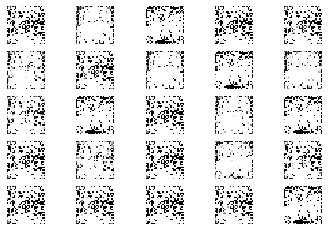

2801 [D loss: 0.014128, acc.: 100.00%] [G loss: 4.141852]
2802 [D loss: 0.013302, acc.: 100.00%] [G loss: 4.244025]
2803 [D loss: 0.011839, acc.: 100.00%] [G loss: 4.247698]
2804 [D loss: 0.008770, acc.: 100.00%] [G loss: 4.297515]
2805 [D loss: 0.011951, acc.: 100.00%] [G loss: 4.187820]
2806 [D loss: 0.011352, acc.: 100.00%] [G loss: 4.226015]
2807 [D loss: 0.011149, acc.: 100.00%] [G loss: 4.303822]
2808 [D loss: 0.009698, acc.: 100.00%] [G loss: 4.169686]
2809 [D loss: 0.013713, acc.: 100.00%] [G loss: 4.187557]
2810 [D loss: 0.012114, acc.: 100.00%] [G loss: 4.321660]
2811 [D loss: 0.011363, acc.: 100.00%] [G loss: 4.221083]
2812 [D loss: 0.010942, acc.: 100.00%] [G loss: 4.203195]
2813 [D loss: 0.010737, acc.: 100.00%] [G loss: 4.387612]
2814 [D loss: 0.009562, acc.: 100.00%] [G loss: 4.229695]
2815 [D loss: 0.008825, acc.: 100.00%] [G loss: 4.218443]
2816 [D loss: 0.010750, acc.: 100.00%] [G loss: 4.036140]
2817 [D loss: 0.011866, acc.: 100.00%] [G loss: 4.151163]
2818 [D loss: 

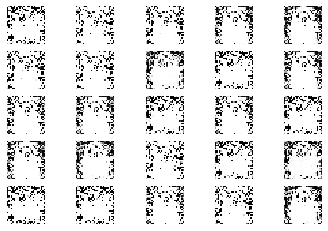

2851 [D loss: 0.051129, acc.: 98.44%] [G loss: 3.548015]
2852 [D loss: 0.065796, acc.: 96.88%] [G loss: 3.531884]
2853 [D loss: 0.040900, acc.: 100.00%] [G loss: 3.783270]
2854 [D loss: 0.037083, acc.: 100.00%] [G loss: 3.631311]
2855 [D loss: 0.041713, acc.: 100.00%] [G loss: 3.677284]
2856 [D loss: 0.042328, acc.: 100.00%] [G loss: 3.860288]
2857 [D loss: 0.040845, acc.: 100.00%] [G loss: 3.939040]
2858 [D loss: 0.032384, acc.: 100.00%] [G loss: 3.812845]
2859 [D loss: 0.036952, acc.: 100.00%] [G loss: 3.495535]
2860 [D loss: 0.051477, acc.: 100.00%] [G loss: 4.176415]
2861 [D loss: 0.028717, acc.: 100.00%] [G loss: 3.867663]
2862 [D loss: 0.023793, acc.: 100.00%] [G loss: 3.947457]
2863 [D loss: 0.032967, acc.: 100.00%] [G loss: 3.712859]
2864 [D loss: 0.040088, acc.: 100.00%] [G loss: 3.937810]
2865 [D loss: 0.031915, acc.: 100.00%] [G loss: 3.884416]
2866 [D loss: 0.026709, acc.: 100.00%] [G loss: 3.831131]
2867 [D loss: 0.028632, acc.: 100.00%] [G loss: 3.933810]
2868 [D loss: 0.

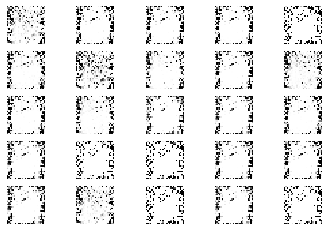

2901 [D loss: 1.598409, acc.: 76.56%] [G loss: 6.150037]
2902 [D loss: 0.677639, acc.: 84.38%] [G loss: 6.744434]
2903 [D loss: 0.056554, acc.: 96.88%] [G loss: 6.818918]
2904 [D loss: 0.246009, acc.: 87.50%] [G loss: 4.521788]
2905 [D loss: 0.518580, acc.: 87.50%] [G loss: 4.447624]
2906 [D loss: 0.308231, acc.: 87.50%] [G loss: 4.339200]
2907 [D loss: 0.904875, acc.: 87.50%] [G loss: 4.826900]
2908 [D loss: 1.361540, acc.: 92.19%] [G loss: 4.519771]
2909 [D loss: 3.059458, acc.: 56.25%] [G loss: 1.928898]
2910 [D loss: 0.306087, acc.: 85.94%] [G loss: 4.234324]
2911 [D loss: 0.040321, acc.: 98.44%] [G loss: 3.874283]
2912 [D loss: 0.407553, acc.: 90.62%] [G loss: 4.235937]
2913 [D loss: 0.743482, acc.: 87.50%] [G loss: 5.701227]
2914 [D loss: 1.037363, acc.: 93.75%] [G loss: 5.691398]
2915 [D loss: 2.003418, acc.: 75.00%] [G loss: 5.155284]
2916 [D loss: 7.303845, acc.: 34.38%] [G loss: 0.007367]
2917 [D loss: 4.939974, acc.: 50.00%] [G loss: 0.137092]
2918 [D loss: 2.405152, acc.: 5

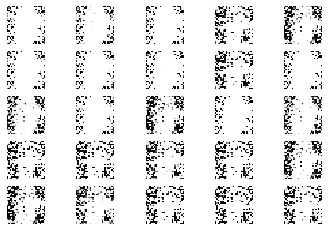

2951 [D loss: 0.037350, acc.: 100.00%] [G loss: 4.284893]
2952 [D loss: 0.030131, acc.: 100.00%] [G loss: 4.300806]
2953 [D loss: 0.024974, acc.: 100.00%] [G loss: 4.222382]
2954 [D loss: 0.051104, acc.: 100.00%] [G loss: 4.522788]
2955 [D loss: 0.021387, acc.: 100.00%] [G loss: 4.258327]
2956 [D loss: 0.021796, acc.: 100.00%] [G loss: 4.480535]
2957 [D loss: 0.022763, acc.: 100.00%] [G loss: 4.682085]
2958 [D loss: 0.036762, acc.: 100.00%] [G loss: 4.531601]
2959 [D loss: 0.018364, acc.: 100.00%] [G loss: 4.730327]
2960 [D loss: 0.024154, acc.: 100.00%] [G loss: 4.549212]
2961 [D loss: 0.022231, acc.: 100.00%] [G loss: 4.560390]
2962 [D loss: 0.019993, acc.: 100.00%] [G loss: 4.883771]
2963 [D loss: 0.024921, acc.: 100.00%] [G loss: 4.820942]
2964 [D loss: 0.015963, acc.: 100.00%] [G loss: 5.278257]
2965 [D loss: 0.015822, acc.: 100.00%] [G loss: 5.297976]
2966 [D loss: 0.012957, acc.: 100.00%] [G loss: 4.986099]
2967 [D loss: 0.013264, acc.: 100.00%] [G loss: 4.589144]
2968 [D loss: 

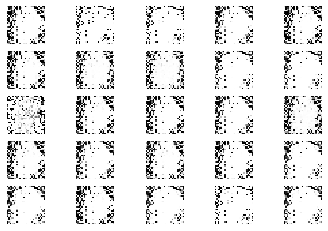

3001 [D loss: 0.037878, acc.: 100.00%] [G loss: 3.328981]
3002 [D loss: 0.031478, acc.: 100.00%] [G loss: 3.308538]
3003 [D loss: 0.034683, acc.: 100.00%] [G loss: 3.546022]
3004 [D loss: 0.035030, acc.: 100.00%] [G loss: 3.529578]
3005 [D loss: 0.025667, acc.: 100.00%] [G loss: 3.846561]
3006 [D loss: 0.032076, acc.: 100.00%] [G loss: 3.442562]
3007 [D loss: 0.026221, acc.: 100.00%] [G loss: 3.765273]
3008 [D loss: 0.028936, acc.: 100.00%] [G loss: 3.608138]
3009 [D loss: 0.028210, acc.: 100.00%] [G loss: 3.735808]
3010 [D loss: 0.029127, acc.: 100.00%] [G loss: 3.793909]
3011 [D loss: 0.021923, acc.: 100.00%] [G loss: 3.749996]
3012 [D loss: 0.018749, acc.: 100.00%] [G loss: 3.767862]
3013 [D loss: 0.020239, acc.: 100.00%] [G loss: 3.802033]
3014 [D loss: 0.018921, acc.: 100.00%] [G loss: 3.742295]
3015 [D loss: 0.035816, acc.: 100.00%] [G loss: 4.580308]
3016 [D loss: 0.025954, acc.: 100.00%] [G loss: 4.072745]
3017 [D loss: 0.017327, acc.: 100.00%] [G loss: 3.974246]
3018 [D loss: 

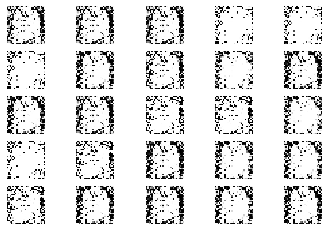

3051 [D loss: 0.010131, acc.: 100.00%] [G loss: 5.067855]
3052 [D loss: 0.008065, acc.: 100.00%] [G loss: 5.389206]
3053 [D loss: 0.006521, acc.: 100.00%] [G loss: 5.012515]
3054 [D loss: 0.012459, acc.: 100.00%] [G loss: 5.053592]
3055 [D loss: 0.006728, acc.: 100.00%] [G loss: 5.143496]
3056 [D loss: 0.012086, acc.: 100.00%] [G loss: 4.783260]
3057 [D loss: 0.260996, acc.: 98.44%] [G loss: 4.765544]
3058 [D loss: 0.011490, acc.: 100.00%] [G loss: 4.747075]
3059 [D loss: 0.009435, acc.: 100.00%] [G loss: 4.907105]
3060 [D loss: 0.006901, acc.: 100.00%] [G loss: 5.299006]
3061 [D loss: 0.009379, acc.: 100.00%] [G loss: 5.310653]
3062 [D loss: 0.009496, acc.: 100.00%] [G loss: 5.094918]
3063 [D loss: 0.006411, acc.: 100.00%] [G loss: 5.417756]
3064 [D loss: 0.007840, acc.: 100.00%] [G loss: 5.154339]
3065 [D loss: 0.008421, acc.: 100.00%] [G loss: 5.480656]
3066 [D loss: 0.007764, acc.: 100.00%] [G loss: 5.781176]
3067 [D loss: 0.007522, acc.: 100.00%] [G loss: 5.125845]
3068 [D loss: 0

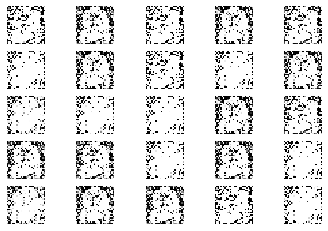

3101 [D loss: 0.010428, acc.: 100.00%] [G loss: 3.905900]
3102 [D loss: 0.010991, acc.: 100.00%] [G loss: 4.041247]
3103 [D loss: 0.010402, acc.: 100.00%] [G loss: 4.074139]
3104 [D loss: 0.011519, acc.: 100.00%] [G loss: 4.129059]
3105 [D loss: 0.009530, acc.: 100.00%] [G loss: 4.123873]
3106 [D loss: 0.010007, acc.: 100.00%] [G loss: 4.418164]
3107 [D loss: 0.008221, acc.: 100.00%] [G loss: 4.319693]
3108 [D loss: 0.008462, acc.: 100.00%] [G loss: 4.644709]
3109 [D loss: 0.007381, acc.: 100.00%] [G loss: 4.552740]
3110 [D loss: 0.007673, acc.: 100.00%] [G loss: 4.726373]
3111 [D loss: 0.006185, acc.: 100.00%] [G loss: 4.491267]
3112 [D loss: 0.006163, acc.: 100.00%] [G loss: 4.754262]
3113 [D loss: 0.006417, acc.: 100.00%] [G loss: 4.552518]
3114 [D loss: 0.007282, acc.: 100.00%] [G loss: 4.730615]
3115 [D loss: 0.006291, acc.: 100.00%] [G loss: 4.657031]
3116 [D loss: 0.007001, acc.: 100.00%] [G loss: 4.756502]
3117 [D loss: 0.005739, acc.: 100.00%] [G loss: 4.693855]
3118 [D loss: 

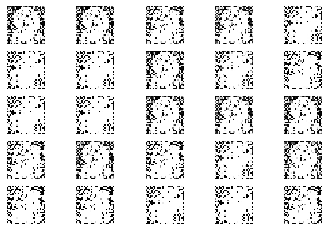

3151 [D loss: 0.004737, acc.: 100.00%] [G loss: 5.326707]
3152 [D loss: 0.004423, acc.: 100.00%] [G loss: 5.211994]
3153 [D loss: 0.003982, acc.: 100.00%] [G loss: 5.325540]
3154 [D loss: 0.067354, acc.: 98.44%] [G loss: 3.526691]
3155 [D loss: 0.032698, acc.: 100.00%] [G loss: 3.184374]
3156 [D loss: 0.024105, acc.: 100.00%] [G loss: 3.469940]
3157 [D loss: 0.019333, acc.: 100.00%] [G loss: 3.714442]
3158 [D loss: 0.015052, acc.: 100.00%] [G loss: 3.958812]
3159 [D loss: 0.011485, acc.: 100.00%] [G loss: 4.153107]
3160 [D loss: 0.010417, acc.: 100.00%] [G loss: 4.194352]
3161 [D loss: 0.009902, acc.: 100.00%] [G loss: 4.232112]
3162 [D loss: 0.008323, acc.: 100.00%] [G loss: 4.271699]
3163 [D loss: 0.008076, acc.: 100.00%] [G loss: 4.312366]
3164 [D loss: 0.006773, acc.: 100.00%] [G loss: 4.413692]
3165 [D loss: 0.006965, acc.: 100.00%] [G loss: 4.392371]
3166 [D loss: 0.006849, acc.: 100.00%] [G loss: 4.453649]
3167 [D loss: 0.007090, acc.: 100.00%] [G loss: 4.602659]
3168 [D loss: 0

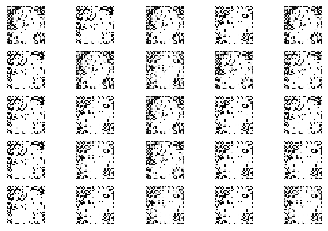

3201 [D loss: 0.004203, acc.: 100.00%] [G loss: 5.088464]
3202 [D loss: 0.003609, acc.: 100.00%] [G loss: 5.035508]
3203 [D loss: 0.003663, acc.: 100.00%] [G loss: 5.048545]
3204 [D loss: 0.003584, acc.: 100.00%] [G loss: 5.050242]
3205 [D loss: 0.004046, acc.: 100.00%] [G loss: 5.087482]
3206 [D loss: 0.004232, acc.: 100.00%] [G loss: 5.153505]
3207 [D loss: 0.003529, acc.: 100.00%] [G loss: 5.246855]
3208 [D loss: 0.003640, acc.: 100.00%] [G loss: 5.312609]
3209 [D loss: 0.003249, acc.: 100.00%] [G loss: 5.308546]
3210 [D loss: 0.003051, acc.: 100.00%] [G loss: 5.213648]
3211 [D loss: 0.003428, acc.: 100.00%] [G loss: 5.318810]
3212 [D loss: 0.003214, acc.: 100.00%] [G loss: 5.112737]
3213 [D loss: 0.003445, acc.: 100.00%] [G loss: 5.307175]
3214 [D loss: 0.003281, acc.: 100.00%] [G loss: 5.244146]
3215 [D loss: 0.003187, acc.: 100.00%] [G loss: 5.312239]
3216 [D loss: 0.003864, acc.: 100.00%] [G loss: 5.272434]
3217 [D loss: 0.002523, acc.: 100.00%] [G loss: 5.310782]
3218 [D loss: 

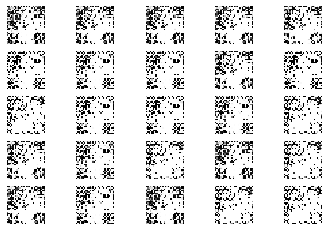

3251 [D loss: 0.002784, acc.: 100.00%] [G loss: 5.627737]
3252 [D loss: 0.002124, acc.: 100.00%] [G loss: 5.755706]
3253 [D loss: 0.002720, acc.: 100.00%] [G loss: 5.729147]
3254 [D loss: 0.003591, acc.: 100.00%] [G loss: 5.752674]
3255 [D loss: 0.002369, acc.: 100.00%] [G loss: 5.735859]
3256 [D loss: 0.002644, acc.: 100.00%] [G loss: 5.577790]
3257 [D loss: 0.003352, acc.: 100.00%] [G loss: 5.696325]
3258 [D loss: 0.254521, acc.: 98.44%] [G loss: 5.611660]
3259 [D loss: 0.003319, acc.: 100.00%] [G loss: 5.740274]
3260 [D loss: 0.002390, acc.: 100.00%] [G loss: 5.843509]
3261 [D loss: 0.003081, acc.: 100.00%] [G loss: 5.513710]
3262 [D loss: 0.002836, acc.: 100.00%] [G loss: 6.061487]
3263 [D loss: 0.003879, acc.: 100.00%] [G loss: 5.579098]
3264 [D loss: 0.002727, acc.: 100.00%] [G loss: 5.760232]
3265 [D loss: 0.003443, acc.: 100.00%] [G loss: 6.070036]
3266 [D loss: 0.003439, acc.: 100.00%] [G loss: 5.981463]
3267 [D loss: 0.003084, acc.: 100.00%] [G loss: 5.808785]
3268 [D loss: 0

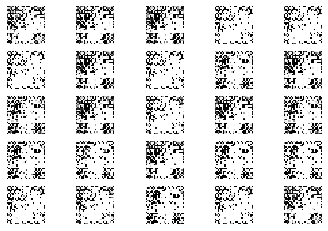

3301 [D loss: 0.002870, acc.: 100.00%] [G loss: 6.465107]
3302 [D loss: 0.003925, acc.: 100.00%] [G loss: 6.361198]
3303 [D loss: 0.253662, acc.: 98.44%] [G loss: 6.462262]
3304 [D loss: 0.223087, acc.: 98.44%] [G loss: 1.893458]
3305 [D loss: 0.237699, acc.: 89.06%] [G loss: 2.620509]
3306 [D loss: 0.026046, acc.: 100.00%] [G loss: 3.790995]
3307 [D loss: 0.037171, acc.: 100.00%] [G loss: 4.299138]
3308 [D loss: 0.012607, acc.: 100.00%] [G loss: 4.430324]
3309 [D loss: 0.013770, acc.: 100.00%] [G loss: 4.584680]
3310 [D loss: 0.007422, acc.: 100.00%] [G loss: 4.607873]
3311 [D loss: 0.005733, acc.: 100.00%] [G loss: 4.666736]
3312 [D loss: 0.005493, acc.: 100.00%] [G loss: 4.572986]
3313 [D loss: 0.006584, acc.: 100.00%] [G loss: 4.613683]
3314 [D loss: 0.008135, acc.: 100.00%] [G loss: 4.463540]
3315 [D loss: 0.007407, acc.: 100.00%] [G loss: 4.453172]
3316 [D loss: 0.007667, acc.: 100.00%] [G loss: 4.445425]
3317 [D loss: 0.006972, acc.: 100.00%] [G loss: 4.496303]
3318 [D loss: 0.0

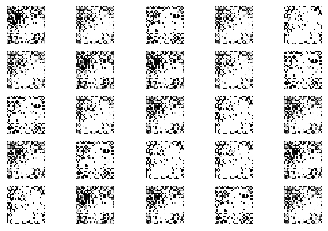

3351 [D loss: 0.004047, acc.: 100.00%] [G loss: 5.163208]
3352 [D loss: 0.003489, acc.: 100.00%] [G loss: 5.116076]
3353 [D loss: 0.004043, acc.: 100.00%] [G loss: 5.230404]
3354 [D loss: 0.004269, acc.: 100.00%] [G loss: 5.305053]
3355 [D loss: 0.003806, acc.: 100.00%] [G loss: 5.422880]
3356 [D loss: 0.004205, acc.: 100.00%] [G loss: 5.214377]
3357 [D loss: 0.003858, acc.: 100.00%] [G loss: 5.083475]
3358 [D loss: 0.003480, acc.: 100.00%] [G loss: 5.215522]
3359 [D loss: 0.003556, acc.: 100.00%] [G loss: 5.152482]
3360 [D loss: 0.004348, acc.: 100.00%] [G loss: 5.216187]
3361 [D loss: 0.003867, acc.: 100.00%] [G loss: 5.279601]
3362 [D loss: 0.003391, acc.: 100.00%] [G loss: 5.375291]
3363 [D loss: 0.003785, acc.: 100.00%] [G loss: 5.228070]
3364 [D loss: 0.002719, acc.: 100.00%] [G loss: 5.546701]
3365 [D loss: 0.003443, acc.: 100.00%] [G loss: 5.207881]
3366 [D loss: 0.003495, acc.: 100.00%] [G loss: 5.330021]
3367 [D loss: 0.002863, acc.: 100.00%] [G loss: 5.365173]
3368 [D loss: 

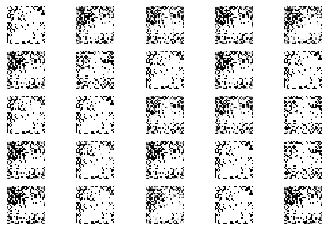

3401 [D loss: 0.002179, acc.: 100.00%] [G loss: 5.754169]
3402 [D loss: 0.002467, acc.: 100.00%] [G loss: 5.912949]
3403 [D loss: 0.001800, acc.: 100.00%] [G loss: 5.930145]
3404 [D loss: 0.001935, acc.: 100.00%] [G loss: 5.836696]
3405 [D loss: 0.002276, acc.: 100.00%] [G loss: 5.719821]
3406 [D loss: 0.002114, acc.: 100.00%] [G loss: 5.832124]
3407 [D loss: 0.001770, acc.: 100.00%] [G loss: 5.746931]
3408 [D loss: 0.001971, acc.: 100.00%] [G loss: 5.691264]
3409 [D loss: 0.002167, acc.: 100.00%] [G loss: 5.865795]
3410 [D loss: 0.002034, acc.: 100.00%] [G loss: 5.882682]
3411 [D loss: 0.002508, acc.: 100.00%] [G loss: 5.581955]
3412 [D loss: 0.002006, acc.: 100.00%] [G loss: 5.910748]
3413 [D loss: 0.002013, acc.: 100.00%] [G loss: 5.904178]
3414 [D loss: 0.002240, acc.: 100.00%] [G loss: 5.756961]
3415 [D loss: 0.002541, acc.: 100.00%] [G loss: 5.735762]
3416 [D loss: 0.002296, acc.: 100.00%] [G loss: 5.946308]
3417 [D loss: 0.002119, acc.: 100.00%] [G loss: 5.808336]
3418 [D loss: 

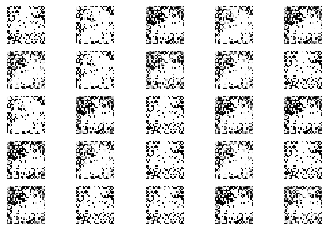

3451 [D loss: 0.001287, acc.: 100.00%] [G loss: 6.553793]
3452 [D loss: 0.001804, acc.: 100.00%] [G loss: 6.138450]
3453 [D loss: 0.001577, acc.: 100.00%] [G loss: 6.093442]
3454 [D loss: 0.001420, acc.: 100.00%] [G loss: 6.253725]
3455 [D loss: 0.001237, acc.: 100.00%] [G loss: 6.173208]
3456 [D loss: 0.001208, acc.: 100.00%] [G loss: 6.242978]
3457 [D loss: 0.001131, acc.: 100.00%] [G loss: 6.154235]
3458 [D loss: 0.001662, acc.: 100.00%] [G loss: 6.180555]
3459 [D loss: 0.001155, acc.: 100.00%] [G loss: 6.221430]
3460 [D loss: 0.001707, acc.: 100.00%] [G loss: 6.229073]
3461 [D loss: 0.001347, acc.: 100.00%] [G loss: 6.378313]
3462 [D loss: 0.001594, acc.: 100.00%] [G loss: 6.267258]
3463 [D loss: 0.001174, acc.: 100.00%] [G loss: 6.343729]
3464 [D loss: 0.001371, acc.: 100.00%] [G loss: 6.340074]
3465 [D loss: 0.001378, acc.: 100.00%] [G loss: 6.302599]
3466 [D loss: 0.001148, acc.: 100.00%] [G loss: 6.182811]
3467 [D loss: 0.001323, acc.: 100.00%] [G loss: 6.272173]
3468 [D loss: 

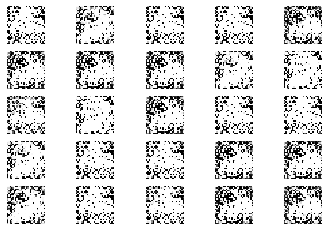

3501 [D loss: 0.252571, acc.: 98.44%] [G loss: 6.522707]
3502 [D loss: 0.000843, acc.: 100.00%] [G loss: 6.577337]
3503 [D loss: 0.000934, acc.: 100.00%] [G loss: 6.416333]
3504 [D loss: 0.001018, acc.: 100.00%] [G loss: 6.633689]
3505 [D loss: 0.001024, acc.: 100.00%] [G loss: 6.628713]
3506 [D loss: 0.000977, acc.: 100.00%] [G loss: 6.608673]
3507 [D loss: 0.001062, acc.: 100.00%] [G loss: 6.535396]
3508 [D loss: 0.000982, acc.: 100.00%] [G loss: 6.490976]
3509 [D loss: 0.000927, acc.: 100.00%] [G loss: 6.424510]
3510 [D loss: 0.000997, acc.: 100.00%] [G loss: 6.405587]
3511 [D loss: 0.000975, acc.: 100.00%] [G loss: 6.605421]
3512 [D loss: 0.001086, acc.: 100.00%] [G loss: 6.753770]
3513 [D loss: 0.001021, acc.: 100.00%] [G loss: 6.735205]
3514 [D loss: 0.000818, acc.: 100.00%] [G loss: 6.573854]
3515 [D loss: 0.000956, acc.: 100.00%] [G loss: 6.519509]
3516 [D loss: 0.000971, acc.: 100.00%] [G loss: 6.711298]
3517 [D loss: 0.000988, acc.: 100.00%] [G loss: 6.725381]
3518 [D loss: 0

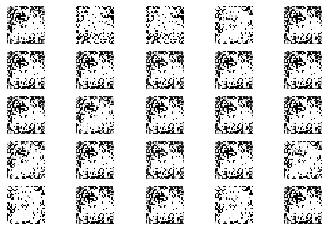

3551 [D loss: 0.000866, acc.: 100.00%] [G loss: 6.713457]
3552 [D loss: 0.000864, acc.: 100.00%] [G loss: 6.709135]
3553 [D loss: 0.000910, acc.: 100.00%] [G loss: 6.669548]
3554 [D loss: 0.000696, acc.: 100.00%] [G loss: 6.759025]
3555 [D loss: 0.000939, acc.: 100.00%] [G loss: 6.938621]
3556 [D loss: 0.509281, acc.: 70.31%] [G loss: 1.146051]
3557 [D loss: 0.591011, acc.: 79.69%] [G loss: 2.354305]
3558 [D loss: 0.138765, acc.: 93.75%] [G loss: 4.339177]
3559 [D loss: 0.016256, acc.: 100.00%] [G loss: 5.123313]
3560 [D loss: 0.008372, acc.: 100.00%] [G loss: 4.463092]
3561 [D loss: 0.017532, acc.: 100.00%] [G loss: 4.315299]
3562 [D loss: 0.018607, acc.: 100.00%] [G loss: 3.887379]
3563 [D loss: 0.022251, acc.: 100.00%] [G loss: 3.747086]
3564 [D loss: 0.019667, acc.: 100.00%] [G loss: 4.149078]
3565 [D loss: 0.015679, acc.: 100.00%] [G loss: 4.111091]
3566 [D loss: 0.016403, acc.: 100.00%] [G loss: 3.879482]
3567 [D loss: 0.016367, acc.: 100.00%] [G loss: 3.982559]
3568 [D loss: 0.0

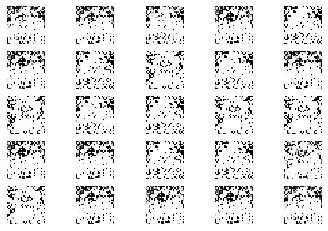

3601 [D loss: 0.006422, acc.: 100.00%] [G loss: 4.705876]
3602 [D loss: 0.004902, acc.: 100.00%] [G loss: 4.856777]
3603 [D loss: 0.006611, acc.: 100.00%] [G loss: 4.617954]
3604 [D loss: 0.006666, acc.: 100.00%] [G loss: 4.824957]
3605 [D loss: 0.006914, acc.: 100.00%] [G loss: 5.121679]
3606 [D loss: 0.005677, acc.: 100.00%] [G loss: 4.842954]
3607 [D loss: 0.005701, acc.: 100.00%] [G loss: 4.737853]
3608 [D loss: 0.004966, acc.: 100.00%] [G loss: 5.093094]
3609 [D loss: 0.005493, acc.: 100.00%] [G loss: 4.969860]
3610 [D loss: 0.003754, acc.: 100.00%] [G loss: 5.314015]
3611 [D loss: 0.004204, acc.: 100.00%] [G loss: 5.157299]
3612 [D loss: 0.004681, acc.: 100.00%] [G loss: 4.921985]
3613 [D loss: 0.004538, acc.: 100.00%] [G loss: 5.194134]
3614 [D loss: 0.003519, acc.: 100.00%] [G loss: 5.330938]
3615 [D loss: 0.003715, acc.: 100.00%] [G loss: 4.953160]
3616 [D loss: 0.003725, acc.: 100.00%] [G loss: 5.298336]
3617 [D loss: 0.003372, acc.: 100.00%] [G loss: 4.872283]
3618 [D loss: 

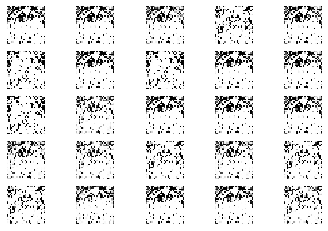

3651 [D loss: 0.002329, acc.: 100.00%] [G loss: 5.388820]
3652 [D loss: 0.002160, acc.: 100.00%] [G loss: 5.595188]
3653 [D loss: 0.003437, acc.: 100.00%] [G loss: 5.455395]
3654 [D loss: 0.002979, acc.: 100.00%] [G loss: 5.549657]
3655 [D loss: 0.002883, acc.: 100.00%] [G loss: 5.444283]
3656 [D loss: 0.002977, acc.: 100.00%] [G loss: 5.650560]
3657 [D loss: 0.002432, acc.: 100.00%] [G loss: 5.620017]
3658 [D loss: 0.002960, acc.: 100.00%] [G loss: 5.827711]
3659 [D loss: 0.003304, acc.: 100.00%] [G loss: 5.879662]
3660 [D loss: 0.002525, acc.: 100.00%] [G loss: 5.927398]
3661 [D loss: 0.002173, acc.: 100.00%] [G loss: 5.926413]
3662 [D loss: 0.001856, acc.: 100.00%] [G loss: 6.095695]
3663 [D loss: 0.001701, acc.: 100.00%] [G loss: 5.963092]
3664 [D loss: 0.001872, acc.: 100.00%] [G loss: 5.758411]
3665 [D loss: 0.002144, acc.: 100.00%] [G loss: 5.695679]
3666 [D loss: 0.002094, acc.: 100.00%] [G loss: 6.014481]
3667 [D loss: 0.001950, acc.: 100.00%] [G loss: 6.126565]
3668 [D loss: 

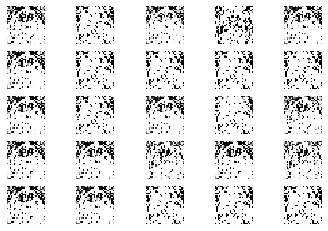

3701 [D loss: 0.001745, acc.: 100.00%] [G loss: 6.405215]
3702 [D loss: 0.002202, acc.: 100.00%] [G loss: 6.431254]
3703 [D loss: 0.001347, acc.: 100.00%] [G loss: 6.478655]
3704 [D loss: 0.001196, acc.: 100.00%] [G loss: 6.426774]
3705 [D loss: 0.001567, acc.: 100.00%] [G loss: 6.809072]
3706 [D loss: 0.001820, acc.: 100.00%] [G loss: 6.528469]
3707 [D loss: 0.002118, acc.: 100.00%] [G loss: 6.556330]
3708 [D loss: 0.000900, acc.: 100.00%] [G loss: 6.737066]
3709 [D loss: 0.001634, acc.: 100.00%] [G loss: 6.844034]
3710 [D loss: 0.001476, acc.: 100.00%] [G loss: 6.737590]
3711 [D loss: 0.001729, acc.: 100.00%] [G loss: 6.550767]
3712 [D loss: 0.001445, acc.: 100.00%] [G loss: 6.616329]
3713 [D loss: 0.001295, acc.: 100.00%] [G loss: 6.639200]
3714 [D loss: 0.000999, acc.: 100.00%] [G loss: 6.797893]
3715 [D loss: 0.252973, acc.: 98.44%] [G loss: 6.777426]
3716 [D loss: 0.001142, acc.: 100.00%] [G loss: 6.900972]
3717 [D loss: 0.584885, acc.: 89.06%] [G loss: 1.856690]
3718 [D loss: 0.

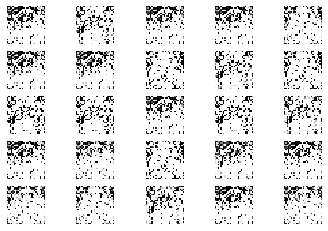

3751 [D loss: 0.004835, acc.: 100.00%] [G loss: 5.302264]
3752 [D loss: 0.004238, acc.: 100.00%] [G loss: 5.156533]
3753 [D loss: 0.003546, acc.: 100.00%] [G loss: 5.176548]
3754 [D loss: 0.004285, acc.: 100.00%] [G loss: 5.098067]
3755 [D loss: 0.003747, acc.: 100.00%] [G loss: 5.142721]
3756 [D loss: 0.005583, acc.: 100.00%] [G loss: 5.327392]
3757 [D loss: 0.003118, acc.: 100.00%] [G loss: 5.585031]
3758 [D loss: 0.003178, acc.: 100.00%] [G loss: 5.237298]
3759 [D loss: 0.002646, acc.: 100.00%] [G loss: 5.448559]
3760 [D loss: 0.003915, acc.: 100.00%] [G loss: 5.355309]
3761 [D loss: 0.003232, acc.: 100.00%] [G loss: 5.321171]
3762 [D loss: 0.003263, acc.: 100.00%] [G loss: 5.488169]
3763 [D loss: 0.003462, acc.: 100.00%] [G loss: 5.286070]
3764 [D loss: 0.005066, acc.: 100.00%] [G loss: 5.441267]
3765 [D loss: 0.003843, acc.: 100.00%] [G loss: 5.181474]
3766 [D loss: 0.003749, acc.: 100.00%] [G loss: 5.362264]
3767 [D loss: 0.004803, acc.: 100.00%] [G loss: 5.321311]
3768 [D loss: 

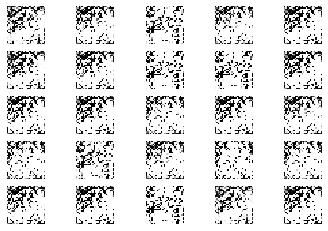

3801 [D loss: 0.002744, acc.: 100.00%] [G loss: 6.042326]
3802 [D loss: 0.002301, acc.: 100.00%] [G loss: 6.230393]
3803 [D loss: 0.001749, acc.: 100.00%] [G loss: 6.226633]
3804 [D loss: 0.002180, acc.: 100.00%] [G loss: 6.060293]
3805 [D loss: 0.001856, acc.: 100.00%] [G loss: 6.041210]
3806 [D loss: 0.002013, acc.: 100.00%] [G loss: 6.358163]
3807 [D loss: 0.002022, acc.: 100.00%] [G loss: 6.250395]
3808 [D loss: 0.002036, acc.: 100.00%] [G loss: 6.073432]
3809 [D loss: 0.002193, acc.: 100.00%] [G loss: 6.286934]
3810 [D loss: 0.001351, acc.: 100.00%] [G loss: 6.427523]
3811 [D loss: 0.001954, acc.: 100.00%] [G loss: 6.365646]
3812 [D loss: 0.001718, acc.: 100.00%] [G loss: 6.333884]
3813 [D loss: 0.001691, acc.: 100.00%] [G loss: 6.389504]
3814 [D loss: 0.001454, acc.: 100.00%] [G loss: 6.432088]
3815 [D loss: 0.001864, acc.: 100.00%] [G loss: 6.222506]
3816 [D loss: 0.001369, acc.: 100.00%] [G loss: 6.322161]
3817 [D loss: 0.001811, acc.: 100.00%] [G loss: 6.044873]
3818 [D loss: 

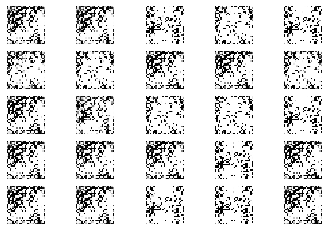

3851 [D loss: 0.001048, acc.: 100.00%] [G loss: 6.506373]
3852 [D loss: 0.001306, acc.: 100.00%] [G loss: 6.688329]
3853 [D loss: 0.001267, acc.: 100.00%] [G loss: 6.513389]
3854 [D loss: 0.001169, acc.: 100.00%] [G loss: 6.616686]
3855 [D loss: 0.001002, acc.: 100.00%] [G loss: 6.787802]
3856 [D loss: 0.001343, acc.: 100.00%] [G loss: 6.467099]
3857 [D loss: 0.000995, acc.: 100.00%] [G loss: 7.211649]
3858 [D loss: 0.001235, acc.: 100.00%] [G loss: 6.777761]
3859 [D loss: 0.001173, acc.: 100.00%] [G loss: 7.117293]
3860 [D loss: 0.001017, acc.: 100.00%] [G loss: 6.984967]
3861 [D loss: 0.001142, acc.: 100.00%] [G loss: 6.618084]
3862 [D loss: 0.001399, acc.: 100.00%] [G loss: 6.727462]
3863 [D loss: 0.001402, acc.: 100.00%] [G loss: 6.777338]
3864 [D loss: 0.001314, acc.: 100.00%] [G loss: 6.636744]
3865 [D loss: 0.001172, acc.: 100.00%] [G loss: 6.704814]
3866 [D loss: 0.001364, acc.: 100.00%] [G loss: 6.838028]
3867 [D loss: 0.001384, acc.: 100.00%] [G loss: 6.732865]
3868 [D loss: 

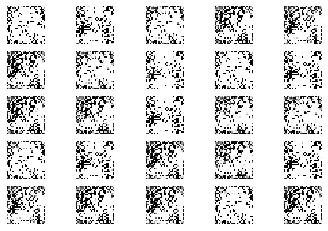

3901 [D loss: 0.001044, acc.: 100.00%] [G loss: 6.870172]
3902 [D loss: 0.001143, acc.: 100.00%] [G loss: 6.623904]
3903 [D loss: 0.001195, acc.: 100.00%] [G loss: 6.777426]
3904 [D loss: 0.000841, acc.: 100.00%] [G loss: 6.958666]
3905 [D loss: 0.000934, acc.: 100.00%] [G loss: 6.790080]
3906 [D loss: 0.000966, acc.: 100.00%] [G loss: 6.674488]
3907 [D loss: 0.001108, acc.: 100.00%] [G loss: 6.817110]
3908 [D loss: 0.000894, acc.: 100.00%] [G loss: 6.736947]
3909 [D loss: 0.000666, acc.: 100.00%] [G loss: 6.642602]
3910 [D loss: 0.000729, acc.: 100.00%] [G loss: 6.691363]
3911 [D loss: 0.000953, acc.: 100.00%] [G loss: 7.109667]
3912 [D loss: 0.001337, acc.: 100.00%] [G loss: 7.122105]
3913 [D loss: 0.001166, acc.: 100.00%] [G loss: 7.061761]
3914 [D loss: 0.252759, acc.: 98.44%] [G loss: 7.033952]
3915 [D loss: 0.252760, acc.: 98.44%] [G loss: 7.491271]
3916 [D loss: 0.000914, acc.: 100.00%] [G loss: 7.018456]
3917 [D loss: 0.000909, acc.: 100.00%] [G loss: 7.430072]
3918 [D loss: 0.

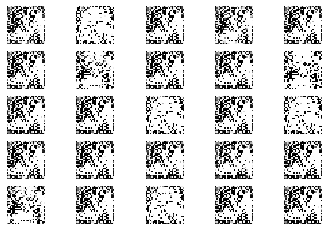

3951 [D loss: 0.252598, acc.: 98.44%] [G loss: 7.227052]
3952 [D loss: 0.000678, acc.: 100.00%] [G loss: 7.043068]
3953 [D loss: 0.000700, acc.: 100.00%] [G loss: 7.494338]
3954 [D loss: 0.000958, acc.: 100.00%] [G loss: 6.926188]
3955 [D loss: 0.000558, acc.: 100.00%] [G loss: 7.116028]
3956 [D loss: 0.000673, acc.: 100.00%] [G loss: 7.031649]
3957 [D loss: 0.000524, acc.: 100.00%] [G loss: 7.426897]
3958 [D loss: 0.252585, acc.: 98.44%] [G loss: 8.153336]
3959 [D loss: 0.000755, acc.: 100.00%] [G loss: 7.363143]
3960 [D loss: 0.000746, acc.: 100.00%] [G loss: 7.689042]
3961 [D loss: 0.000662, acc.: 100.00%] [G loss: 7.431753]
3962 [D loss: 0.000497, acc.: 100.00%] [G loss: 7.870206]
3963 [D loss: 0.000599, acc.: 100.00%] [G loss: 7.309171]
3964 [D loss: 0.000349, acc.: 100.00%] [G loss: 7.304668]
3965 [D loss: 0.000565, acc.: 100.00%] [G loss: 7.271111]
3966 [D loss: 0.000595, acc.: 100.00%] [G loss: 7.722541]
3967 [D loss: 0.000720, acc.: 100.00%] [G loss: 7.386573]
3968 [D loss: 0.

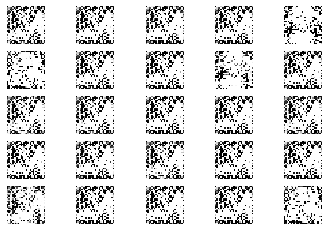

4001 [D loss: 0.011288, acc.: 100.00%] [G loss: 4.393954]
4002 [D loss: 0.013285, acc.: 100.00%] [G loss: 4.132212]
4003 [D loss: 0.015629, acc.: 100.00%] [G loss: 4.251792]
4004 [D loss: 0.015271, acc.: 100.00%] [G loss: 4.353214]
4005 [D loss: 0.014716, acc.: 100.00%] [G loss: 4.115169]
4006 [D loss: 0.014848, acc.: 100.00%] [G loss: 4.218933]
4007 [D loss: 0.014990, acc.: 100.00%] [G loss: 4.386615]
4008 [D loss: 0.011698, acc.: 100.00%] [G loss: 4.495045]
4009 [D loss: 0.014084, acc.: 100.00%] [G loss: 4.219386]
4010 [D loss: 0.012935, acc.: 100.00%] [G loss: 4.211759]
4011 [D loss: 0.017594, acc.: 100.00%] [G loss: 4.391435]
4012 [D loss: 0.009287, acc.: 100.00%] [G loss: 4.522773]
4013 [D loss: 0.012532, acc.: 100.00%] [G loss: 4.508424]
4014 [D loss: 0.009403, acc.: 100.00%] [G loss: 4.697681]
4015 [D loss: 0.011304, acc.: 100.00%] [G loss: 4.655792]
4016 [D loss: 0.009824, acc.: 100.00%] [G loss: 4.535712]
4017 [D loss: 0.009965, acc.: 100.00%] [G loss: 4.451626]
4018 [D loss: 

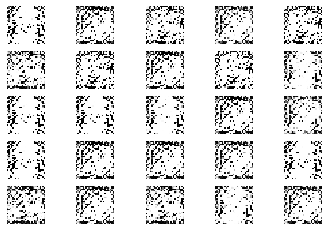

4051 [D loss: 0.003366, acc.: 100.00%] [G loss: 5.410934]
4052 [D loss: 0.003196, acc.: 100.00%] [G loss: 5.084072]
4053 [D loss: 0.004363, acc.: 100.00%] [G loss: 5.368953]
4054 [D loss: 0.003746, acc.: 100.00%] [G loss: 5.326079]
4055 [D loss: 0.004989, acc.: 100.00%] [G loss: 5.323648]
4056 [D loss: 0.004784, acc.: 100.00%] [G loss: 5.554005]
4057 [D loss: 0.002939, acc.: 100.00%] [G loss: 5.347558]
4058 [D loss: 0.002665, acc.: 100.00%] [G loss: 5.566525]
4059 [D loss: 0.002953, acc.: 100.00%] [G loss: 5.324908]
4060 [D loss: 0.003339, acc.: 100.00%] [G loss: 6.041391]
4061 [D loss: 0.003651, acc.: 100.00%] [G loss: 5.299038]
4062 [D loss: 0.004896, acc.: 100.00%] [G loss: 5.143909]
4063 [D loss: 0.004238, acc.: 100.00%] [G loss: 5.528560]
4064 [D loss: 0.003156, acc.: 100.00%] [G loss: 5.270276]
4065 [D loss: 0.003102, acc.: 100.00%] [G loss: 5.381189]
4066 [D loss: 0.003130, acc.: 100.00%] [G loss: 5.638548]
4067 [D loss: 0.002098, acc.: 100.00%] [G loss: 5.428242]
4068 [D loss: 

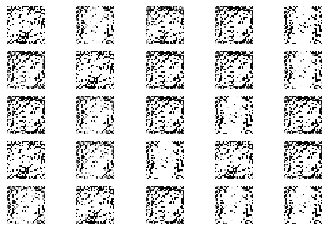

4101 [D loss: 0.001195, acc.: 100.00%] [G loss: 5.822453]
4102 [D loss: 0.254177, acc.: 98.44%] [G loss: 6.206999]
4103 [D loss: 0.253668, acc.: 98.44%] [G loss: 5.956778]
4104 [D loss: 0.002591, acc.: 100.00%] [G loss: 6.079630]
4105 [D loss: 0.001637, acc.: 100.00%] [G loss: 6.280787]
4106 [D loss: 0.001783, acc.: 100.00%] [G loss: 6.203428]
4107 [D loss: 0.001779, acc.: 100.00%] [G loss: 6.124139]
4108 [D loss: 0.001632, acc.: 100.00%] [G loss: 6.249006]
4109 [D loss: 0.001612, acc.: 100.00%] [G loss: 6.215533]
4110 [D loss: 0.001910, acc.: 100.00%] [G loss: 6.625939]
4111 [D loss: 0.001546, acc.: 100.00%] [G loss: 6.377872]
4112 [D loss: 0.253359, acc.: 98.44%] [G loss: 6.493842]
4113 [D loss: 0.001343, acc.: 100.00%] [G loss: 6.286174]
4114 [D loss: 0.001519, acc.: 100.00%] [G loss: 7.854575]
4115 [D loss: 1.643290, acc.: 48.44%] [G loss: 3.614129]
4116 [D loss: 0.320625, acc.: 90.62%] [G loss: 10.119722]
4117 [D loss: 0.121880, acc.: 89.06%] [G loss: 10.490761]
4118 [D loss: 0.00

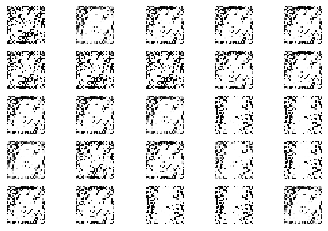

4151 [D loss: 0.007554, acc.: 100.00%] [G loss: 5.614114]
4152 [D loss: 0.006670, acc.: 100.00%] [G loss: 5.228042]
4153 [D loss: 0.007362, acc.: 100.00%] [G loss: 5.267581]
4154 [D loss: 0.004747, acc.: 100.00%] [G loss: 5.760224]
4155 [D loss: 0.004018, acc.: 100.00%] [G loss: 5.367807]
4156 [D loss: 0.006373, acc.: 100.00%] [G loss: 5.269199]
4157 [D loss: 0.004998, acc.: 100.00%] [G loss: 5.658168]
4158 [D loss: 0.004633, acc.: 100.00%] [G loss: 5.511743]
4159 [D loss: 0.004390, acc.: 100.00%] [G loss: 5.402699]
4160 [D loss: 0.003937, acc.: 100.00%] [G loss: 5.110494]
4161 [D loss: 0.004251, acc.: 100.00%] [G loss: 5.149480]
4162 [D loss: 0.005194, acc.: 100.00%] [G loss: 5.260305]
4163 [D loss: 0.005041, acc.: 100.00%] [G loss: 5.366516]
4164 [D loss: 0.005131, acc.: 100.00%] [G loss: 5.159082]
4165 [D loss: 0.005919, acc.: 100.00%] [G loss: 5.095108]
4166 [D loss: 0.004994, acc.: 100.00%] [G loss: 5.629990]
4167 [D loss: 0.004775, acc.: 100.00%] [G loss: 5.421135]
4168 [D loss: 

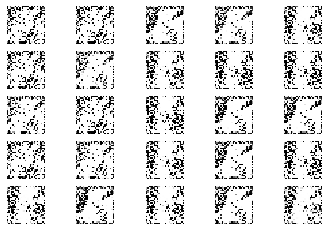

4201 [D loss: 0.003289, acc.: 100.00%] [G loss: 5.912242]
4202 [D loss: 1.387151, acc.: 59.38%] [G loss: 5.341040]
4203 [D loss: 0.001907, acc.: 100.00%] [G loss: 10.496096]
4204 [D loss: 0.002423, acc.: 100.00%] [G loss: 11.079857]
4205 [D loss: 0.001148, acc.: 100.00%] [G loss: 9.763575]
4206 [D loss: 0.001284, acc.: 100.00%] [G loss: 9.931083]
4207 [D loss: 0.002283, acc.: 100.00%] [G loss: 8.839235]
4208 [D loss: 0.004852, acc.: 100.00%] [G loss: 9.018971]
4209 [D loss: 0.005210, acc.: 100.00%] [G loss: 8.108159]
4210 [D loss: 0.005806, acc.: 100.00%] [G loss: 7.264188]
4211 [D loss: 0.004981, acc.: 100.00%] [G loss: 6.963451]
4212 [D loss: 0.008202, acc.: 100.00%] [G loss: 6.702272]
4213 [D loss: 0.008728, acc.: 100.00%] [G loss: 6.306156]
4214 [D loss: 0.004536, acc.: 100.00%] [G loss: 5.907794]
4215 [D loss: 0.004013, acc.: 100.00%] [G loss: 5.240569]
4216 [D loss: 0.007474, acc.: 100.00%] [G loss: 5.085344]
4217 [D loss: 0.004985, acc.: 100.00%] [G loss: 4.983646]
4218 [D loss:

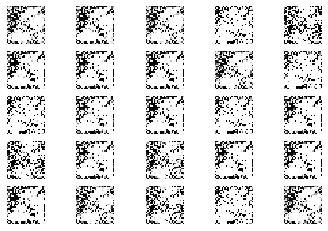

4251 [D loss: 0.002945, acc.: 100.00%] [G loss: 6.002270]
4252 [D loss: 0.002525, acc.: 100.00%] [G loss: 5.937866]
4253 [D loss: 0.002877, acc.: 100.00%] [G loss: 6.136535]
4254 [D loss: 0.002382, acc.: 100.00%] [G loss: 5.663653]
4255 [D loss: 0.002567, acc.: 100.00%] [G loss: 5.838570]
4256 [D loss: 0.003119, acc.: 100.00%] [G loss: 6.016863]
4257 [D loss: 0.003344, acc.: 100.00%] [G loss: 5.768064]
4258 [D loss: 0.002851, acc.: 100.00%] [G loss: 5.833317]
4259 [D loss: 0.002759, acc.: 100.00%] [G loss: 5.742400]
4260 [D loss: 0.004729, acc.: 100.00%] [G loss: 5.807692]
4261 [D loss: 0.002489, acc.: 100.00%] [G loss: 5.923202]
4262 [D loss: 0.002698, acc.: 100.00%] [G loss: 6.100011]
4263 [D loss: 0.003038, acc.: 100.00%] [G loss: 6.279705]
4264 [D loss: 0.254579, acc.: 98.44%] [G loss: 6.146128]
4265 [D loss: 0.002001, acc.: 100.00%] [G loss: 6.132404]
4266 [D loss: 0.003788, acc.: 100.00%] [G loss: 5.975024]
4267 [D loss: 0.004073, acc.: 100.00%] [G loss: 6.126853]
4268 [D loss: 0

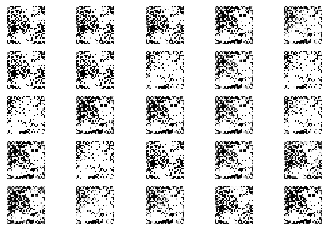

4301 [D loss: 0.001770, acc.: 100.00%] [G loss: 6.815166]
4302 [D loss: 0.002475, acc.: 100.00%] [G loss: 7.472205]
4303 [D loss: 0.252916, acc.: 98.44%] [G loss: 6.626530]
4304 [D loss: 0.018892, acc.: 98.44%] [G loss: 4.840063]
4305 [D loss: 0.017553, acc.: 100.00%] [G loss: 4.764657]
4306 [D loss: 0.015518, acc.: 100.00%] [G loss: 5.334555]
4307 [D loss: 0.007242, acc.: 100.00%] [G loss: 5.040812]
4308 [D loss: 0.005626, acc.: 100.00%] [G loss: 5.244771]
4309 [D loss: 0.003327, acc.: 100.00%] [G loss: 5.328441]
4310 [D loss: 0.003996, acc.: 100.00%] [G loss: 5.482420]
4311 [D loss: 0.003755, acc.: 100.00%] [G loss: 5.580712]
4312 [D loss: 0.003226, acc.: 100.00%] [G loss: 5.397154]
4313 [D loss: 0.003292, acc.: 100.00%] [G loss: 5.765905]
4314 [D loss: 0.002484, acc.: 100.00%] [G loss: 5.526534]
4315 [D loss: 0.003432, acc.: 100.00%] [G loss: 5.405665]
4316 [D loss: 0.003654, acc.: 100.00%] [G loss: 5.623241]
4317 [D loss: 0.002505, acc.: 100.00%] [G loss: 5.309646]
4318 [D loss: 0.

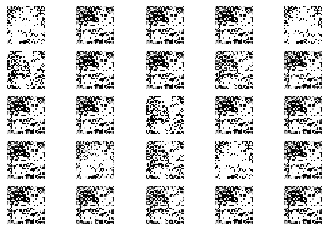

4351 [D loss: 0.002180, acc.: 100.00%] [G loss: 6.057799]
4352 [D loss: 0.002945, acc.: 100.00%] [G loss: 6.065007]
4353 [D loss: 0.002302, acc.: 100.00%] [G loss: 5.837448]
4354 [D loss: 0.002006, acc.: 100.00%] [G loss: 5.814327]
4355 [D loss: 0.002567, acc.: 100.00%] [G loss: 5.867381]
4356 [D loss: 0.002930, acc.: 100.00%] [G loss: 6.276340]
4357 [D loss: 0.002415, acc.: 100.00%] [G loss: 6.028101]
4358 [D loss: 0.002521, acc.: 100.00%] [G loss: 6.157534]
4359 [D loss: 0.002112, acc.: 100.00%] [G loss: 5.998629]
4360 [D loss: 0.001380, acc.: 100.00%] [G loss: 6.185136]
4361 [D loss: 0.002315, acc.: 100.00%] [G loss: 6.123515]
4362 [D loss: 0.001991, acc.: 100.00%] [G loss: 6.221059]
4363 [D loss: 0.001964, acc.: 100.00%] [G loss: 6.120786]
4364 [D loss: 0.001833, acc.: 100.00%] [G loss: 6.333388]
4365 [D loss: 0.001447, acc.: 100.00%] [G loss: 6.209134]
4366 [D loss: 0.001278, acc.: 100.00%] [G loss: 6.420419]
4367 [D loss: 0.001459, acc.: 100.00%] [G loss: 6.212811]
4368 [D loss: 

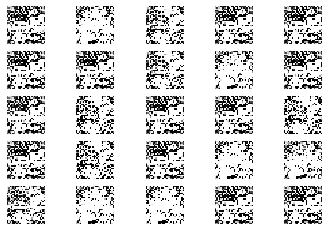

4401 [D loss: 0.007050, acc.: 100.00%] [G loss: 7.979569]
4402 [D loss: 0.003968, acc.: 100.00%] [G loss: 7.539777]
4403 [D loss: 0.005434, acc.: 100.00%] [G loss: 6.324248]
4404 [D loss: 0.006739, acc.: 100.00%] [G loss: 5.244964]
4405 [D loss: 0.010649, acc.: 100.00%] [G loss: 4.600098]
4406 [D loss: 0.030472, acc.: 100.00%] [G loss: 4.580492]
4407 [D loss: 0.020223, acc.: 100.00%] [G loss: 5.192996]
4408 [D loss: 0.011571, acc.: 100.00%] [G loss: 4.201289]
4409 [D loss: 0.013554, acc.: 100.00%] [G loss: 4.217102]
4410 [D loss: 0.017072, acc.: 100.00%] [G loss: 4.109097]
4411 [D loss: 0.014933, acc.: 100.00%] [G loss: 4.595928]
4412 [D loss: 0.009911, acc.: 100.00%] [G loss: 4.320323]
4413 [D loss: 0.012856, acc.: 100.00%] [G loss: 4.137021]
4414 [D loss: 0.022301, acc.: 100.00%] [G loss: 4.570581]
4415 [D loss: 0.011344, acc.: 100.00%] [G loss: 4.234822]
4416 [D loss: 0.010121, acc.: 100.00%] [G loss: 4.885673]
4417 [D loss: 0.008816, acc.: 100.00%] [G loss: 4.099909]
4418 [D loss: 

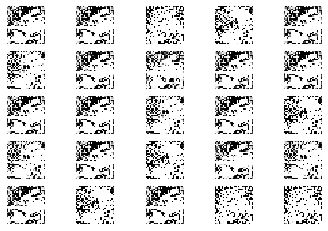

4451 [D loss: 0.005330, acc.: 100.00%] [G loss: 5.073416]
4452 [D loss: 0.005163, acc.: 100.00%] [G loss: 5.048450]
4453 [D loss: 0.005652, acc.: 100.00%] [G loss: 5.009295]
4454 [D loss: 0.004492, acc.: 100.00%] [G loss: 5.285018]
4455 [D loss: 0.005429, acc.: 100.00%] [G loss: 5.096165]
4456 [D loss: 0.004189, acc.: 100.00%] [G loss: 4.995397]
4457 [D loss: 0.004429, acc.: 100.00%] [G loss: 5.496767]
4458 [D loss: 0.004863, acc.: 100.00%] [G loss: 5.390161]
4459 [D loss: 0.004119, acc.: 100.00%] [G loss: 5.119047]
4460 [D loss: 0.004638, acc.: 100.00%] [G loss: 5.306208]
4461 [D loss: 0.004760, acc.: 100.00%] [G loss: 5.435107]
4462 [D loss: 0.003165, acc.: 100.00%] [G loss: 5.310747]
4463 [D loss: 0.006768, acc.: 100.00%] [G loss: 5.694528]
4464 [D loss: 0.004226, acc.: 100.00%] [G loss: 5.678583]
4465 [D loss: 0.003365, acc.: 100.00%] [G loss: 5.740003]
4466 [D loss: 0.003500, acc.: 100.00%] [G loss: 5.673227]
4467 [D loss: 0.003824, acc.: 100.00%] [G loss: 6.068266]
4468 [D loss: 

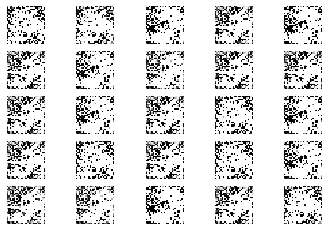

4501 [D loss: 0.002351, acc.: 100.00%] [G loss: 5.615640]
4502 [D loss: 0.003276, acc.: 100.00%] [G loss: 5.745425]
4503 [D loss: 0.003102, acc.: 100.00%] [G loss: 6.155846]
4504 [D loss: 0.003639, acc.: 100.00%] [G loss: 6.086045]
4505 [D loss: 0.002638, acc.: 100.00%] [G loss: 5.999349]
4506 [D loss: 0.002298, acc.: 100.00%] [G loss: 6.294771]
4507 [D loss: 0.002679, acc.: 100.00%] [G loss: 6.329150]
4508 [D loss: 0.003053, acc.: 100.00%] [G loss: 6.060746]
4509 [D loss: 0.002773, acc.: 100.00%] [G loss: 6.191125]
4510 [D loss: 0.002394, acc.: 100.00%] [G loss: 6.264740]
4511 [D loss: 0.003222, acc.: 100.00%] [G loss: 6.622102]
4512 [D loss: 0.002784, acc.: 100.00%] [G loss: 6.121101]
4513 [D loss: 0.001974, acc.: 100.00%] [G loss: 6.464183]
4514 [D loss: 0.002497, acc.: 100.00%] [G loss: 6.513177]
4515 [D loss: 0.253760, acc.: 98.44%] [G loss: 6.517769]
4516 [D loss: 0.002281, acc.: 100.00%] [G loss: 6.526330]
4517 [D loss: 0.001755, acc.: 100.00%] [G loss: 6.575964]
4518 [D loss: 0

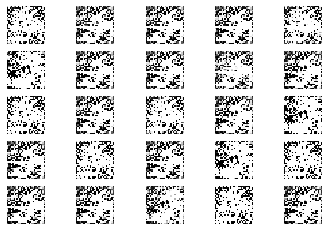

4551 [D loss: 0.000809, acc.: 100.00%] [G loss: 7.566994]
4552 [D loss: 0.001066, acc.: 100.00%] [G loss: 7.027253]
4553 [D loss: 0.000965, acc.: 100.00%] [G loss: 7.136355]
4554 [D loss: 0.001103, acc.: 100.00%] [G loss: 7.074277]
4555 [D loss: 0.001051, acc.: 100.00%] [G loss: 7.409866]
4556 [D loss: 0.000754, acc.: 100.00%] [G loss: 7.717363]
4557 [D loss: 0.001022, acc.: 100.00%] [G loss: 7.102886]
4558 [D loss: 0.000580, acc.: 100.00%] [G loss: 8.095423]
4559 [D loss: 0.252534, acc.: 98.44%] [G loss: 7.706544]
4560 [D loss: 0.000761, acc.: 100.00%] [G loss: 7.260303]
4561 [D loss: 0.000676, acc.: 100.00%] [G loss: 7.228848]
4562 [D loss: 0.000844, acc.: 100.00%] [G loss: 7.802738]
4563 [D loss: 0.000638, acc.: 100.00%] [G loss: 7.295068]
4564 [D loss: 0.000765, acc.: 100.00%] [G loss: 7.381543]
4565 [D loss: 0.001150, acc.: 100.00%] [G loss: 7.155285]
4566 [D loss: 0.000802, acc.: 100.00%] [G loss: 7.212264]
4567 [D loss: 0.000935, acc.: 100.00%] [G loss: 7.016531]
4568 [D loss: 0

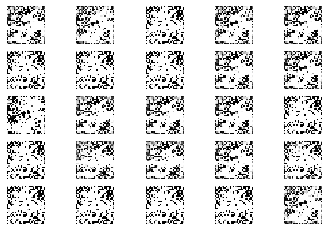

4601 [D loss: 0.004368, acc.: 100.00%] [G loss: 5.535852]
4602 [D loss: 0.006880, acc.: 100.00%] [G loss: 5.818038]
4603 [D loss: 0.004316, acc.: 100.00%] [G loss: 6.207322]
4604 [D loss: 0.003358, acc.: 100.00%] [G loss: 6.267503]
4605 [D loss: 0.002917, acc.: 100.00%] [G loss: 6.354902]
4606 [D loss: 0.003186, acc.: 100.00%] [G loss: 6.015975]
4607 [D loss: 0.002444, acc.: 100.00%] [G loss: 6.126653]
4608 [D loss: 0.002765, acc.: 100.00%] [G loss: 6.286433]
4609 [D loss: 0.003505, acc.: 100.00%] [G loss: 5.892159]
4610 [D loss: 0.003327, acc.: 100.00%] [G loss: 6.403187]
4611 [D loss: 0.003079, acc.: 100.00%] [G loss: 6.001426]
4612 [D loss: 0.003110, acc.: 100.00%] [G loss: 6.534252]
4613 [D loss: 0.002376, acc.: 100.00%] [G loss: 6.767108]
4614 [D loss: 0.002715, acc.: 100.00%] [G loss: 6.142167]
4615 [D loss: 0.003356, acc.: 100.00%] [G loss: 6.253760]
4616 [D loss: 0.002906, acc.: 100.00%] [G loss: 6.147253]
4617 [D loss: 0.002271, acc.: 100.00%] [G loss: 6.099027]
4618 [D loss: 

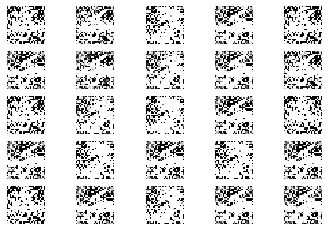

4651 [D loss: 0.001008, acc.: 100.00%] [G loss: 7.009375]
4652 [D loss: 0.001254, acc.: 100.00%] [G loss: 6.951006]
4653 [D loss: 0.001560, acc.: 100.00%] [G loss: 7.114237]
4654 [D loss: 0.001478, acc.: 100.00%] [G loss: 6.654709]
4655 [D loss: 0.001475, acc.: 100.00%] [G loss: 6.946490]
4656 [D loss: 0.001350, acc.: 100.00%] [G loss: 6.739032]
4657 [D loss: 0.001011, acc.: 100.00%] [G loss: 7.050856]
4658 [D loss: 0.001842, acc.: 100.00%] [G loss: 6.803298]
4659 [D loss: 0.253478, acc.: 98.44%] [G loss: 6.995918]
4660 [D loss: 0.001432, acc.: 100.00%] [G loss: 7.127844]
4661 [D loss: 0.000996, acc.: 100.00%] [G loss: 6.497891]
4662 [D loss: 0.001219, acc.: 100.00%] [G loss: 6.942971]
4663 [D loss: 0.000932, acc.: 100.00%] [G loss: 6.942424]
4664 [D loss: 0.001506, acc.: 100.00%] [G loss: 6.918319]
4665 [D loss: 0.001809, acc.: 100.00%] [G loss: 6.808033]
4666 [D loss: 0.001369, acc.: 100.00%] [G loss: 6.965190]
4667 [D loss: 0.001506, acc.: 100.00%] [G loss: 6.894269]
4668 [D loss: 0

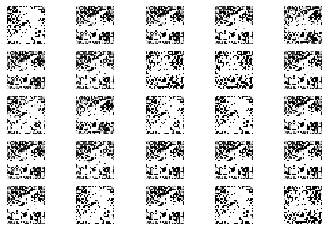

4701 [D loss: 0.001051, acc.: 100.00%] [G loss: 7.102880]
4702 [D loss: 0.001022, acc.: 100.00%] [G loss: 7.540778]
4703 [D loss: 0.252571, acc.: 98.44%] [G loss: 7.420275]
4704 [D loss: 0.001072, acc.: 100.00%] [G loss: 6.926036]
4705 [D loss: 0.000984, acc.: 100.00%] [G loss: 7.355722]
4706 [D loss: 0.001043, acc.: 100.00%] [G loss: 6.950912]
4707 [D loss: 0.001052, acc.: 100.00%] [G loss: 7.054806]
4708 [D loss: 0.001102, acc.: 100.00%] [G loss: 7.003083]
4709 [D loss: 0.001102, acc.: 100.00%] [G loss: 7.119640]
4710 [D loss: 0.001170, acc.: 100.00%] [G loss: 7.298365]
4711 [D loss: 0.000920, acc.: 100.00%] [G loss: 7.362349]
4712 [D loss: 0.000978, acc.: 100.00%] [G loss: 7.098221]
4713 [D loss: 0.000771, acc.: 100.00%] [G loss: 7.293082]
4714 [D loss: 0.000949, acc.: 100.00%] [G loss: 7.432667]
4715 [D loss: 0.001170, acc.: 100.00%] [G loss: 7.094890]
4716 [D loss: 0.001061, acc.: 100.00%] [G loss: 7.435110]
4717 [D loss: 0.000777, acc.: 100.00%] [G loss: 7.463252]
4718 [D loss: 0

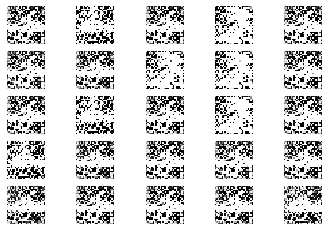

4751 [D loss: 0.000507, acc.: 100.00%] [G loss: 7.545974]
4752 [D loss: 0.000702, acc.: 100.00%] [G loss: 7.626722]
4753 [D loss: 0.000589, acc.: 100.00%] [G loss: 7.367743]
4754 [D loss: 0.000526, acc.: 100.00%] [G loss: 7.554567]
4755 [D loss: 0.000473, acc.: 100.00%] [G loss: 7.347020]
4756 [D loss: 0.000751, acc.: 100.00%] [G loss: 7.921427]
4757 [D loss: 0.252330, acc.: 98.44%] [G loss: 7.495960]
4758 [D loss: 0.000501, acc.: 100.00%] [G loss: 7.711473]
4759 [D loss: 0.000403, acc.: 100.00%] [G loss: 7.729889]
4760 [D loss: 0.000395, acc.: 100.00%] [G loss: 7.670927]
4761 [D loss: 0.000529, acc.: 100.00%] [G loss: 7.691964]
4762 [D loss: 0.000610, acc.: 100.00%] [G loss: 7.635520]
4763 [D loss: 0.000449, acc.: 100.00%] [G loss: 7.632765]
4764 [D loss: 0.000635, acc.: 100.00%] [G loss: 7.445166]
4765 [D loss: 0.000601, acc.: 100.00%] [G loss: 7.724181]
4766 [D loss: 0.000603, acc.: 100.00%] [G loss: 7.265601]
4767 [D loss: 0.000462, acc.: 100.00%] [G loss: 7.291797]
4768 [D loss: 0

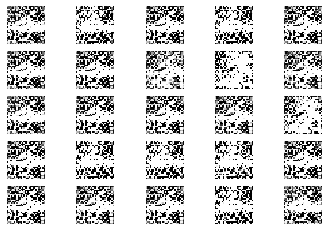

4801 [D loss: 0.000337, acc.: 100.00%] [G loss: 8.040015]
4802 [D loss: 0.000279, acc.: 100.00%] [G loss: 7.966377]
4803 [D loss: 0.252191, acc.: 98.44%] [G loss: 7.746240]
4804 [D loss: 0.000409, acc.: 100.00%] [G loss: 7.587314]
4805 [D loss: 0.000282, acc.: 100.00%] [G loss: 7.796041]
4806 [D loss: 0.000407, acc.: 100.00%] [G loss: 7.982129]
4807 [D loss: 0.000410, acc.: 100.00%] [G loss: 7.711646]
4808 [D loss: 0.000292, acc.: 100.00%] [G loss: 7.947476]
4809 [D loss: 0.000276, acc.: 100.00%] [G loss: 7.907537]
4810 [D loss: 0.000379, acc.: 100.00%] [G loss: 7.845783]
4811 [D loss: 0.000393, acc.: 100.00%] [G loss: 7.909989]
4812 [D loss: 0.000396, acc.: 100.00%] [G loss: 8.123043]
4813 [D loss: 0.000299, acc.: 100.00%] [G loss: 7.686271]
4814 [D loss: 0.000283, acc.: 100.00%] [G loss: 8.310935]
4815 [D loss: 0.000322, acc.: 100.00%] [G loss: 7.887426]
4816 [D loss: 0.000298, acc.: 100.00%] [G loss: 8.022834]
4817 [D loss: 0.000351, acc.: 100.00%] [G loss: 7.720780]
4818 [D loss: 0

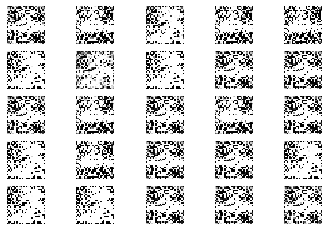

4851 [D loss: 0.002468, acc.: 100.00%] [G loss: 8.234166]
4852 [D loss: 0.009309, acc.: 100.00%] [G loss: 6.817877]
4853 [D loss: 0.010391, acc.: 100.00%] [G loss: 6.090299]
4854 [D loss: 0.008166, acc.: 100.00%] [G loss: 6.205183]
4855 [D loss: 0.008586, acc.: 100.00%] [G loss: 6.015536]
4856 [D loss: 0.008850, acc.: 100.00%] [G loss: 5.826784]
4857 [D loss: 0.006772, acc.: 100.00%] [G loss: 5.690260]
4858 [D loss: 0.007169, acc.: 100.00%] [G loss: 5.311709]
4859 [D loss: 0.011134, acc.: 100.00%] [G loss: 5.040011]
4860 [D loss: 0.011029, acc.: 100.00%] [G loss: 5.349874]
4861 [D loss: 0.009145, acc.: 100.00%] [G loss: 5.089327]
4862 [D loss: 0.011123, acc.: 100.00%] [G loss: 4.845941]
4863 [D loss: 0.011832, acc.: 100.00%] [G loss: 4.899129]
4864 [D loss: 0.009388, acc.: 100.00%] [G loss: 4.531157]
4865 [D loss: 0.028548, acc.: 100.00%] [G loss: 5.498295]
4866 [D loss: 0.009667, acc.: 100.00%] [G loss: 5.223310]
4867 [D loss: 0.010071, acc.: 100.00%] [G loss: 5.406600]
4868 [D loss: 

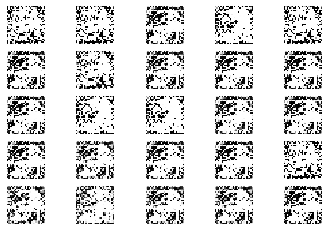

4901 [D loss: 0.006894, acc.: 100.00%] [G loss: 5.393447]
4902 [D loss: 0.006201, acc.: 100.00%] [G loss: 5.398136]
4903 [D loss: 0.005898, acc.: 100.00%] [G loss: 5.142397]
4904 [D loss: 0.013186, acc.: 100.00%] [G loss: 5.522436]
4905 [D loss: 0.003620, acc.: 100.00%] [G loss: 5.769755]
4906 [D loss: 0.004431, acc.: 100.00%] [G loss: 5.638882]
4907 [D loss: 0.257187, acc.: 98.44%] [G loss: 5.688319]
4908 [D loss: 0.257526, acc.: 98.44%] [G loss: 4.785024]
4909 [D loss: 0.007352, acc.: 100.00%] [G loss: 5.199016]
4910 [D loss: 0.006339, acc.: 100.00%] [G loss: 5.791788]
4911 [D loss: 0.005583, acc.: 100.00%] [G loss: 5.523629]
4912 [D loss: 0.006083, acc.: 100.00%] [G loss: 5.351337]
4913 [D loss: 0.005841, acc.: 100.00%] [G loss: 5.500994]
4914 [D loss: 0.003418, acc.: 100.00%] [G loss: 5.393075]
4915 [D loss: 0.003796, acc.: 100.00%] [G loss: 5.908028]
4916 [D loss: 0.004120, acc.: 100.00%] [G loss: 5.145747]
4917 [D loss: 0.003705, acc.: 100.00%] [G loss: 5.364605]
4918 [D loss: 0.

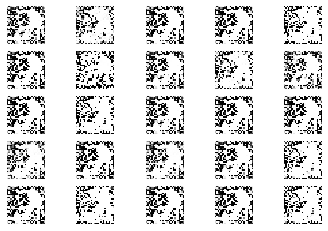

4951 [D loss: 0.003588, acc.: 100.00%] [G loss: 6.188198]
4952 [D loss: 0.004616, acc.: 100.00%] [G loss: 6.526061]
4953 [D loss: 0.004783, acc.: 100.00%] [G loss: 6.409529]
4954 [D loss: 0.002704, acc.: 100.00%] [G loss: 6.503402]
4955 [D loss: 0.002460, acc.: 100.00%] [G loss: 6.391007]
4956 [D loss: 0.002524, acc.: 100.00%] [G loss: 6.284180]
4957 [D loss: 0.003013, acc.: 100.00%] [G loss: 6.229452]
4958 [D loss: 0.002928, acc.: 100.00%] [G loss: 6.235481]
4959 [D loss: 0.003155, acc.: 100.00%] [G loss: 6.299952]
4960 [D loss: 0.002923, acc.: 100.00%] [G loss: 6.099033]
4961 [D loss: 0.002899, acc.: 100.00%] [G loss: 6.493143]
4962 [D loss: 0.002452, acc.: 100.00%] [G loss: 6.107049]
4963 [D loss: 0.002712, acc.: 100.00%] [G loss: 5.717525]
4964 [D loss: 0.005653, acc.: 100.00%] [G loss: 5.644211]
4965 [D loss: 0.003785, acc.: 100.00%] [G loss: 5.976532]
4966 [D loss: 0.004555, acc.: 100.00%] [G loss: 5.754787]
4967 [D loss: 0.005930, acc.: 100.00%] [G loss: 5.625887]
4968 [D loss: 

In [11]:
epochs = 5000

batch_size = 32
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
  #discriminator
  idx = np.random.randint(0, x_train.shape[0], batch_size)
  imgs = x_train[idx]

  noise = np.random.normal(0, 1, (batch_size, 100))

  gen_imgs = generator.predict(noise)

  d_loss_real = discriminator.train_on_batch(imgs, valid)
  d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
  d_loss = 0.5*np.add(d_loss_real, d_loss_fake)

  #generator
  noise = np.random.normal(0, 1, (batch_size, 100))

  g_loss = combined.train_on_batch(noise, valid)

  print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

  if epoch % 50 == 0:
    sample_images(epoch)

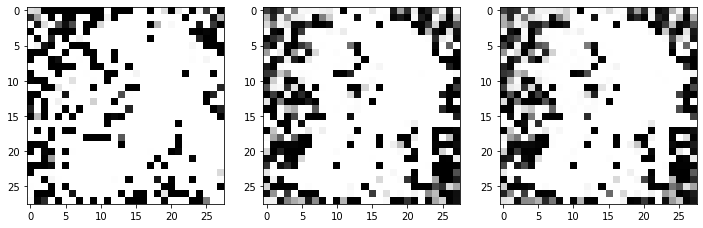

In [12]:
r, c = 5, 5
noise = np.random.normal(0, 1, (r*c, 100))
gen_imgs = generator.predict(noise)

gen_imgs = 0.5*gen_imgs+0.5

plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(gen_imgs[0, :, :, 0], cmap='gray')
plt.subplot(132)
plt.imshow(gen_imgs[1, :, :, 0], cmap='gray')
plt.subplot(133)
plt.imshow(gen_imgs[2, :, :, 0], cmap='gray')
plt.show()
plt.close()